## Compare Resistant vs Susceptible PSTR Corals 

In [95]:
#install.packages("remotes")
#remotes::install_github("vegandevs/vegan")

In [96]:
#install.packages('ecodist')

In [97]:
#install.packages('tidyverse')

In [98]:
#install.packages('ggvegan')

In [99]:
#install.packages('phyloseq')

In [100]:
#install.packages("cowplot")

In [101]:
#if (!require("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")

#BiocManager::install("phyloseq")

In [102]:
# DESEQ
#if (!require("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")

#BiocManager::install("DESeq2")

In [103]:
#install.packages("pheatmap")

In [104]:
library(tidyverse)
library(vegan)
library(phyloseq)
#library(VennDiagram)
library("DESeq2")
library(RColorBrewer)
library(ggplot2)
library(cowplot)

In [105]:
library("pheatmap")

In [106]:
# Load otu and taxa table separately 

In [107]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/pstr/taxonomy/kraken_stddb')

In [108]:
taxa = read.csv('otu_id_species',header=TRUE)
head(taxa)
dim(taxa)
# taxa is the same for diseased mcavs 

taxonomy_id name                  taxonomy_lvl
1 2775403     Rhizobium sp. TH2     S           
2 2952477     Rhizobium sp. SSA_523 S           
3 2978974     Rhizobium sp. CSC1952 S           
4 3039156     Rhizobium sp. CB3090  S           
5 2806346     Rhizobium sp. SL42    S           
6 2603277     Rhizobium sp. WL3     S

[1] 25487     3

In [109]:
# remove taxa level col
taxa$taxonomy_lvl <- NULL 
# change taxa table names
colnames(taxa) <- c("otuid","species")

In [110]:
# remove duplicated entries
taxa_filter=taxa[!duplicated(taxa$species), ]

In [111]:
dim(taxa_filter)

[1] 25487     2

In [112]:
head(taxa_filter)

otuid   species              
1 2775403 Rhizobium sp. TH2    
2 2952477 Rhizobium sp. SSA_523
3 2978974 Rhizobium sp. CSC1952
4 3039156 Rhizobium sp. CB3090 
5 2806346 Rhizobium sp. SL42   
6 2603277 Rhizobium sp. WL3

In [113]:
# get homo sapien otu id
homo_sapiens_otu_id <- taxa_filter[taxa_filter$species == "Homo sapiens", "otuid"]
print(homo_sapiens_otu_id)

[1] 9606


In [114]:
head(taxa_filter)

otuid   species              
1 2775403 Rhizobium sp. TH2    
2 2952477 Rhizobium sp. SSA_523
3 2978974 Rhizobium sp. CSC1952
4 3039156 Rhizobium sp. CB3090 
5 2806346 Rhizobium sp. SL42   
6 2603277 Rhizobium sp. WL3

In [115]:
# make the index the otu ids
row.names(taxa_filter) <- taxa_filter$otuid
taxa_filter$otuid <- NULL
head(taxa_filter)

species              
2775403 Rhizobium sp. TH2    
2952477 Rhizobium sp. SSA_523
2978974 Rhizobium sp. CSC1952
3039156 Rhizobium sp. CB3090 
2806346 Rhizobium sp. SL42   
2603277 Rhizobium sp. WL3

In [116]:
#remove human 
taxa_filter[!(row.names(taxa_filter) %in% c(9606)),]

[1] "Rhizobium sp. TH2"                                                                       
    [2] "Rhizobium sp. SSA_523"                                                                   
    [3] "Rhizobium sp. CSC1952"                                                                   
    [4] "Rhizobium sp. CB3090"                                                                    
    [5] "Rhizobium sp. SL42"                                                                      
    [6] "Rhizobium sp. WL3"                                                                       
    [7] "Rhizobium sp. WYJ-E13"                                                                   
    [8] "Rhizobium sp. BG4"                                                                       
    [9] "Rhizobium sp. CC-CFT758"                                                                 
   [10] "Rhizobium sp. 32-5/1"                                                                    
   [11] "Rhizobium sp. 11515TR"                                                                   
   [12] "Rhizobium sp. AB2/73"                                                                    
   [13] "Rhizobium sp. NZLR1"                                                                     
   [14] "Rhizobium sp. Pop5"                                                                      
   [15] "Rhizobium sp. SSM4.3"                                                                    
   [16] "Rhizobium sp. NXC14"                                                                     
   [17] "Rhizobium sp. C104"                                                                      
   [18] "Rhizobium sp. NLR16a"                                                                    
   [19] "Rhizobium sp. CIAT894"                                                                   
   [20] "Rhizobium sp. BT03"                                                                      
   [21] "Rhizobium sp. CB3171"                                                                    
   [22] "Rhizobium sp. NXC24"                                                                     
   [23] "Rhizobium sp. X9"                                                                        
   [24] "Rhizobium sp. ZX09"                                                                      
   [25] "Rhizobium sp. CC1099"                                                                    
   [26] "Rhizobium sp. BT-226"                                                                    
   [27] "Rhizobium sp. K102"                                                                      
   [28] "Rhizobium sp. BT-175"                                                                    
   [29] "Rhizobium sp. CCGE531"                                                                   
   [30] "Rhizobium sp. TAL182"                                                                    
   [31] "Rhizobium sp. Kim5"                                                                      
   [32] "Rhizobium sp. L51/94"                                                                    
   [33] "Rhizobium sp. BT04"                                                                      
   [34] "Rhizobium sp. CCGE532"                                                                   
   [35] "Rhizobium sp. B21/90"                                                                    
   [36] "Rhizobium sp. 007"                                                                       
   [37] "Rhizobium sp. N741"                                                                      
   [38] "Rhizobium sp. T136"                                                                      
   [39] "Rhizobium sp. T1473"                                                                     
   [40] "Rhizobium sp. N113"                                                                      
   [41] "Rhizobium sp. N1314"               

In [117]:
str(taxa_filter)

'data.frame':	25487 obs. of  1 variable:
 $ species: chr  "Rhizobium sp. TH2" "Rhizobium sp. SSA_523" "Rhizobium sp. CSC1952" "Rhizobium sp. CB3090" ...


In [118]:
# convert to character matrix to create phyloseq objects 
#taxa_filter$otuid <- as.character(taxa_filter$otuid)
taxonomy <- as.matrix(taxa_filter)

# check structure
str(taxonomy)

 chr [1:25487, 1] "Rhizobium sp. TH2" "Rhizobium sp. SSA_523" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25487] "2775403" "2952477" "2978974" "3039156" ...
  ..$ : chr "species"


In [119]:
# read in normalized species table
otu = read.csv('otu_normtable_species',header=TRUE)
head(otu)

X       X052022_BEL_CBC_T2_45_PSTR X102019_BEL_CBC_T1_28_PSTR
1 2775403 1.966261                   0.4420247                 
2 2952477 1.828278                   0.1473416                 
3 2978974 1.897269                   0.1964554                 
4 3039156 1.690294                   0.1473416                 
5 2806346 1.655799                   0.0000000                 
6 2603277 1.586807                   0.0000000                 
  X102019_BEL_CBC_T1_29_PSTR X052022_BEL_CBC_T2_46_PSTR
1 1.2417867                  0.2462085                 
2 1.3797630                  0.7386254                 
3 1.5177393                  0.4924169                 
4 0.6208934                  0.2462085                 
5 1.1038104                  0.2462085                 
6 0.9658341                  0.0000000                 
  X052022_BEL_CBC_T1_4_PSTR X102019_BEL_CBC_T1_25_PSTR
1 0.89681578                0.32441492                
2 1.19575438                0.55613986                
3 0.05978772                0.92689977                
4 0.17936316                0.13903497                
5 0.11957544                0.13903497                
6 0.17936316                0.04634499                
  X052022_BEL_CBC_T3_15_PSTR X052022_BEL_CBC_T3_3_PSTR
1 0.34168088                 0.2587361                
2 0.34168088                 0.5174723                
3 0.07592908                 0.1811153                
4 0.11389363                 0.1034945                
5 0.00000000                 0.1034945                
6 0.26575179                 0.1034945                
  X102019_BEL_CBC_T1_27_PSTR ⋯ X102019_BEL_CBC_T3_36_PSTR
1 4.236531                   ⋯ 0.13200496                
2 2.436005                   ⋯ 0.16500620                
3 3.495138                   ⋯ 0.39601488                
4 1.429829                   ⋯ 0.13200496                
5 1.641656                   ⋯ 0.03300124                
6 1.906439                   ⋯ 0.19800744                
  X102019_BEL_CBC_T3_40_PSTR X102019_BEL_CBC_T3_35_PSTR
1 0.416427                   0.48069139                
2 0.643569                   0.61178904                
3 0.454284                   0.43699217                
4 0.075714                   0.13109765                
5 0.113571                   0.04369922                
6 0.151428                   0.17479687                
  X102019_BEL_CBC_T2_34_PSTR X102019_BEL_CBC_T3_34_PSTR
1 0.12627565                 0.03733778                
2 1.17857276                 0.41071555                
3 0.25255130                 0.22402667                
4 0.16836754                 0.18668889                
5 0.04209188                 0.03733778                
6 0.04209188                 0.03733778                
  X052022_BEL_CBC_T3_23_PSTR X102019_BEL_CBC_T3_38_PSTR
1 0.12137608                 0.0312127                 
2 0.36412824                 0.0312127                 
3 0.20229347                 0.0000000                 
4 0.12137608                 0.3433397                 
5 0.08091739                 0.0000000                 
6 0.04045869                 0.0312127                 
  X052022_BEL_CBC_T2_8_PSTR X102019_BEL_CBC_T3_39_PSTR
1 0.3795072                 0.93120671                
2 0.3478816                 0.73166241                
3 0.2846304                 0.86469194                
4 0.1265024                 0.19954429                
5 0.0316256                 0.33257382                
6 0.0000000                 0.06651476                
  X052022_BEL_CBC_T1_55_PSTR
1 0.10987694                
2 0.43950775                
3 0.30216158                
4 0.02746923                
5 0.02746923                
6 0.00000000

In [120]:
# rename first col as otu
names(otu)[1] <- "otu"
head(otu)
dim(otu)

otu     X052022_BEL_CBC_T2_45_PSTR X102019_BEL_CBC_T1_28_PSTR
1 2775403 1.966261                   0.4420247                 
2 2952477 1.828278                   0.1473416                 
3 2978974 1.897269                   0.1964554                 
4 3039156 1.690294                   0.1473416                 
5 2806346 1.655799                   0.0000000                 
6 2603277 1.586807                   0.0000000                 
  X102019_BEL_CBC_T1_29_PSTR X052022_BEL_CBC_T2_46_PSTR
1 1.2417867                  0.2462085                 
2 1.3797630                  0.7386254                 
3 1.5177393                  0.4924169                 
4 0.6208934                  0.2462085                 
5 1.1038104                  0.2462085                 
6 0.9658341                  0.0000000                 
  X052022_BEL_CBC_T1_4_PSTR X102019_BEL_CBC_T1_25_PSTR
1 0.89681578                0.32441492                
2 1.19575438                0.55613986                
3 0.05978772                0.92689977                
4 0.17936316                0.13903497                
5 0.11957544                0.13903497                
6 0.17936316                0.04634499                
  X052022_BEL_CBC_T3_15_PSTR X052022_BEL_CBC_T3_3_PSTR
1 0.34168088                 0.2587361                
2 0.34168088                 0.5174723                
3 0.07592908                 0.1811153                
4 0.11389363                 0.1034945                
5 0.00000000                 0.1034945                
6 0.26575179                 0.1034945                
  X102019_BEL_CBC_T1_27_PSTR ⋯ X102019_BEL_CBC_T3_36_PSTR
1 4.236531                   ⋯ 0.13200496                
2 2.436005                   ⋯ 0.16500620                
3 3.495138                   ⋯ 0.39601488                
4 1.429829                   ⋯ 0.13200496                
5 1.641656                   ⋯ 0.03300124                
6 1.906439                   ⋯ 0.19800744                
  X102019_BEL_CBC_T3_40_PSTR X102019_BEL_CBC_T3_35_PSTR
1 0.416427                   0.48069139                
2 0.643569                   0.61178904                
3 0.454284                   0.43699217                
4 0.075714                   0.13109765                
5 0.113571                   0.04369922                
6 0.151428                   0.17479687                
  X102019_BEL_CBC_T2_34_PSTR X102019_BEL_CBC_T3_34_PSTR
1 0.12627565                 0.03733778                
2 1.17857276                 0.41071555                
3 0.25255130                 0.22402667                
4 0.16836754                 0.18668889                
5 0.04209188                 0.03733778                
6 0.04209188                 0.03733778                
  X052022_BEL_CBC_T3_23_PSTR X102019_BEL_CBC_T3_38_PSTR
1 0.12137608                 0.0312127                 
2 0.36412824                 0.0312127                 
3 0.20229347                 0.0000000                 
4 0.12137608                 0.3433397                 
5 0.08091739                 0.0000000                 
6 0.04045869                 0.0312127                 
  X052022_BEL_CBC_T2_8_PSTR X102019_BEL_CBC_T3_39_PSTR
1 0.3795072                 0.93120671                
2 0.3478816                 0.73166241                
3 0.2846304                 0.86469194                
4 0.1265024                 0.19954429                
5 0.0316256                 0.33257382                
6 0.0000000                 0.06651476                
  X052022_BEL_CBC_T1_55_PSTR
1 0.10987694                
2 0.43950775                
3 0.30216158                
4 0.02746923                
5 0.02746923                
6 0.00000000

[1] 25486    34

In [121]:
# i dont remember what this is for..

#otu=cbind(all$sample_id, all$otuid, all$abundance_normal)
#colnames(otu)=c("Sample", "OTUID", "count")

In [122]:
# or this...

#otu_table=pivot_wider(otu, names_from = Sample, values_from = count)

In [123]:
# remove leading x's from sample names 
names(otu) <- sub("^X", "", names(otu))

In [124]:
otu_table=as.data.frame(otu)
head(otu_table)

otu     052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
1 2775403 1.966261                  0.4420247                
2 2952477 1.828278                  0.1473416                
3 2978974 1.897269                  0.1964554                
4 3039156 1.690294                  0.1473416                
5 2806346 1.655799                  0.0000000                
6 2603277 1.586807                  0.0000000                
  102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR 052022_BEL_CBC_T1_4_PSTR
1 1.2417867                 0.2462085                 0.89681578              
2 1.3797630                 0.7386254                 1.19575438              
3 1.5177393                 0.4924169                 0.05978772              
4 0.6208934                 0.2462085                 0.17936316              
5 1.1038104                 0.2462085                 0.11957544              
6 0.9658341                 0.0000000                 0.17936316              
  102019_BEL_CBC_T1_25_PSTR 052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
1 0.32441492                0.34168088                0.2587361               
2 0.55613986                0.34168088                0.5174723               
3 0.92689977                0.07592908                0.1811153               
4 0.13903497                0.11389363                0.1034945               
5 0.13903497                0.00000000                0.1034945               
6 0.04634499                0.26575179                0.1034945               
  102019_BEL_CBC_T1_27_PSTR ⋯ 102019_BEL_CBC_T3_36_PSTR
1 4.236531                  ⋯ 0.13200496               
2 2.436005                  ⋯ 0.16500620               
3 3.495138                  ⋯ 0.39601488               
4 1.429829                  ⋯ 0.13200496               
5 1.641656                  ⋯ 0.03300124               
6 1.906439                  ⋯ 0.19800744               
  102019_BEL_CBC_T3_40_PSTR 102019_BEL_CBC_T3_35_PSTR 102019_BEL_CBC_T2_34_PSTR
1 0.416427                  0.48069139                0.12627565               
2 0.643569                  0.61178904                1.17857276               
3 0.454284                  0.43699217                0.25255130               
4 0.075714                  0.13109765                0.16836754               
5 0.113571                  0.04369922                0.04209188               
6 0.151428                  0.17479687                0.04209188               
  102019_BEL_CBC_T3_34_PSTR 052022_BEL_CBC_T3_23_PSTR 102019_BEL_CBC_T3_38_PSTR
1 0.03733778                0.12137608                0.0312127                
2 0.41071555                0.36412824                0.0312127                
3 0.22402667                0.20229347                0.0000000                
4 0.18668889                0.12137608                0.3433397                
5 0.03733778                0.08091739                0.0000000                
6 0.03733778                0.04045869                0.0312127                
  052022_BEL_CBC_T2_8_PSTR 102019_BEL_CBC_T3_39_PSTR 052022_BEL_CBC_T1_55_PSTR
1 0.3795072                0.93120671                0.10987694               
2 0.3478816                0.73166241                0.43950775               
3 0.2846304                0.86469194                0.30216158               
4 0.1265024                0.19954429                0.02746923               
5 0.0316256                0.33257382                0.02746923               
6 0.0000000                0.06651476                0.00000000

In [125]:
# read in raw pstr otu table 
otu_raw = read.csv('otu_table_species',header=TRUE)
# rename first col as otu
names(otu_raw)[1] <- "otu"
# remove leading x's from sample names 
names(otu_raw) <- sub("^X", "", names(otu_raw))
# remove trailing "_num" from col names
names(otu_raw) <- sub("_num", "", names(otu_raw))
# convert to df
otu_raw=as.data.frame(otu_raw)
# remove homo sapien 
otu_raw_sorted<-otu_raw[rownames(otu_raw) != homo_sapiens_otu_id, ]
head(otu_raw_sorted)
dim(otu_raw_sorted)
any(is.na(otu_raw_sorted))

otu     052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
1 2775403 57                        9                        
2 2952477 53                        3                        
3 2978974 55                        4                        
4 3039156 49                        3                        
5 2806346 48                        0                        
6 2603277 46                        0                        
  102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR 052022_BEL_CBC_T1_4_PSTR
1 18                        1                         15                      
2 20                        3                         20                      
3 22                        2                          1                      
4  9                        1                          3                      
5 16                        1                          2                      
6 14                        0                          3                      
  102019_BEL_CBC_T1_25_PSTR 052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
1  7                        9                         10                      
2 12                        9                         20                      
3 20                        2                          7                      
4  3                        3                          4                      
5  3                        0                          4                      
6  1                        7                          4                      
  102019_BEL_CBC_T1_27_PSTR ⋯ 102019_BEL_CBC_T3_36_PSTR
1 80                        ⋯  4                       
2 46                        ⋯  5                       
3 66                        ⋯ 12                       
4 27                        ⋯  4                       
5 31                        ⋯  1                       
6 36                        ⋯  6                       
  102019_BEL_CBC_T3_40_PSTR 102019_BEL_CBC_T3_35_PSTR 102019_BEL_CBC_T2_34_PSTR
1 11                        11                         3                       
2 17                        14                        28                       
3 12                        10                         6                       
4  2                         3                         4                       
5  3                         1                         1                       
6  4                         4                         1                       
  102019_BEL_CBC_T3_34_PSTR 052022_BEL_CBC_T3_23_PSTR 102019_BEL_CBC_T3_38_PSTR
1  1                        3                          1                       
2 11                        9                          1                       
3  6                        5                          0                       
4  5                        3                         11                       
5  1                        2                          0                       
6  1                        1                          1                       
  052022_BEL_CBC_T2_8_PSTR 102019_BEL_CBC_T3_39_PSTR 052022_BEL_CBC_T1_55_PSTR
1 12                       14                         4                       
2 11                       11                        16                       
3  9                       13                        11                       
4  4                        3                         1                       
5  1                        5                         1                       
6  0                        1                         0

[1] 25485    34

[1] FALSE

In [126]:
# read in raw mcav otu table 
mcav_raw = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy/otu_table_species',header=TRUE)
# rename first col as otu
names(mcav_raw)[1] <- "otu"
# remove leading x's from sample names 
names(mcav_raw) <- sub("^X", "", names(mcav_raw))
# remove trailing "_num" from col names
names(mcav_raw) <- sub("_num", "", names(mcav_raw))
# convert to df
mcav_raw=as.data.frame(mcav_raw)
# remove homo sapien 
mcav_raw_sorted<-mcav_raw[rownames(mcav_raw) != homo_sapiens_otu_id, ]
any(is.na(mcav_raw_sorted))
dim(mcav_raw_sorted)

[1] FALSE

[1] 25485    14

In [127]:
#merge pstr and mcav to otu_raw
otu_raw <- merge(otu_raw_sorted, mcav_raw_sorted, by = "otu", all = TRUE)
#replace any nas 
otu_raw[is.na(otu_raw)] <- 0
# Remove the first column (OTUID) and set as row names
rownames(otu_raw) <- otu_raw$otu  
otu_raw$otu=NULL
# sort by most abundant OTUs
otu_raw <- otu_raw[order(rowSums(otu_raw), decreasing = TRUE), ]

# Convert to matrix
otu_raw=as.matrix(otu_raw)
head(otu_raw)
any(is.na(otu_raw))

052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
28901   20904                      4364                    
1280     4513                     36851                    
67376   13649                     16202                    
2099584  6546                      3354                    
1872427    80                         7                    
2844217  5909                      1133                    
        102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR
28901   25827                     6585                     
1280     9913                     4025                     
67376   10185                     6817                     
2099584  5108                     2513                     
1872427    44                        6                     
2844217     0                     1835                     
        052022_BEL_CBC_T1_4_PSTR 102019_BEL_CBC_T1_25_PSTR
28901   31644                    86209                    
1280     4787                     2498                    
67376   11908                    12930                    
2099584  4952                     4628                    
1872427    10                       22                    
2844217  5534                      197                    
        052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
28901   9524                      49315                   
1280    6153                       3302                   
67376   7947                      11719                   
2099584 3309                      81759                   
1872427   12                         18                   
2844217 3924                       6434                   
        102019_BEL_CBC_T1_27_PSTR 052022_BEL_CBC_T2_14_PSTR ⋯
28901   19351                     20432                     ⋯
1280     3041                      9210                     ⋯
67376    9505                     13909                     ⋯
2099584 55476                      4544                     ⋯
1872427   102                        27                     ⋯
2844217  1492                     11162                     ⋯
        062019_BEL_CBC_T1_24_MCAV 062019_BEL_CBC_T3_9_MCAV
28901   2967                      2591                    
1280     569                       207                    
67376      4                       523                    
2099584    0                       727                    
1872427  123                        14                    
2844217    0                       742                    
        062019_BEL_CBC_T3_14_MCAV 062019_BEL_CBC_T3_1_MCAV
28901   365                       275                     
1280    199                       178                     
67376   176                         0                     
2099584 347                         0                     
1872427   1                        11                     
2844217 455                         0                     
        062019_BEL_CBC_T3_15_MCAV 062019_BEL_CBC_T1_16_MCAV
28901   1347                      969                      
1280     894                      481                      
67376      0                        0                      
2099584    0                        0                      
1872427   23                        6                      
2844217    0                        0                      
        062019_BEL_CBC_T3_16_MCAV 062019_BEL_CBC_T1_3_MCAV
28901   16814                     517                     
1280     3625                     665                     
67376       3                       1                     
2099584   185                       0                     
1872427   312                      13                     
2844217     0                       0                     
        062019_BEL_CBC_T2_5_MCAV 062019_BEL_CBC_T3_6_MCAV
28901   195                      4738                    
1280    206                      1492                    
67376     0                       784                    
2099584   0      

[1] FALSE

In [128]:
# import mcav 
mcav_otu=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy/mcav_otumatrix',header=TRUE)


In [129]:
# rename first col as otu
names(mcav_otu)[1] <- "otu"
print(dim(mcav_otu))
# remove leading x's from sample names 
names(mcav_otu) <- sub("^X", "", names(mcav_otu))
mcavotu_table=as.data.frame(mcav_otu)
head(mcavotu_table)

[1] 25486    19


otu     062019_BEL_CBC_T3_8_MCAV 062019_BEL_CBC_T2_16_MCAV
1   38293   5.057142               1113.616485              
2     317   4.486788                288.394946              
3 2892442   5.462727               1311.785012              
4 2559073 419.400576                  1.235978              
5 2995161   3.460150                933.987633              
6    1396   1.635016                330.006217              
  062019_BEL_CBC_T1_20_MCAV 062019_BEL_CBC_T1_24_MCAV 062019_BEL_CBC_T3_9_MCAV
1  94.58446                 2688.891755                113.04137              
2  31.29110                 2263.396796                180.00219              
3 404.29522                  963.530252                 58.08071              
4   0.00000                    1.541648               2064.26510              
5  83.91704                  814.504239                 82.32100              
6  36.50628                  992.564630                111.12135              
  062019_BEL_CBC_T3_14_MCAV 062019_BEL_CBC_T3_1_MCAV 062019_BEL_CBC_T3_15_MCAV
1  196.11367                  33.291866              533.3019                 
2  196.65097                  13.897063              194.7112                 
3   77.37087                1811.963264              501.8551                 
4 2472.10686                   0.152715                0.0000                 
5  133.51849                  21.380098              308.4363                 
6   24.44705                  87.658400              277.8511                 
  062019_BEL_CBC_T1_16_MCAV 062019_BEL_CBC_T3_16_MCAV 062019_BEL_CBC_T1_3_MCAV
1  87.0726918               66986.40254               321.4679819             
2  33.1831905               57982.97667               125.0860563             
3 289.4901536               15841.45927               585.0080701             
4   0.1327328                  42.04646                 0.6365703             
5  58.1369497               19895.28604               251.4452532             
6  49.7747857               16540.71011               148.3208709             
  062019_BEL_CBC_T2_5_MCAV 062019_BEL_CBC_T3_6_MCAV 052022_BEL_CBC_T1_70_MCAV
1 17.864663                 3739.0265               37943.13810              
2  6.285715                 3635.3735               27990.56294              
3 82.817050                 1052.6418               18009.68094              
4  0.000000                39288.7794                  30.48429              
5  8.491229                 2472.0969               14187.71353              
6 26.355892                  327.0708               15693.41953              
  052022_BEL_CBC_T3_49_MCAV 052022_BEL_CBC_T3_51_MCAV 052022_BEL_CBC_T3_60_MCAV
1  257.4434420                68.353038                7.127198                
2   95.4565571                35.075901                2.036342                
3 2812.4559650              2042.946394               18.697324                
4    0.4132318                 0.449691                0.013223                
5  197.9380557                53.063543                5.342093                
6  184.7146365               179.426725                3.556987                
  052022_BEL_CBC_T1_13_MCAV
1 38.9033019               
2 27.8238821               
3 63.2679987               
4  0.2005325               
5 17.5967255               
6 63.6690636

In [130]:
head(otu_table)

otu     052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
1 2775403 1.966261                  0.4420247                
2 2952477 1.828278                  0.1473416                
3 2978974 1.897269                  0.1964554                
4 3039156 1.690294                  0.1473416                
5 2806346 1.655799                  0.0000000                
6 2603277 1.586807                  0.0000000                
  102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR 052022_BEL_CBC_T1_4_PSTR
1 1.2417867                 0.2462085                 0.89681578              
2 1.3797630                 0.7386254                 1.19575438              
3 1.5177393                 0.4924169                 0.05978772              
4 0.6208934                 0.2462085                 0.17936316              
5 1.1038104                 0.2462085                 0.11957544              
6 0.9658341                 0.0000000                 0.17936316              
  102019_BEL_CBC_T1_25_PSTR 052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
1 0.32441492                0.34168088                0.2587361               
2 0.55613986                0.34168088                0.5174723               
3 0.92689977                0.07592908                0.1811153               
4 0.13903497                0.11389363                0.1034945               
5 0.13903497                0.00000000                0.1034945               
6 0.04634499                0.26575179                0.1034945               
  102019_BEL_CBC_T1_27_PSTR ⋯ 102019_BEL_CBC_T3_36_PSTR
1 4.236531                  ⋯ 0.13200496               
2 2.436005                  ⋯ 0.16500620               
3 3.495138                  ⋯ 0.39601488               
4 1.429829                  ⋯ 0.13200496               
5 1.641656                  ⋯ 0.03300124               
6 1.906439                  ⋯ 0.19800744               
  102019_BEL_CBC_T3_40_PSTR 102019_BEL_CBC_T3_35_PSTR 102019_BEL_CBC_T2_34_PSTR
1 0.416427                  0.48069139                0.12627565               
2 0.643569                  0.61178904                1.17857276               
3 0.454284                  0.43699217                0.25255130               
4 0.075714                  0.13109765                0.16836754               
5 0.113571                  0.04369922                0.04209188               
6 0.151428                  0.17479687                0.04209188               
  102019_BEL_CBC_T3_34_PSTR 052022_BEL_CBC_T3_23_PSTR 102019_BEL_CBC_T3_38_PSTR
1 0.03733778                0.12137608                0.0312127                
2 0.41071555                0.36412824                0.0312127                
3 0.22402667                0.20229347                0.0000000                
4 0.18668889                0.12137608                0.3433397                
5 0.03733778                0.08091739                0.0000000                
6 0.03733778                0.04045869                0.0312127                
  052022_BEL_CBC_T2_8_PSTR 102019_BEL_CBC_T3_39_PSTR 052022_BEL_CBC_T1_55_PSTR
1 0.3795072                0.93120671                0.10987694               
2 0.3478816                0.73166241                0.43950775               
3 0.2846304                0.86469194                0.30216158               
4 0.1265024                0.19954429                0.02746923               
5 0.0316256                0.33257382                0.02746923               
6 0.0000000                0.06651476                0.00000000

In [131]:
# merge mcav and pstr
merged_otu_table <- merge(otu_table, mcavotu_table, by = "otu", all = TRUE)
head(merged_otu_table)

otu 052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
1  7   2.75966432                0.63848013              
2  9  27.38966836               16.25668630              
3 11   0.86239510                0.39291085              
4 14   0.20697482                0.44202470              
5 17   0.06899161                0.09822771              
6 19   0.20697482                0.54025241              
  102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR 052022_BEL_CBC_T1_4_PSTR
1  3.3114312                 1.9696676                 0.89681578             
2 42.8416412                55.6431100                26.12723317             
3  1.0348223                 2.4620845                 1.13596666             
4  0.4829171                 2.2158761                 0.35872631             
5  0.1379763                 0.0000000                 0.05978772             
6  0.6208934                 0.4924169                 0.23915088             
  102019_BEL_CBC_T1_25_PSTR 052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
1  0.74151982                0.68336175                0.5950931              
2 27.06547333               10.66803622               12.1088514              
3  1.01958975                0.60743267                0.3622306              
4  0.55613986                0.34168088                0.5174723              
5  0.04634499                0.07592908                0.1034945              
6  0.23172494                0.18982271                0.1034945              
  102019_BEL_CBC_T1_27_PSTR ⋯ 062019_BEL_CBC_T1_16_MCAV
1  3.7599211                ⋯  0.6636638               
2 11.2797633                ⋯ 12.4768796               
3  4.3954007                ⋯  0.1327328               
4  0.9532194                ⋯  1.4600604               
5  0.3177398                ⋯  0.0000000               
6  0.9002628                ⋯  0.0000000               
  062019_BEL_CBC_T3_16_MCAV 062019_BEL_CBC_T1_3_MCAV 062019_BEL_CBC_T2_5_MCAV
1   17.367014                0.9548554                0.1102757              
2 4724.741963               49.3341952               11.5789484              
3    7.312427                0.0000000                0.0000000              
4  199.263639                4.7742770                0.5513785              
5   39.304296                0.3182851                0.0000000              
6   52.101043                0.3182851                0.9924813              
  062019_BEL_CBC_T3_6_MCAV 052022_BEL_CBC_T1_70_MCAV 052022_BEL_CBC_T3_49_MCAV
1  5.3706212                 23.951939                0.0000000               
2 94.5229331               3504.604216               42.1496486               
3  1.0741242                  4.899260                0.0000000               
4 11.8153666                132.824391                1.2396955               
5  1.0741242                  3.810536                0.4132318               
6  0.5370621                 37.560996                0.0000000               
  052022_BEL_CBC_T3_51_MCAV 052022_BEL_CBC_T3_60_MCAV 052022_BEL_CBC_T1_13_MCAV
1  0.4496910                0.06611501                 0.9525293               
2 38.6734294                0.93883312                16.4436637               
3  0.0000000                0.01322300                 0.7018637               
4  0.8993821                0.01322300                 2.4565229               
5  0.0000000                0.01322300                 0.2506656               
6  0.0000000                0.00000000                 0.2005325

In [132]:
# Remove the first column (OTUID) and set as row names
rownames(merged_otu_table) <- merged_otu_table$otu  
merged_otu_table$otu=NULL

In [133]:
# sort by most abundant OTUs
otus_sorted <- merged_otu_table[order(rowSums(merged_otu_table), decreasing = TRUE), ]
head(otus_sorted)

052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
38293     8.210001                4.813158e+00             
317       3.484076                3.437970e+00             
28901   721.100286                2.143329e+02             
2892442  43.361226                1.129619e+00             
2559073   0.000000                9.822771e-02             
1280    155.679563                1.809895e+03             
        102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR
38293     11.7969737                20.189093              
317       11.5900092                19.450468              
28901   1781.7569530              1621.282652              
2892442    0.4139289                 3.693127              
2559073    0.2759526                 0.000000              
1280     683.8795321               990.989017              
        052022_BEL_CBC_T1_4_PSTR 102019_BEL_CBC_T1_25_PSTR
38293      9.745398                 5.7467786             
317        6.576649                 7.2298182             
28901   1891.922578              3995.3551199             
2892442    3.587263                 2.7343543             
2559073    0.000000                 0.4171049             
1280     286.203810               115.7697815             
        052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
38293     4.70760317                 3.725800             
317       3.15105696                 2.768477             
28901   361.57429539              1275.957283             
2892442   0.64539721                 1.138439             
2559073   0.07592908                 0.000000             
1280    233.59582524                85.434674             
        102019_BEL_CBC_T1_27_PSTR 052022_BEL_CBC_T2_14_PSTR ⋯
38293      3.3362680               10.3146452               ⋯
317       10.8031536                5.2761549               ⋯
28901   1024.7638465              971.1927647               ⋯
2892442    1.7475690                1.1407902               ⋯
2559073    0.1588699                0.5703951               ⋯
1280     161.0411274              437.7782578               ⋯
        062019_BEL_CBC_T1_16_MCAV 062019_BEL_CBC_T3_16_MCAV
38293    87.0726918               66986.40254              
317      33.1831905               57982.97667              
28901   128.6180462               15368.89367              
2892442 289.4901536               15841.45927              
2559073   0.1327328                  42.04646              
1280     63.8444584                3313.44353              
        062019_BEL_CBC_T1_3_MCAV 062019_BEL_CBC_T2_5_MCAV
38293   321.4679819              17.864663               
317     125.0860563               6.285715               
28901   164.5534125              21.503761               
2892442 585.0080701              82.817050               
2559073   0.6365703               0.000000               
1280    211.6596119              22.716794               
        062019_BEL_CBC_T3_6_MCAV 052022_BEL_CBC_T1_70_MCAV
38293    3739.0265               37943.13810              
317      3635.3735               27990.56294              
28901    2544.6003                7999.94774              
2892442  1052.6418               18009.68094              
2559073 39288.7794                  30.48429              
1280      801.2967                1905.26790              
        052022_BEL_CBC_T3_49_MCAV 052022_BEL_CBC_T3_51_MCAV
38293    257.4434420                68.353038              
317       95.4565571                35.075901              
28901    144.2179153               129.960710              
2892442 2812.4559650              2042.946394              
2559073    0.4132318                 0.449691              
1280     127.6886414                61.607672              
        052022_BEL_CBC_T3_60_MCAV 052022_BEL_CBC_T1_13_MCAV
38293    7.127198                  38.9033019              
317      2.036342                  27.8238821              
28901    5.355316                 191.9095871              
2892442 1

In [134]:
# remove homo sapien 
otus_sorted<-otus_sorted[rownames(otus_sorted) != homo_sapiens_otu_id, ]

In [135]:
dim(otus_sorted)

[1] 25486    51

In [136]:
# Convert to matrix
otus=as.matrix(otus_sorted)
# Replace NAs with 0
#otus[is.na(otus)] <- 0

head(otus)

052022_BEL_CBC_T2_45_PSTR 102019_BEL_CBC_T1_28_PSTR
38293     8.210001                4.813158e+00             
317       3.484076                3.437970e+00             
28901   721.100286                2.143329e+02             
2892442  43.361226                1.129619e+00             
2559073   0.000000                9.822771e-02             
1280    155.679563                1.809895e+03             
        102019_BEL_CBC_T1_29_PSTR 052022_BEL_CBC_T2_46_PSTR
38293     11.7969737                20.189093              
317       11.5900092                19.450468              
28901   1781.7569530              1621.282652              
2892442    0.4139289                 3.693127              
2559073    0.2759526                 0.000000              
1280     683.8795321               990.989017              
        052022_BEL_CBC_T1_4_PSTR 102019_BEL_CBC_T1_25_PSTR
38293      9.745398                 5.7467786             
317        6.576649                 7.2298182             
28901   1891.922578              3995.3551199             
2892442    3.587263                 2.7343543             
2559073    0.000000                 0.4171049             
1280     286.203810               115.7697815             
        052022_BEL_CBC_T3_15_PSTR 052022_BEL_CBC_T3_3_PSTR
38293     4.70760317                 3.725800             
317       3.15105696                 2.768477             
28901   361.57429539              1275.957283             
2892442   0.64539721                 1.138439             
2559073   0.07592908                 0.000000             
1280    233.59582524                85.434674             
        102019_BEL_CBC_T1_27_PSTR 052022_BEL_CBC_T2_14_PSTR ⋯
38293      3.3362680               10.3146452               ⋯
317       10.8031536                5.2761549               ⋯
28901   1024.7638465              971.1927647               ⋯
2892442    1.7475690                1.1407902               ⋯
2559073    0.1588699                0.5703951               ⋯
1280     161.0411274              437.7782578               ⋯
        062019_BEL_CBC_T1_16_MCAV 062019_BEL_CBC_T3_16_MCAV
38293    87.0726918               66986.40254              
317      33.1831905               57982.97667              
28901   128.6180462               15368.89367              
2892442 289.4901536               15841.45927              
2559073   0.1327328                  42.04646              
1280     63.8444584                3313.44353              
        062019_BEL_CBC_T1_3_MCAV 062019_BEL_CBC_T2_5_MCAV
38293   321.4679819              17.864663               
317     125.0860563               6.285715               
28901   164.5534125              21.503761               
2892442 585.0080701              82.817050               
2559073   0.6365703               0.000000               
1280    211.6596119              22.716794               
        062019_BEL_CBC_T3_6_MCAV 052022_BEL_CBC_T1_70_MCAV
38293    3739.0265               37943.13810              
317      3635.3735               27990.56294              
28901    2544.6003                7999.94774              
2892442  1052.6418               18009.68094              
2559073 39288.7794                  30.48429              
1280      801.2967                1905.26790              
        052022_BEL_CBC_T3_49_MCAV 052022_BEL_CBC_T3_51_MCAV
38293    257.4434420                68.353038              
317       95.4565571                35.075901              
28901    144.2179153               129.960710              
2892442 2812.4559650              2042.946394              
2559073    0.4132318                 0.449691              
1280     127.6886414                61.607672              
        052022_BEL_CBC_T3_60_MCAV 052022_BEL_CBC_T1_13_MCAV
38293    7.127198                  38.9033019              
317      2.036342                  27.8238821              
28901    5.355316                 191.9095871              
2892442 1

In [137]:
meta = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_samples.csv',header=TRUE)

In [138]:
meta$Year=sub('.*(?=.{4}$)', '', meta$Month_year, perl=T)

In [139]:
head(meta)

Month_year Country Location CollectionDate Transect TransectNum OldTagNum
1 122022     BEL     CBC      12/5/22        CURLEW   4                    
2  92023     BEL     CBC      9/25/23        CBC30N   1                    
3  92023     BEL     CBC      9/25/23        CBC30N   1                    
4  92023     BEL     CBC      9/25/23        CBC30N   1                    
5  92023     BEL     CBC      9/25/23        CBC30N   1                    
6  92023     BEL     CBC      9/25/23        CBC30N   1                    
  NewTagNum Species Time_sampled ⋯ Sample_type   SampleNum Health_status
1 77        OFAV                 ⋯ Core_frozen   18        Healthy      
2 2         PAST                 ⋯ Core_RNAlater 171       Healthy      
3 21        PAST                 ⋯ Core_RNAlater 172       Healthy      
4 3         SSID                 ⋯ Core_RNAlater 173       Healthy      
5 24        MCAV                 ⋯ Core_RNAlater 174       Healthy      
6 13        PAST                 ⋯ Core_RNAlater 175       Healthy      
  Sampling_notes  Tubelabel_species          Sample_physical_location
1                 122022_BEL_CBC_T4_18_OFAV                          
2 CLP 90%         092023_BEL_CBC_T1_171_PAST UML_NARWHAL_R1_B10      
3 No CL           092023_BEL_CBC_T1_172_PAST UML_NARWHAL_R1_B10      
4 CLP 80%; DC 20% 092023_BEL_CBC_T1_173_SSID UML_NARWHAL_R1_B10      
5 CLP 10%         092023_BEL_CBC_T1_174_MCAV UML_NARWHAL_R1_B10      
6 No CL           092023_BEL_CBC_T1_175_PAST UML_NARWHAL_R1_B10      
  Extraction_physical_location Date_sequenced Notes Year
1                                                   2022
2                                                   2023
3                                                   2023
4                                                   2023
5                                                   2023
6                                                   2023

In [140]:
colony=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_ColonyData.csv',header=TRUE)

In [141]:
# replace newtagnum with oldtagnum if there's na 
#colony$NewTagNum <- ifelse(is.na(colony$NewTagNum), colony$OldTagNum, colony$NewTagNum)

In [142]:
# filter for pstr and mcav
species=colony$Species=="PSTR" | colony$Species=="MCAV"
colony<-colony[species,]

In [143]:
# add ID col to colony and meta:
colony$tagID<-paste0(colony$Species,"_","T", colony$TransectNum, "_", colony$NewTagNum)
meta$tagID<-paste0(meta$Species,"_","T", meta$TransectNum, "_", meta$NewTagNum)

In [144]:
sample_colony=merge(meta, colony, by="tagID")
head(sample_colony)

tagID      Month_year Country Location CollectionDate Transect.x
1 MCAV_T1_14 52022      BEL     CBC      5/21/22        CBC30N    
2 MCAV_T1_14 62019      BEL     CBC      6/24/19        CBC30N    
3 MCAV_T1_14 62019      BEL     CBC      6/24/19        CBC30N    
4 MCAV_T1_14 52022      BEL     CBC      5/21/22        CBC30N    
5 MCAV_T1_14 52022      BEL     CBC      5/21/22        CBC30N    
6 MCAV_T1_14 62019      BEL     CBC      6/24/19        CBC30N    
  TransectNum.x OldTagNum.x NewTagNum.x Species.x ⋯ X042024_Condition
1 1             381         14          MCAV      ⋯ Not_Visited      
2 1             381         14          MCAV      ⋯ Not_Visited      
3 1             381         14          MCAV      ⋯ Not_Visited      
4 1             381         14          MCAV      ⋯ Not_Visited      
5 1             381         14          MCAV      ⋯ Not_Visited      
6 1             381         14          MCAV      ⋯ Not_Visited      
  X042024_Percentage X062024_Condition X062024_Percentage Notes_062024
1                    Not_Visited                                      
2                    Not_Visited                                      
3                    Not_Visited                                      
4                    Not_Visited                                      
5                    Not_Visited                                      
6                    Not_Visited                                      
  X082024_Condition X082024_Percentage Notes_082024 immune_y.n checked_colonies
1 Not_Visited                                       n          x               
2 Not_Visited                                       n          x               
3 Not_Visited                                       n          x               
4 Not_Visited                                       n          x               
5 Not_Visited                                       n          x               
6 Not_Visited                                       n          x

In [145]:
colnames(sample_colony)

[1] "tagID"                        "Month_year"                  
 [3] "Country"                      "Location"                    
 [5] "CollectionDate"               "Transect.x"                  
 [7] "TransectNum.x"                "OldTagNum.x"                 
 [9] "NewTagNum.x"                  "Species.x"                   
[11] "Time_sampled"                 "Time_processed"              
[13] "Sample_type"                  "SampleNum"                   
[15] "Health_status"                "Sampling_notes"              
[17] "Tubelabel_species"            "Sample_physical_location"    
[19] "Extraction_physical_location" "Date_sequenced"              
[21] "Notes"                        "Year"                        
[23] "X"                            "Date_InitialTag"             
[25] "Transect.y"                   "TransectNum.y"               
[27] "OldTagNum.y"                  "NewTagNum.y"                 
[29] "Species.y"                    "Meter"                       
[31] "Meters_90"                    "Direction"                   
[33] "Size_Class"                   "MaxDiameter"                 
[35] "Height"                       "Date_DocumentedDisease"      
[37] "Date_DocumentedMortality"     "Notes_062019"                
[39] "X062019_Condition"            "X062019_Percentage"          
[41] "Notes_052022"                 "X052022_Condition"           
[43] "X052022_Percentage"           "Notes_122022"                
[45] "X122022_Condition"            "X122022_Percentage"          
[47] "Notes_092023"                 "X092023_Condition"           
[49] "X092023_Percentage"           "Notes_112023"                
[51] "X112023_Condition"            "X112023_Percentage"          
[53] "Notes_122023"                 "X122023_Condition"           
[55] "X122023_Percentage"           "Notes_012024"                
[57] "X012024_Condition"            "X012024_Percentage"          
[59] "Notes_022024"                 "X022024_Condition"           
[61] "X022024_Percentage"           "Notes_042024"                
[63] "X042024_Condition"            "X042024_Percentage"          
[65] "X062024_Condition"            "X062024_Percentage"          
[67] "Notes_062024"                 "X082024_Condition"           
[69] "X082024_Percentage"           "Notes_082024"                
[71] "immune_y.n"                   "checked_colonies"

In [146]:
sample_colony$Transect.x<-NULL

In [147]:
sample_colony$OldTagNum.y<-NULL

In [148]:
sample_colony$NewTagNum.x<-NULL

In [149]:
sample_colony$TransectNum.x<-NULL

In [150]:
sample_colony$Species.y<-NULL

In [151]:
colnames(sample_colony)[colnames(sample_colony) == "Species.x"] <- "Species"

In [152]:
sample_colony=sample_colony[sample_colony$Sample_type=="Core_EtOH",]
#sample_colony[sample_colony$SeqID=="T1_14_2019",]

In [153]:
head(sample_colony)

tagID      Month_year Country Location CollectionDate OldTagNum.x Species
2  MCAV_T1_14 62019      BEL     CBC      6/24/19        381         MCAV   
5  MCAV_T1_14 52022      BEL     CBC      5/21/22        381         MCAV   
7  MCAV_T1_14 52022      BEL     CBC      5/21/22        381         MCAV   
12 MCAV_T1_15 52022      BEL     CBC      5/21/22        359         MCAV   
13 MCAV_T1_15 62019      BEL     CBC      6/26/19        359         MCAV   
14 MCAV_T1_15 52022      BEL     CBC      5/21/22        359         MCAV   
   Time_sampled Time_processed Sample_type ⋯ X042024_Condition
2                              Core_EtOH   ⋯ Not_Visited      
5                              Core_EtOH   ⋯ Not_Visited      
7                              Core_EtOH   ⋯ Not_Visited      
12                             Core_EtOH   ⋯ Not_Visited      
13                             Core_EtOH   ⋯ Not_Visited      
14                             Core_EtOH   ⋯ Not_Visited      
   X042024_Percentage X062024_Condition X062024_Percentage Notes_062024
2                     Not_Visited                                      
5                     Not_Visited                                      
7                     Not_Visited                                      
12                    Not_Visited                                      
13                    Not_Visited                                      
14                    Not_Visited                                      
   X082024_Condition X082024_Percentage Notes_082024 immune_y.n
2  Not_Visited                                       n         
5  Not_Visited                                       n         
7  Not_Visited                                       n         
12 Not_Visited                                       n         
13 Not_Visited                                       n         
14 Not_Visited                                       n         
   checked_colonies
2  x               
5  x               
7  x               
12 x               
13 x               
14 x

In [154]:
# make row names match sample IDs (tubelabels)
rownames(sample_colony)=sample_colony$Tubelabel_species
# label colonies as healthy or resistant
sample_colony$RS=ifelse(sample_colony$Date_DocumentedDisease=="Healthy", "Resistant", "Susceptible")
head(sample_colony)

tagID      Month_year Country Location CollectionDate
062019_BEL_CBC_T1_17_MCAV MCAV_T1_14 62019      BEL     CBC      6/24/19       
052022_BEL_CBC_T1_60_MCAV MCAV_T1_14 52022      BEL     CBC      5/21/22       
052022_BEL_CBC_T1_39_MCAV MCAV_T1_14 52022      BEL     CBC      5/21/22       
052022_BEL_CBC_T1_70_MCAV MCAV_T1_15 52022      BEL     CBC      5/21/22       
062019_BEL_CBC_T1_24_MCAV MCAV_T1_15 62019      BEL     CBC      6/26/19       
052022_BEL_CBC_T1_40_MCAV MCAV_T1_15 52022      BEL     CBC      5/21/22       
                          OldTagNum.x Species Time_sampled Time_processed
062019_BEL_CBC_T1_17_MCAV 381         MCAV                               
052022_BEL_CBC_T1_60_MCAV 381         MCAV                               
052022_BEL_CBC_T1_39_MCAV 381         MCAV                               
052022_BEL_CBC_T1_70_MCAV 359         MCAV                               
062019_BEL_CBC_T1_24_MCAV 359         MCAV                               
052022_BEL_CBC_T1_40_MCAV 359         MCAV                               
                          Sample_type ⋯ X042024_Percentage X062024_Condition
062019_BEL_CBC_T1_17_MCAV Core_EtOH   ⋯                    Not_Visited      
052022_BEL_CBC_T1_60_MCAV Core_EtOH   ⋯                    Not_Visited      
052022_BEL_CBC_T1_39_MCAV Core_EtOH   ⋯                    Not_Visited      
052022_BEL_CBC_T1_70_MCAV Core_EtOH   ⋯                    Not_Visited      
062019_BEL_CBC_T1_24_MCAV Core_EtOH   ⋯                    Not_Visited      
052022_BEL_CBC_T1_40_MCAV Core_EtOH   ⋯                    Not_Visited      
                          X062024_Percentage Notes_062024 X082024_Condition
062019_BEL_CBC_T1_17_MCAV                                 Not_Visited      
052022_BEL_CBC_T1_60_MCAV                                 Not_Visited      
052022_BEL_CBC_T1_39_MCAV                                 Not_Visited      
052022_BEL_CBC_T1_70_MCAV                                 Not_Visited      
062019_BEL_CBC_T1_24_MCAV                                 Not_Visited      
052022_BEL_CBC_T1_40_MCAV                                 Not_Visited      
                          X082024_Percentage Notes_082024 immune_y.n
062019_BEL_CBC_T1_17_MCAV                                 n         
052022_BEL_CBC_T1_60_MCAV                                 n         
052022_BEL_CBC_T1_39_MCAV                                 n         
052022_BEL_CBC_T1_70_MCAV                                 n         
062019_BEL_CBC_T1_24_MCAV                                 n         
052022_BEL_CBC_T1_40_MCAV                                 n         
                          checked_colonies RS         
062019_BEL_CBC_T1_17_MCAV x                Susceptible
052022_BEL_CBC_T1_60_MCAV x                Susceptible
052022_BEL_CBC_T1_39_MCAV x                Susceptible
052022_BEL_CBC_T1_70_MCAV x                Susceptible
062019_BEL_CBC_T1_24_MCAV x                Susceptible
052022_BEL_CBC_T1_40_MCAV x                Susceptible

In [155]:
# Extract sample IDs (column names) from otus
sample_IDs <- colnames(otus)

# Filter sample_colony to find rows where RS is NA and the sample ID is in sample_IDs
na_RS <- is.na(sample_colony$RS) & rownames(sample_colony) %in% sample_IDs
# Display NA result
columns_show <- c("X062019_Condition","X052022_Condition",'X122022_Condition','Date_DocumentedDisease','Date_DocumentedMortality','RS')
sample_colony[na_RS,columns_show]

X062019_Condition X052022_Condition X122022_Condition
062019_BEL_CBC_T3_6_MCAV  Healthy           Dead              Dead             
052022_BEL_CBC_T2_14_PSTR Healthy           Healthy           Dead             
102019_BEL_CBC_T2_34_PSTR Healthy           Healthy           Dead             
052022_BEL_CBC_T2_7_PSTR  Healthy           Healthy           Dead             
102019_BEL_CBC_T2_31_PSTR Healthy           Healthy           Dead             
                          Date_DocumentedDisease Date_DocumentedMortality RS
062019_BEL_CBC_T3_6_MCAV  NA                     5/20/22                  NA
052022_BEL_CBC_T2_14_PSTR NA                     12/2/22                  NA
102019_BEL_CBC_T2_34_PSTR NA                     12/2/22                  NA
052022_BEL_CBC_T2_7_PSTR  NA                     12/4/22                  NA
102019_BEL_CBC_T2_31_PSTR NA                     12/4/22                  NA

In [156]:
# susceptible since they all died
sample_colony[na_RS,"RS"]<-"Susceptible"

In [157]:
# sample types for mcav 
sample_colony[sample_colony$Species== "MCAV", c("Health_status","Year")]


Health_status   Year
062019_BEL_CBC_T1_17_MCAV  Healthy         2019
052022_BEL_CBC_T1_60_MCAV  Diseased_Tissue 2022
052022_BEL_CBC_T1_39_MCAV  Diseased_Margin 2022
052022_BEL_CBC_T1_70_MCAV  Diseased_Tissue 2022
062019_BEL_CBC_T1_24_MCAV  Healthy         2019
052022_BEL_CBC_T1_40_MCAV  Diseased_Margin 2022
052022_BEL_CBC_T1_62_MCAV  Healthy         2022
122022_BEL_CBC_T1_151_MCAV Healthy         2022
062019_BEL_CBC_T1_4_MCAV   Healthy         2019
062019_BEL_CBC_T1_9_MCAV   Healthy         2019
062019_BEL_CBC_T1_6_MCAV   Healthy         2019
062019_BEL_CBC_T1_3_MCAV   Healthy         2019
052022_BEL_CBC_T1_57_MCAV  Healthy         2022
122022_BEL_CBC_T1_153_MCAV Healthy         2022
062019_BEL_CBC_T1_20_MCAV  Healthy         2019
052022_BEL_CBC_T1_13_MCAV  Diseased_Tissue 2022
062019_BEL_CBC_T1_16_MCAV  Healthy         2019
052022_BEL_CBC_T1_12_MCAV  Diseased_Margin 2022
122022_BEL_CBC_T1_144_MCAV Diseased_Tissue 2022
062019_BEL_CBC_T2_9_MCAV   Healthy         2019
122022_BEL_CBC_T2_95_MCAV  Healthy         2022
062019_BEL_CBC_T2_23_MCAV  Healthy         2019
052022_BEL_CBC_T2_12_MCAV  Healthy         2022
122022_BEL_CBC_T2_88_MCAV  Healthy         2022
062019_BEL_CBC_T2_28_MCAV  Healthy         2019
062019_BEL_CBC_T2_5_MCAV   Healthy         2019
122022_BEL_CBC_T2_85_MCAV  Healthy         2022
122022_BEL_CBC_T2_86_MCAV  Healthy         2022
062019_BEL_CBC_T2_16_MCAV  Healthy         2019
052022_BEL_CBC_T2_10_MCAV  Healthy         2022
⋮                          ⋮               ⋮   
062019_BEL_CBC_T3_8_MCAV   Healthy         2019
122022_BEL_CBC_T3_142_MCAV Healthy         2022
052022_BEL_CBC_T3_13_MCAV  Healthy         2022
052022_BEL_CBC_T3_49_MCAV  Diseased_Tissue 2022
122022_BEL_CBC_T3_132_MCAV Diseased_Tissue 2022
052022_BEL_CBC_T3_48_MCAV  Diseased_Margin 2022
122022_BEL_CBC_T3_133_MCAV Diseased_Margin 2022
062019_BEL_CBC_T3_9_MCAV   Healthy         2019
052022_BEL_CBC_T3_50_MCAV  Diseased_Margin 2022
052022_BEL_CBC_T3_51_MCAV  Diseased_Tissue 2022
062019_BEL_CBC_T3_14_MCAV  Healthy         2019
052022_BEL_CBC_T3_1_MCAV   Healthy         2022
122022_BEL_CBC_T3_119_MCAV Healthy         2022
062019_BEL_CBC_T3_1_MCAV   Healthy         2019
052022_BEL_CBC_T3_19_MCAV  Healthy         2022
122022_BEL_CBC_T3_128_MCAV Healthy         2022
062019_BEL_CBC_T3_16_MCAV  Healthy         2019
052022_BEL_CBC_T3_60_MCAV  Diseased_Tissue 2022
062019_BEL_CBC_T3_15_MCAV  Healthy         2019
052022_BEL_CBC_T3_40_MCAV  Diseased_Margin 2022
122022_BEL_CBC_T3_145_MCAV Diseased_Tissue 2022
122022_BEL_CBC_T3_155_MCAV Healthy         2022
062019_BEL_CBC_T3_6_MCAV   Healthy         2019
122022_BEL_CBC_T4_38_MCAV  Healthy         2022
122022_BEL_CBC_T4_11_MCAV  Healthy         2022
122022_BEL_CBC_T4_3_MCAV   Healthy         2022
122022_BEL_CBC_T4_6_MCAV   Diseased_Tissue 2022
122022_BEL_CBC_T4_5_MCAV   Diseased_Margin 2022
122022_BEL_CBC_T4_14_MCAV  Diseased_Margin 2022
122022_BEL_CBC_T4_15_MCAV  Diseased_Tissue 2022

In [158]:
# view meta for these samples
samples<-sample_colony[sample_IDs,]
head(samples)
dim(samples)

tagID       Month_year Country Location
052022_BEL_CBC_T2_45_PSTR PSTR_T2_70   52022     BEL     CBC     
102019_BEL_CBC_T1_28_PSTR PSTR_T1_404 102019     BEL     CBC     
102019_BEL_CBC_T1_29_PSTR PSTR_T1_12  102019     BEL     CBC     
052022_BEL_CBC_T2_46_PSTR PSTR_T2_70   52022     BEL     CBC     
052022_BEL_CBC_T1_4_PSTR  PSTR_T1_6    52022     BEL     CBC     
102019_BEL_CBC_T1_25_PSTR PSTR_T1_4   102019     BEL     CBC     
                          CollectionDate OldTagNum.x Species Time_sampled
052022_BEL_CBC_T2_45_PSTR 5/22/22        420         PSTR                
102019_BEL_CBC_T1_28_PSTR 10/15/19       404         PSTR                
102019_BEL_CBC_T1_29_PSTR 10/15/19       418         PSTR                
052022_BEL_CBC_T2_46_PSTR 5/22/22        420         PSTR                
052022_BEL_CBC_T1_4_PSTR  5/21/22        413         PSTR                
102019_BEL_CBC_T1_25_PSTR 10/15/19       407         PSTR                
                          Time_processed Sample_type ⋯ X042024_Percentage
052022_BEL_CBC_T2_45_PSTR                Core_EtOH   ⋯                   
102019_BEL_CBC_T1_28_PSTR                Core_EtOH   ⋯                   
102019_BEL_CBC_T1_29_PSTR                Core_EtOH   ⋯                   
052022_BEL_CBC_T2_46_PSTR                Core_EtOH   ⋯                   
052022_BEL_CBC_T1_4_PSTR                 Core_EtOH   ⋯                   
102019_BEL_CBC_T1_25_PSTR                Core_EtOH   ⋯                   
                          X062024_Condition X062024_Percentage Notes_062024
052022_BEL_CBC_T2_45_PSTR Not_Visited                                      
102019_BEL_CBC_T1_28_PSTR Not_Visited                                      
102019_BEL_CBC_T1_29_PSTR Healthy                                          
052022_BEL_CBC_T2_46_PSTR Not_Visited                                      
052022_BEL_CBC_T1_4_PSTR  Not_Visited                                      
102019_BEL_CBC_T1_25_PSTR Not_Visited                                      
                          X082024_Condition X082024_Percentage Notes_082024
052022_BEL_CBC_T2_45_PSTR Not_Visited                                      
102019_BEL_CBC_T1_28_PSTR Not_Visited                                      
102019_BEL_CBC_T1_29_PSTR Healthy                                          
052022_BEL_CBC_T2_46_PSTR Not_Visited                                      
052022_BEL_CBC_T1_4_PSTR  Not_Visited                                      
102019_BEL_CBC_T1_25_PSTR Not_Visited                                      
                          immune_y.n checked_colonies RS         
052022_BEL_CBC_T2_45_PSTR n          x                Susceptible
102019_BEL_CBC_T1_28_PSTR n          x                Susceptible
102019_BEL_CBC_T1_29_PSTR y          x                Resistant  
052022_BEL_CBC_T2_46_PSTR n          x                Susceptible
052022_BEL_CBC_T1_4_PSTR  n          x                Susceptible
102019_BEL_CBC_T1_25_PSTR n          x                Susceptible

[1] 51 68

In [159]:
#sample_colony[sample_colony$Species== "MCAV", c("Health_status","Year")]

In [160]:
# how many samples in each health status 
library(dplyr)
# Filter for species "MCAV" and select Health_status and Year
summary <- sample_colony %>%
  filter(Species == "MCAV") %>%
  group_by(Health_status, Year) %>%
  summarise(sample_count = n())

# View the summary
print(summary)

# repeat for pstr 
summary_pstr <- sample_colony %>%
  filter(Species == "PSTR") %>%
  group_by(Health_status, Year) %>%
  summarise(sample_count = n())

# View the summary
print(summary_pstr)

`summarise()` has grouped output by 'Health_status'. You can override using the
`.groups` argument.


# A tibble: 4 × 3
# Groups:   Health_status [3]
  Health_status   Year  sample_count
  <chr>           <chr>        <int>
1 Diseased_Margin 2022             9
2 Diseased_Tissue 2022            11
3 Healthy         2019            23
4 Healthy         2022            23


`summarise()` has grouped output by 'Health_status'. You can override using the
`.groups` argument.


# A tibble: 4 × 3
# Groups:   Health_status [3]
  Health_status   Year  sample_count
  <chr>           <chr>        <int>
1 Diseased_Margin 2022             6
2 Diseased_Tissue 2022             6
3 Healthy         2019            21
4 Healthy         2022            21


In [161]:
# create phyloseq objects 
OTU = otu_table((otus), taxa_are_rows = TRUE)
TAX <- tax_table(taxonomy)
SAMP=sample_data(samples)

In [162]:
# check otu names match 
#taxa_names(OTU)

In [163]:
# check otu names match 
#taxa_names(TAX)

In [164]:
# Create phyloseq object
Corals = phyloseq(OTU, SAMP, TAX)
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 51 samples ]
sample_data() Sample Data:       [ 51 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [165]:
sample_data_df <- data.frame(sample_data(Corals))

In [166]:
# Filter for species "MCAV" and summarize by Health_status and Year
summary <- sample_data_df %>%
  filter(Species == "MCAV") %>%
  group_by(Health_status, Year) %>%
  summarise(sample_count = n())

# View the summary
print(summary)

#repeat for pstr 
summary_pstr <- sample_data_df %>%
  filter(Species == "PSTR") %>%
  group_by(Health_status, Year) %>%
  summarise(sample_count = n())

# View the summary
print(summary_pstr)

`summarise()` has grouped output by 'Health_status'. You can override using the
`.groups` argument.


# A tibble: 2 × 3
# Groups:   Health_status [2]
  Health_status   Year  sample_count
  <chr>           <chr>        <int>
1 Diseased_Tissue 2022             5
2 Healthy         2019            13


`summarise()` has grouped output by 'Health_status'. You can override using the
`.groups` argument.


# A tibble: 4 × 3
# Groups:   Health_status [3]
  Health_status   Year  sample_count
  <chr>           <chr>        <int>
1 Diseased_Margin 2022             2
2 Diseased_Tissue 2022             2
3 Healthy         2019            20
4 Healthy         2022             9


In [167]:
# create phyloseq for raw (unnormalized data)
OTU_RAW = otu_table((otu_raw), taxa_are_rows = TRUE)
raw_corals = phyloseq(OTU_RAW, SAMP, TAX)
raw_corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 46 samples ]
sample_data() Sample Data:       [ 46 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [168]:
# split by year
# just 2019
SAMP2019=SAMP[SAMP$Year==2019]
coral2019=phyloseq(OTU, SAMP2019, TAX)
coral2019

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 33 samples ]
sample_data() Sample Data:       [ 33 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [169]:
sample_variables(coral2019)

[1] "tagID"                        "Month_year"                  
 [3] "Country"                      "Location"                    
 [5] "CollectionDate"               "OldTagNum.x"                 
 [7] "Species"                      "Time_sampled"                
 [9] "Time_processed"               "Sample_type"                 
[11] "SampleNum"                    "Health_status"               
[13] "Sampling_notes"               "Tubelabel_species"           
[15] "Sample_physical_location"     "Extraction_physical_location"
[17] "Date_sequenced"               "Notes"                       
[19] "Year"                         "X"                           
[21] "Date_InitialTag"              "Transect.y"                  
[23] "TransectNum.y"                "NewTagNum.y"                 
[25] "Meter"                        "Meters_90"                   
[27] "Direction"                    "Size_Class"                  
[29] "MaxDiameter"                  "Height"                      
[31] "Date_DocumentedDisease"       "Date_DocumentedMortality"    
[33] "Notes_062019"                 "X062019_Condition"           
[35] "X062019_Percentage"           "Notes_052022"                
[37] "X052022_Condition"            "X052022_Percentage"          
[39] "Notes_122022"                 "X122022_Condition"           
[41] "X122022_Percentage"           "Notes_092023"                
[43] "X092023_Condition"            "X092023_Percentage"          
[45] "Notes_112023"                 "X112023_Condition"           
[47] "X112023_Percentage"           "Notes_122023"                
[49] "X122023_Condition"            "X122023_Percentage"          
[51] "Notes_012024"                 "X012024_Condition"           
[53] "X012024_Percentage"           "Notes_022024"                
[55] "X022024_Condition"            "X022024_Percentage"          
[57] "Notes_042024"                 "X042024_Condition"           
[59] "X042024_Percentage"           "X062024_Condition"           
[61] "X062024_Percentage"           "Notes_062024"                
[63] "X082024_Condition"            "X082024_Percentage"          
[65] "Notes_082024"                 "immune_y.n"                  
[67] "checked_colonies"             "RS"

In [170]:
coral2019@sam_data$Health_status 

[1] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy"
 [8] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy"
[15] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy"
[22] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy" "Healthy"
[29] "Healthy" "Healthy" "Healthy" "Healthy" "Healthy"

In [171]:
# just 2022
SAMP2022=SAMP[SAMP$Year==2022]
coral2022=phyloseq(OTU, SAMP2022, TAX)
coral2022

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [172]:
# Calculate the Bray-Curtis distance matrix
bray_dist <- phyloseq::distance(Corals, method = "bray")
# adonis analysis - Permutational Multivariate Analysis of Variance
sample_data_df <- as(sample_data(Corals), "data.frame")
adonis_result <- adonis2(bray_dist ~ Health_status * Species * Transect.y * RS,data = sample_data_df)
adonis_result
# species (significant) explains 17% of variation in microbiome composition (independently)
# no interacting forces are significant 

Df SumOfSqs   R2          F          Pr(>F)
Health_status             2  0.5106134 0.041834569  1.2434379 0.231 
Species                   1  2.0904506 0.171270682 10.1812670 0.001 
Transect.y                2  0.4065712 0.033310393  0.9900761 0.431 
RS                        1  0.1890250 0.015486820  0.9206214 0.478 
Health_status:Species     1  0.1103214 0.009038633  0.5373058 0.854 
Health_status:Transect.y  3  0.5369561 0.043992832  0.8717249 0.647 
Species:Transect.y        2  0.3846144 0.031511470  0.9366072 0.511 
Species:RS                1  0.2087222 0.017100613  1.0165540 0.391 
Transect.y:RS             2  0.4219385 0.034569434  1.0274982 0.399 
Species:Transect.y:RS     2  0.5706575 0.046753988  1.3896565 0.137 
Residual                 33  6.7756666 0.555130566         NA    NA 
Total                    50 12.2055368 1.000000000         NA    NA

In [173]:
Corals.ord <- ordinate(Corals, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.07846158 
Run 1 stress 0.1087731 
Run 2 stress 0.08625134 
Run 3 stress 0.08625113 
Run 4 stress 0.07881961 
... Procrustes: rmse 0.01218632  max resid 0.0810194 
Run 5 stress 0.08624968 
Run 6 stress 0.1072228 
Run 7 stress 0.1160914 
Run 8 stress 0.1022509 
Run 9 stress 0.1036906 
Run 10 stress 0.1036904 
Run 11 stress 0.1004631 
Run 12 stress 0.1054601 
Run 13 stress 0.08625105 
Run 14 stress 0.08628251 
Run 15 stress 0.1071175 
Run 16 stress 0.1262798 
Run 17 stress 0.1183316 
Run 18 stress 0.07846155 
... New best solution
... Procrustes: rmse 0.0001297319  max resid 0.0006991471 
... Similar to previous best
Run 19 stress 0.1036766 
Run 20 stress 0.08624975 
*** Best solution repeated 1 times


In [174]:
options(repr.plot.width=20, repr.plot.height=15)

In [175]:
library(ggplot2)

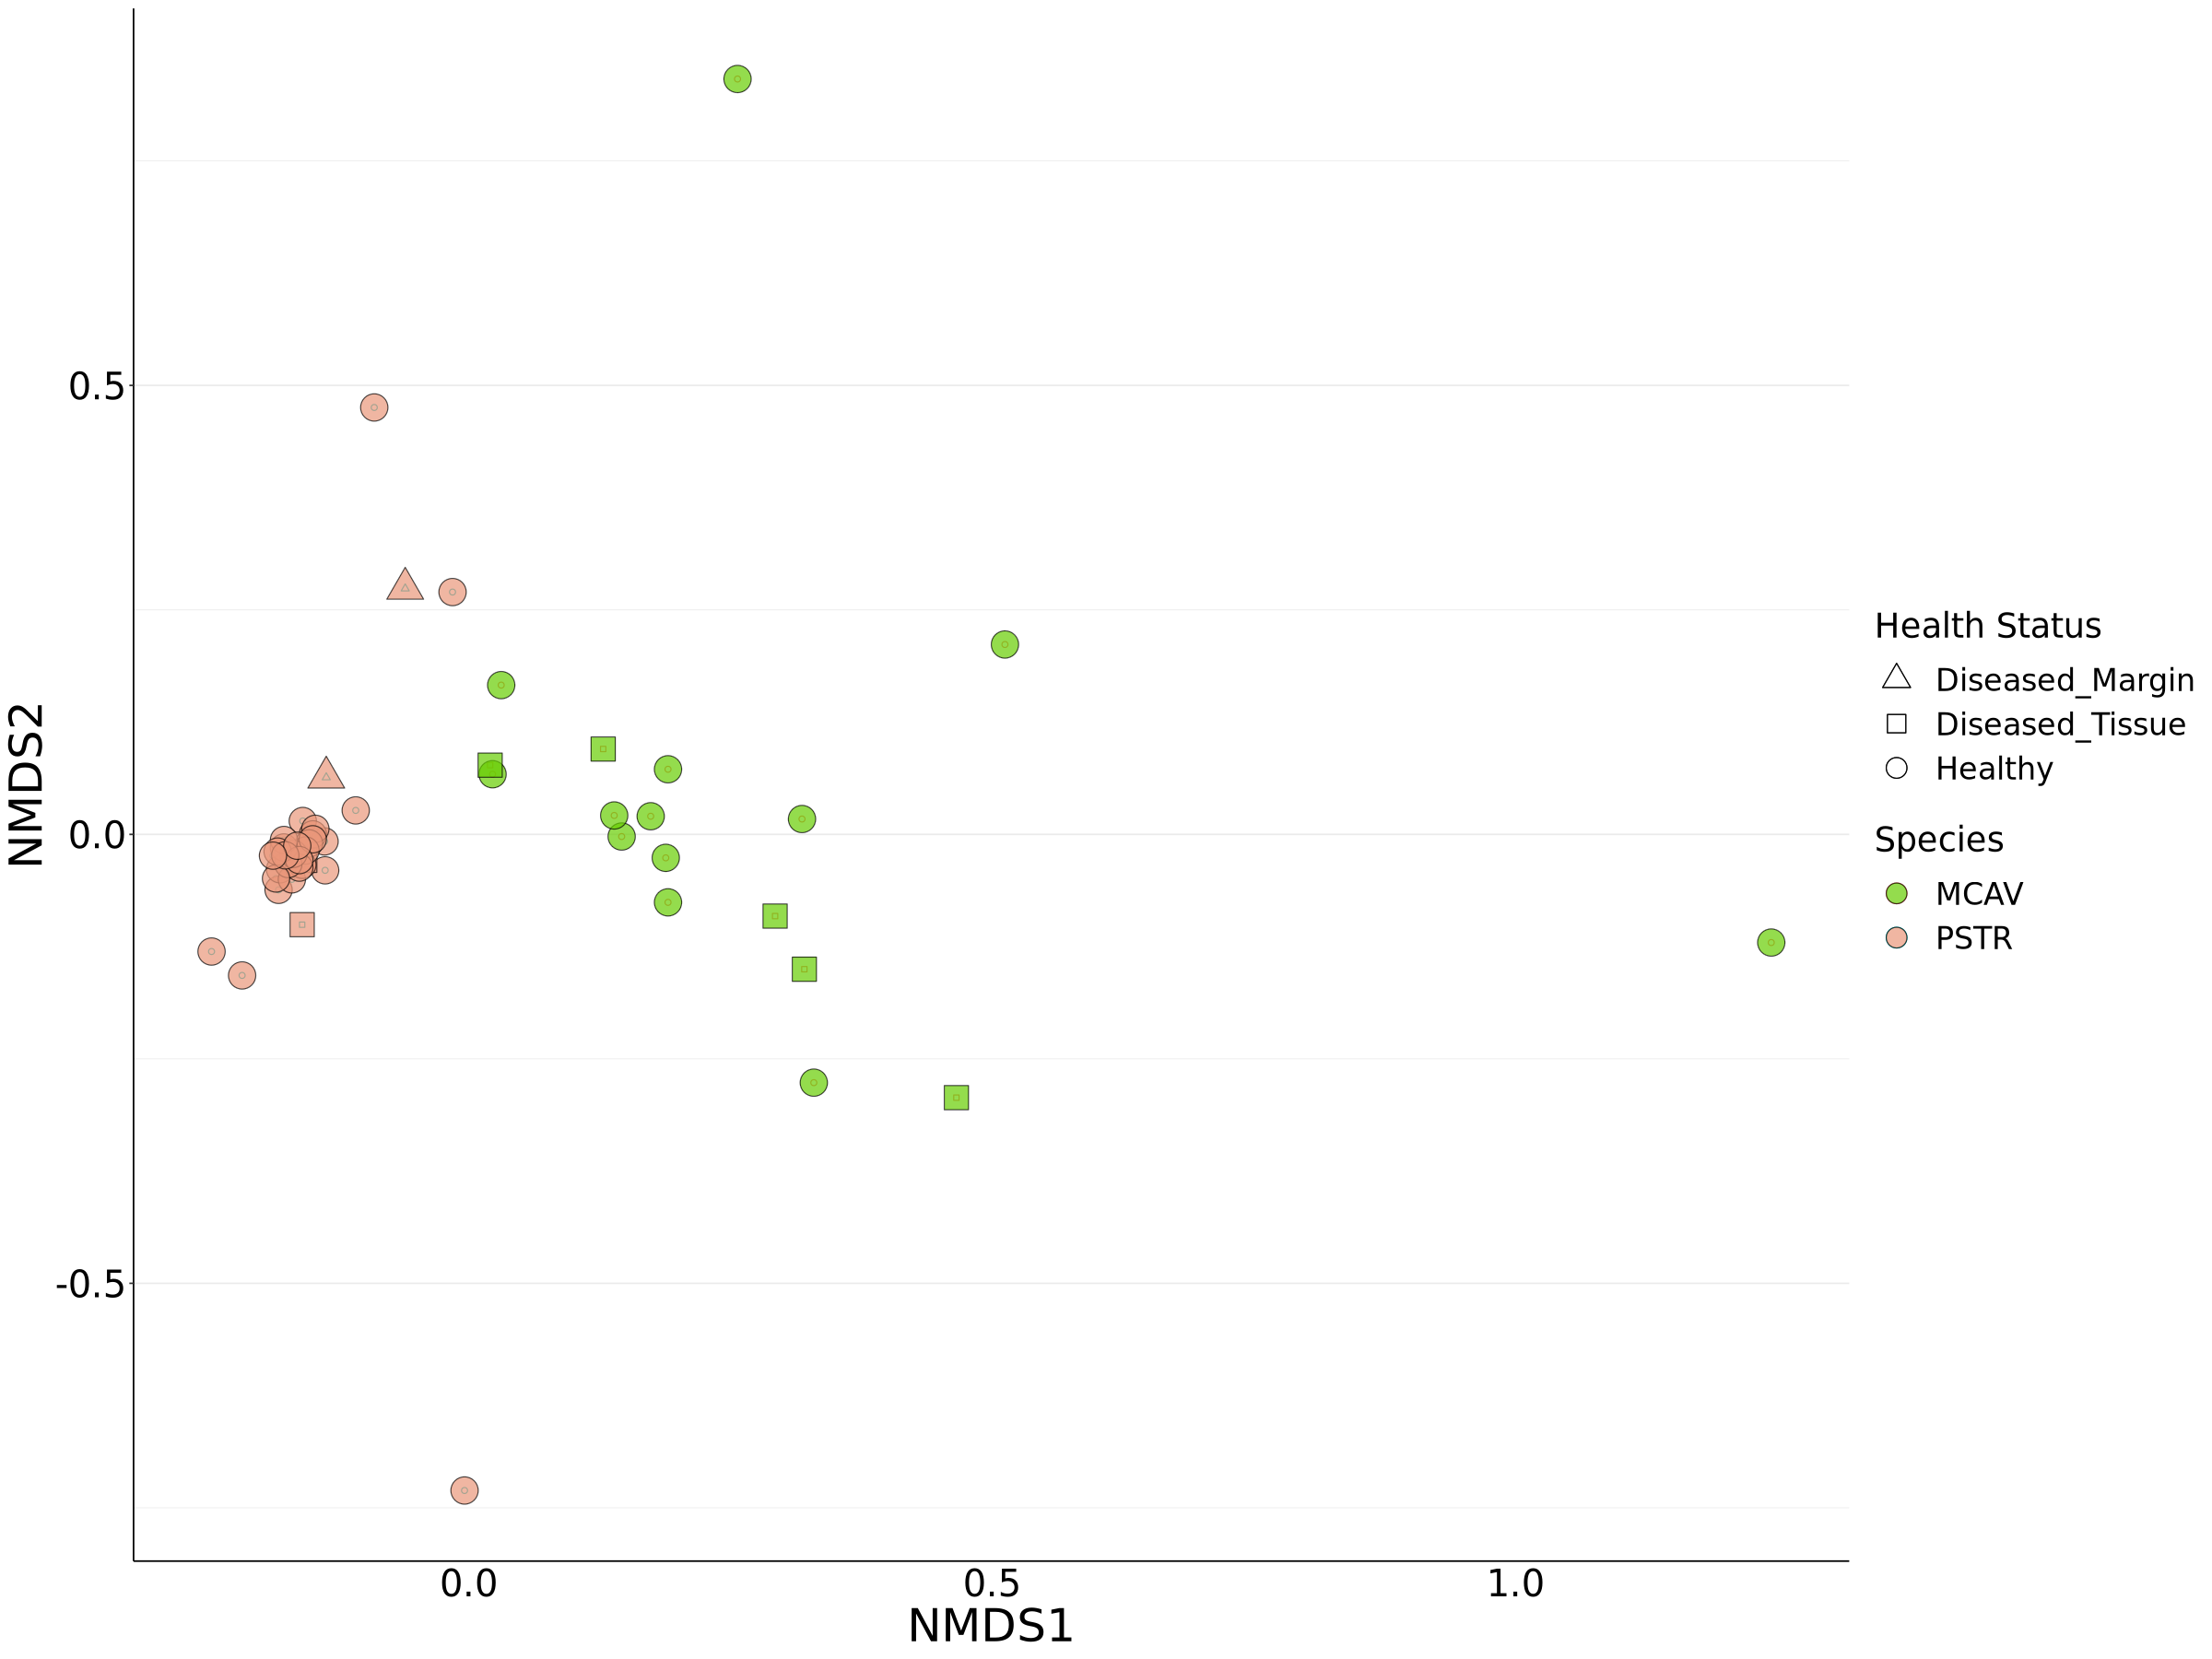

In [176]:
pstr_mcav_ord <- plot_ordination(Corals, Corals.ord, type = "samples", color = "Species", shape = "Health_status") +
  geom_point(size = 8, alpha = 0.7, aes(fill = Species, shape = Health_status), colour = "black") +  # Use specific shapes
  scale_fill_manual(values = c("PSTR" = "darksalmon", "MCAV" = "chartreuse3"), name = "Species") +  # Custom fill colors
  scale_shape_manual(values = c("Healthy" = 21, "Diseased_Tissue" = 22, "Diseased_Margin" = 24), name = "Health Status") + 
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 22),  # Larger legend title
    legend.text = element_text(size = 20),   # Larger legend text
    legend.key.size = unit(2, "lines"),    # Increase legend key size
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text = element_text(color = "black"),
    text = element_text(size = 30)
  ) +
  guides(
    fill = guide_legend(override.aes = list(shape = 21, size = 6)),  # Larger shape for fill legend
    shape = guide_legend(override.aes = list(size = 6))  # Larger shape for shape legend
  )
pstr_mcav_ord

In [177]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/pstr/taxonomy/figures')

In [178]:
# save ordination plot
ggsave(filename = "pstr_mcav_ord_plot_new.pdf", plot = pstr_mcav_ord, width = 15, height = 10)

In [179]:
# examining species and r vs s in healthy 2019 corals 
# Calculate the Bray-Curtis distance matrix
bray_dist19 <- phyloseq::distance(coral2019, method = "bray")
coral2019_df <- as(sample_data(coral2019), "data.frame")
# run permanova 
adonis_result <- adonis2(bray_dist19 ~ Species + Transect.y + RS,data = coral2019_df)
adonis_result
# species is still #1 
# would be interesting to redo with very diff susceptible species

Df SumOfSqs  R2         F         Pr(>F)
Species     1 1.6234787 0.20363928 7.8070739 0.001 
Transect.y  2 0.3951493 0.04956513 0.9501080 0.513 
RS          1 0.1311061 0.01644515 0.6304702 0.843 
Residual   28 5.8225916 0.73035044        NA    NA 
Total      32 7.9723258 1.00000000        NA    NA

In [180]:
# 2019 & 2022
Corals2019.ord <- ordinate(coral2019, "NMDS", "bray", trymax=1000)
Corals2022.ord <- ordinate(coral2022, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0791881 
Run 1 stress 0.08882256 
Run 2 stress 0.08883294 
Run 3 stress 0.09688623 
Run 4 stress 0.08768882 
Run 5 stress 0.07891365 
... New best solution
... Procrustes: rmse 0.005791032  max resid 0.02467851 
Run 6 stress 0.07893712 
... Procrustes: rmse 0.002648742  max resid 0.01158498 
Run 7 stress 0.09689084 
Run 8 stress 0.0985108 
Run 9 stress 0.102576 
Run 10 stress 0.09690856 
Run 11 stress 0.1129537 
Run 12 stress 0.0934745 
Run 13 stress 0.1128927 
Run 14 stress 0.07434426 
... New best solution
... Procrustes: rmse 0.05418411  max resid 0.2244148 
Run 15 stress 0.1036122 
Run 16 stress 0.1175129 
Run 17 stress 0.07434426 
... Procrustes: rmse 1.619257e-05  max resid 5.613452e-05 
... Similar to previous best
Run 18 stress 0.1067105 
Run 19 stress 0.07524776 
Run 20 stress 0.09376092 
*** Best solution repeated 1 times
Square root transformation
Wisconsin double standardization
Run 0 stress 0.043669

In [181]:
# visualize 2019 ordination plot
p2019 <- plot_ordination(coral2019, Corals2019.ord, type="samples", color="Species", shape="RS"
               )+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))
p2022<- # visualize 2022 ordination plot
plot_ordination(coral2022, Corals2022.ord, type="samples", color="Species", shape="RS"
               )+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
        legend.key.size = unit(3, "cm"),  # Adjust size of legend keys
        legend.text = element_text(size = 14),  # Adjust size of legend text
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

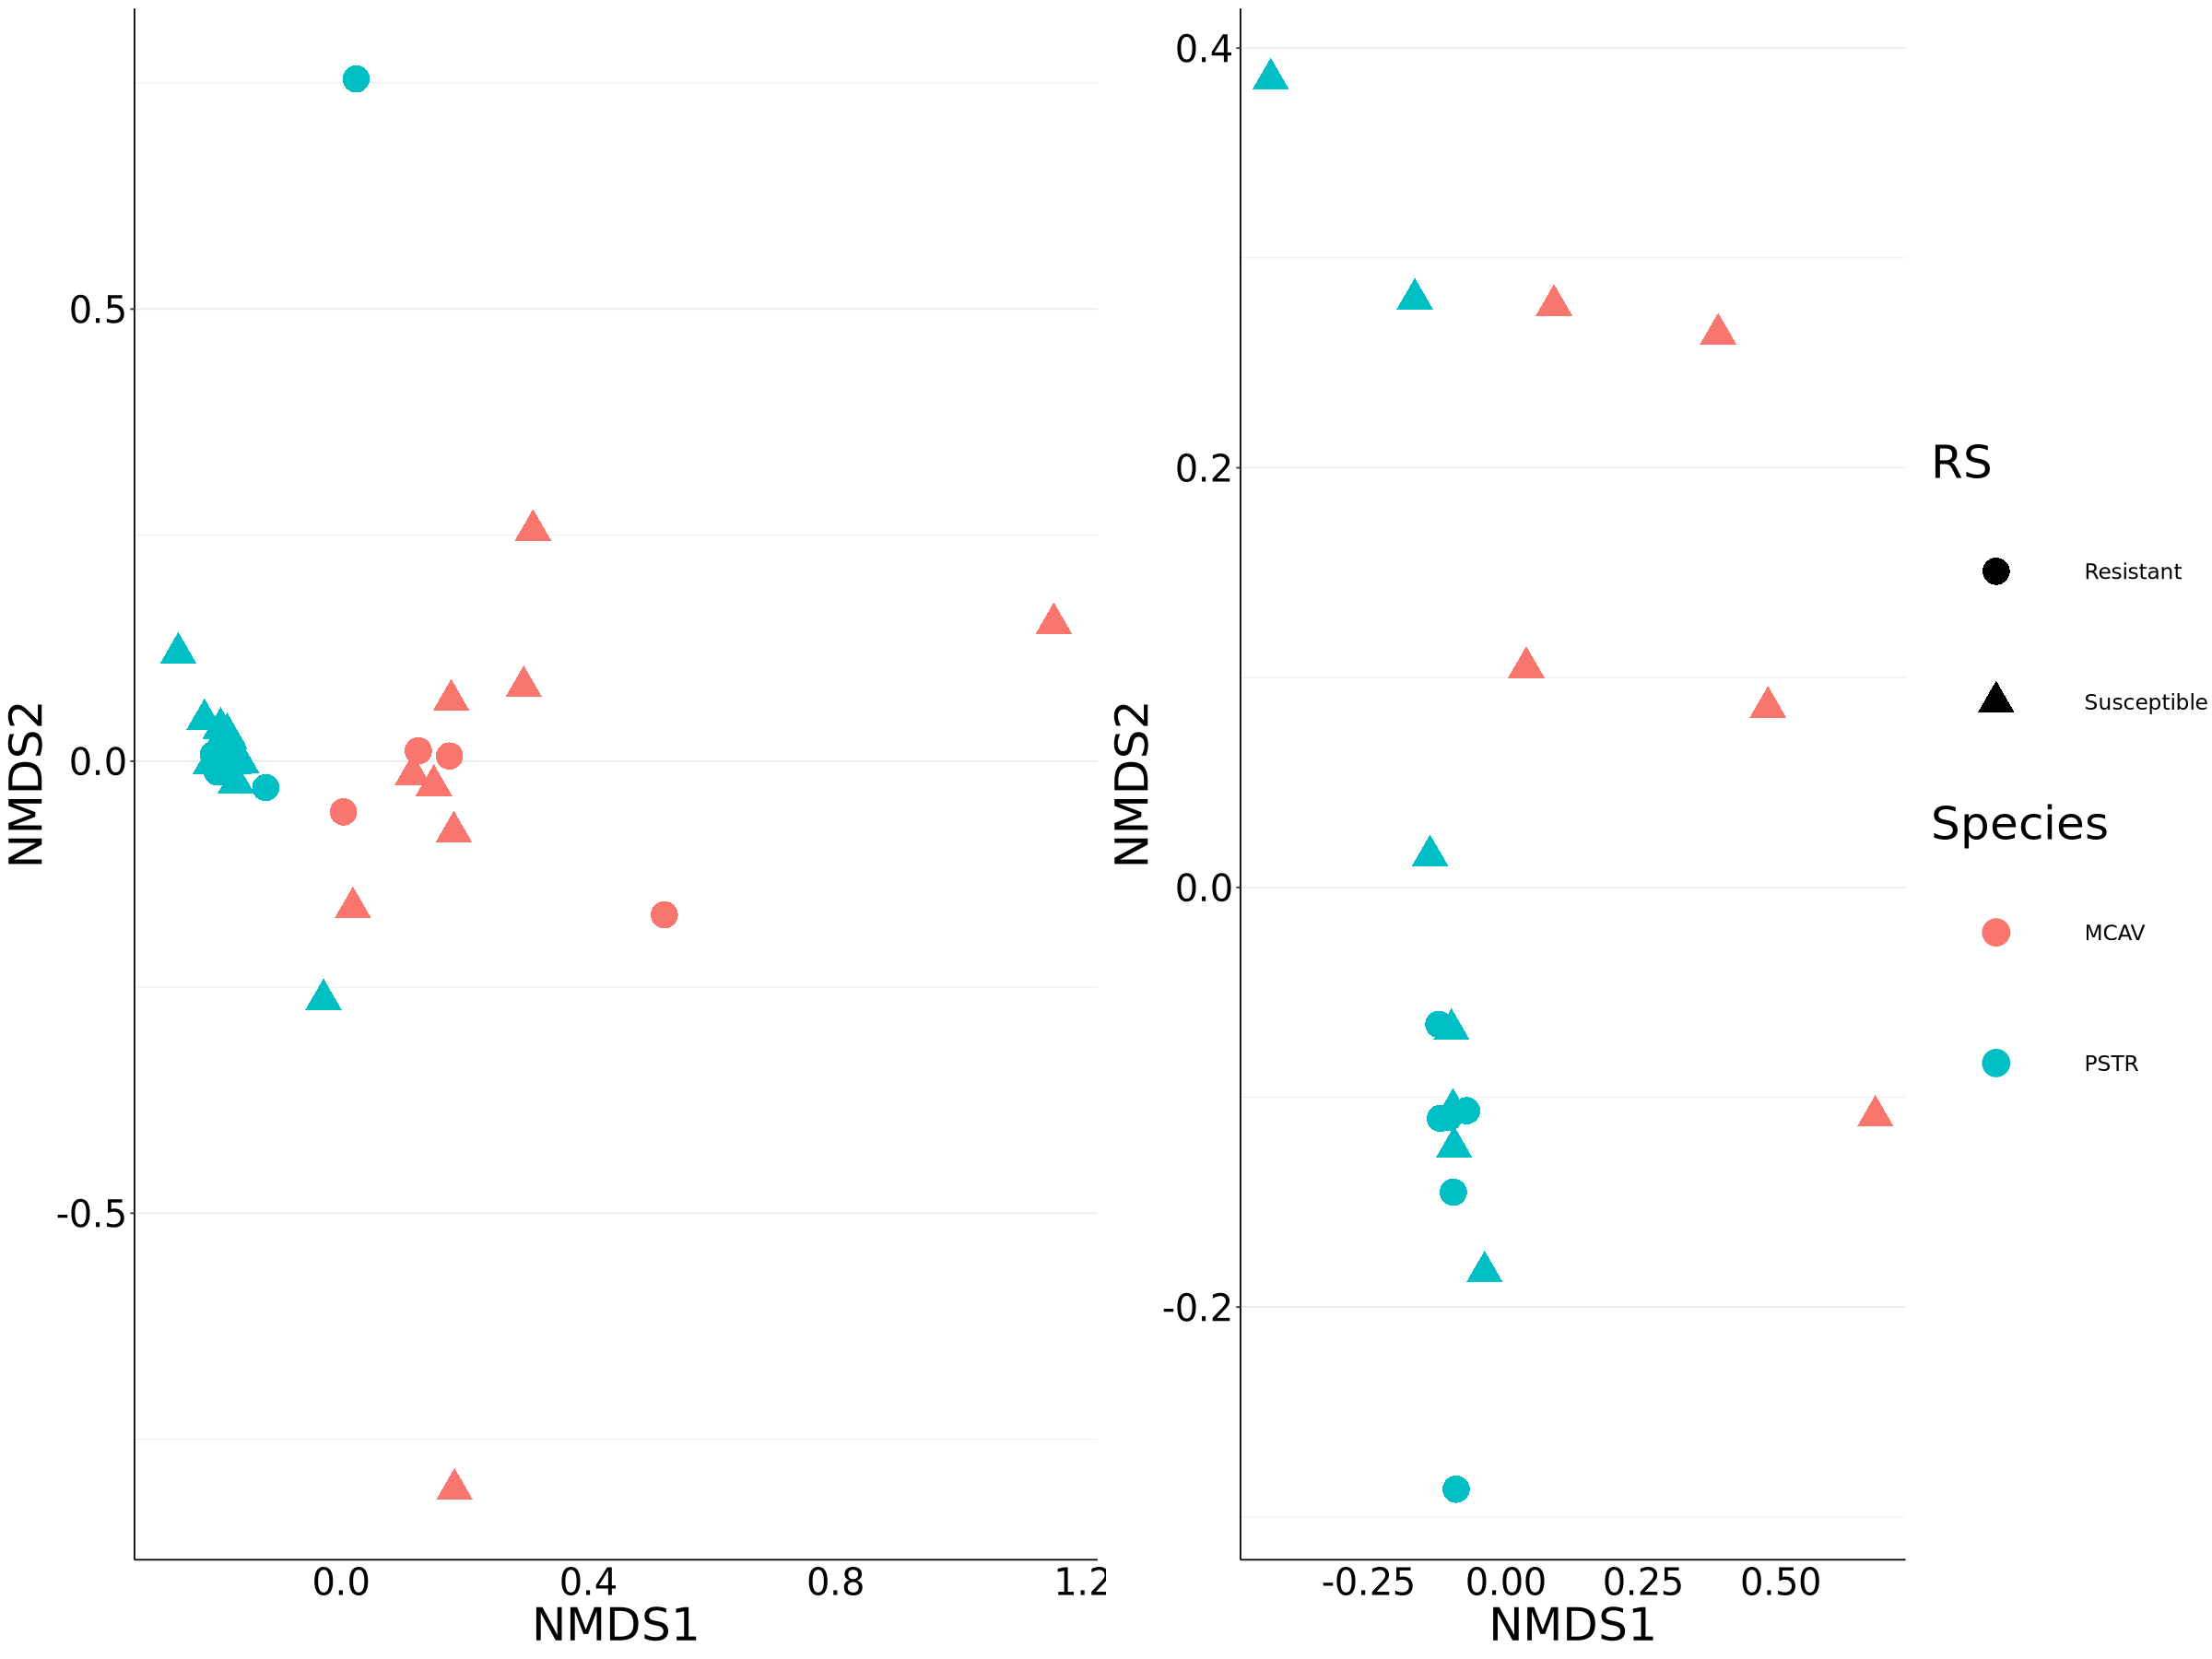

In [182]:
# Extract and remove the legend from the 2019 plot
legend <- get_legend(p2019)
p2019_noleg <- p2019 + theme(legend.position = "none")
# Combine the plots 
combined_plot <- plot_grid(p2019_noleg, p2022, ncol = 2, rel_widths = c(0.5, 0.5))
print(combined_plot)
ggsave("combined_nmdsplot.png", combined_plot, width = 20, height = 10)
ggsave("nmds2019.png", p2019, width = 20, height = 10)
ggsave("nmds2022.png", p2022, width = 20, height = 10)

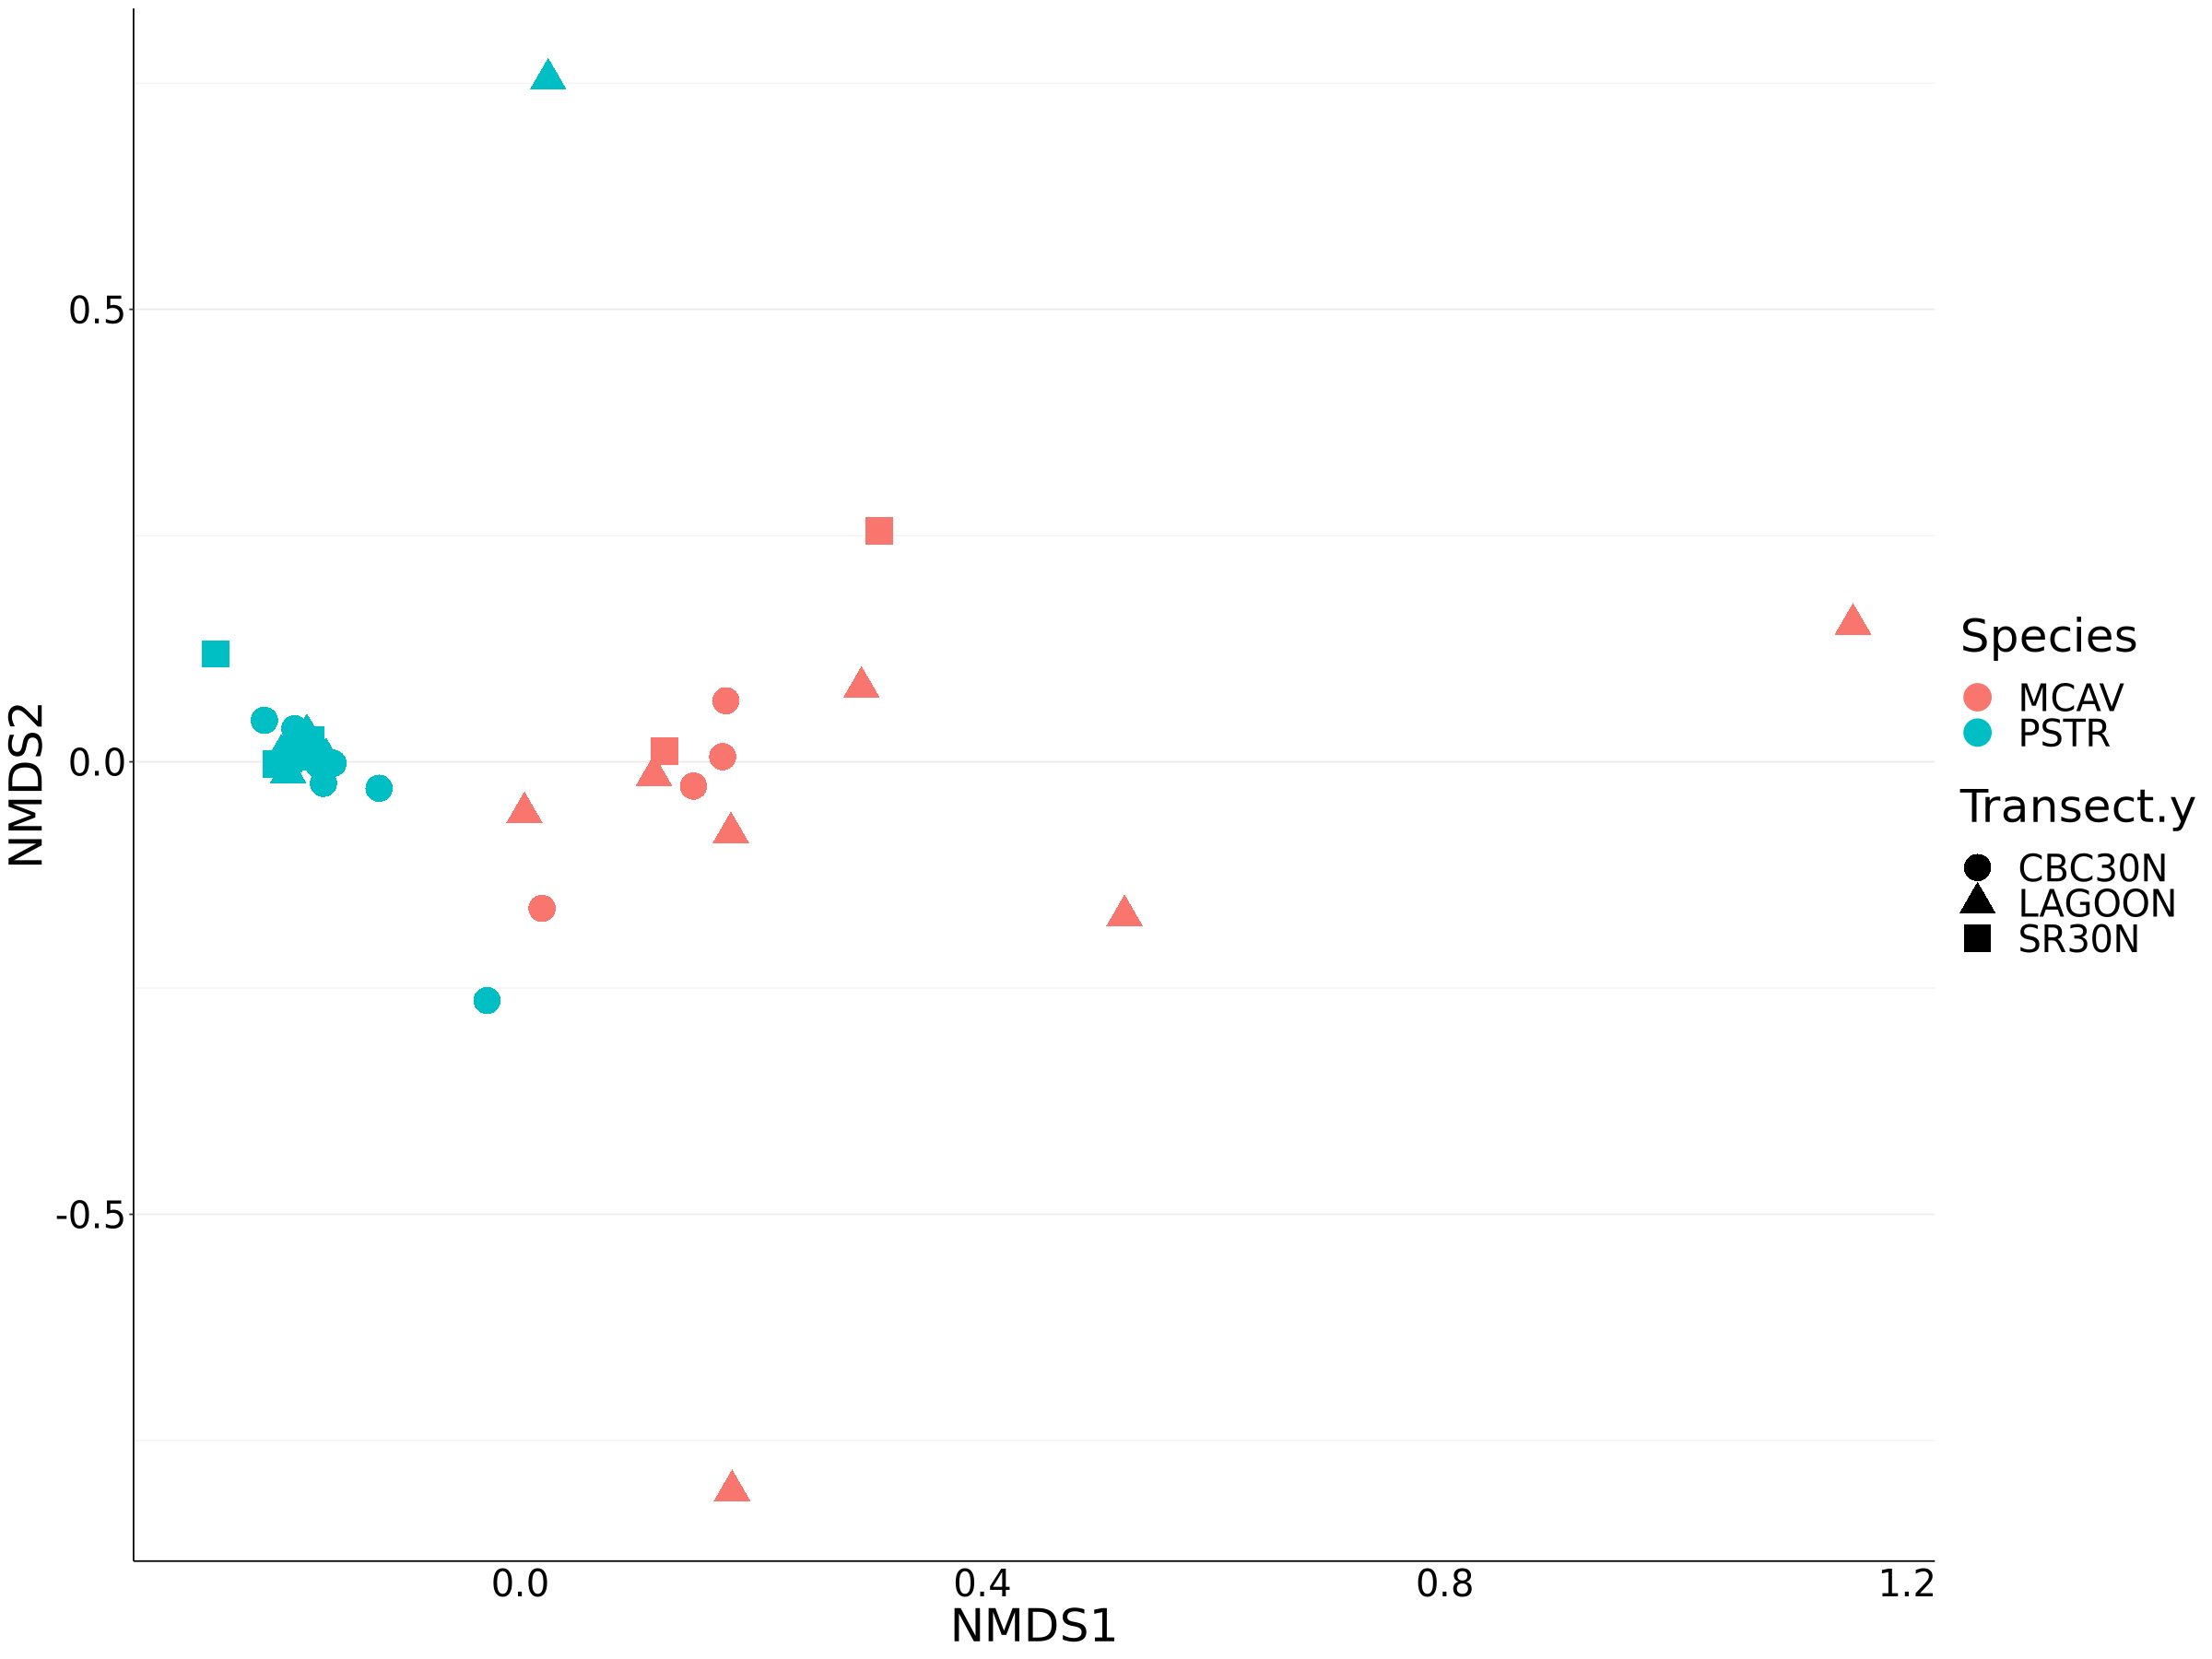

In [183]:
# visualize 2019 - by transect 
nmds_trans<-plot_ordination(coral2019, Corals2019.ord, type="samples", color="Species", shape="Transect.y"
               )+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))
nmds_trans

In [184]:
ggsave("nmds_2019_Transect.png", nmds_trans, width = 20, height = 10)

In [185]:
#install.packages('ggplot')
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("ggplot2")

In [186]:
#install.packages('RColorBrewer')

In [187]:
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 51 samples ]
sample_data() Sample Data:       [ 51 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [188]:
Corals_10 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:10]), Corals)
Corals_10_norm <- transform_sample_counts(Corals_10, function(x) x / sum(x))

In [189]:
Corals_30 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:30]), Corals)
# normalize abundances (out of 100%)
Corals_30_norm <- transform_sample_counts(Corals_30, function(x) x / sum(x))

In [190]:
Corals_100 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:100]), Corals)
Corals_100_norm <- transform_sample_counts(Corals_100, function(x) x / sum(x))

In [191]:
colors <- c( "#b73962", "#e994a6", "#be6b7c", "#944557", "#ea2c68", "#e65e74", "#b33841", "#dd3640", "#dd7267", "#de2b1c", "#a46452", "#c04926", "#9b4426", "#ec5825", "#e6a485", "#c2744d", "#e77d46", "#a3601b", "#845526", "#e28c23", "#d79651", "#a4844d", "#aa8523", "#d2b067", "#d3b135", "#726520", "#81871c", "#b4b75d", "#a5c030", "#829055", "#7a9a3c", "#566935", "#a7bc85", "#4e7023", "#64a422", "#89c45e", "#57ce3c", "#2f7f2d", "#3aa83a", "#5d9b58", "#7ec485", "#47cc7a", "#2c6f47", "#32a064", "#2f8970", "#53ae93", "#3fc9a6", "#64d3c2", "#41bbc8", "#3da5c4", "#4b8ebf", "#72b3e8", "#3270a7", "#2e5b88", "#4795e0", "#5790ed", "#2b6abe", "#2580fe", "#415691", "#6274b2", "#4b80ec", "#95a0e6", "#4362c2", "#7c89e9", "#5166ec", "#3c4dbb", "#5756a0", "#695dbf", "#8476c6", "#675cd3", "#4e45a3", "#4d4adc", "#8f76e8", "#72619d", "#9b87be", "#6b4fa0", "#7048b1", "#7532e8", "#b58aea", "#9655e8", "#cda8e4", "#7c608c", "#8a52ae", "#634872", "#bc6aea", "#b436e6", "#9235b6", "#7e4990", "#b175b9", "#9b43a1", "#dd7adc", "#e635ea", "#d043cc", "#915882", "#d78bbb", "#ba3291", "#ea3db5", "#a24680", "#e670af", "#e3418b" )

In [192]:
#(to make the colors comma separated instead of sep by line (from iwanthue.com))
#cat("colors <- c(", paste0('"', colors, '"', collapse = ", "), ")\n")

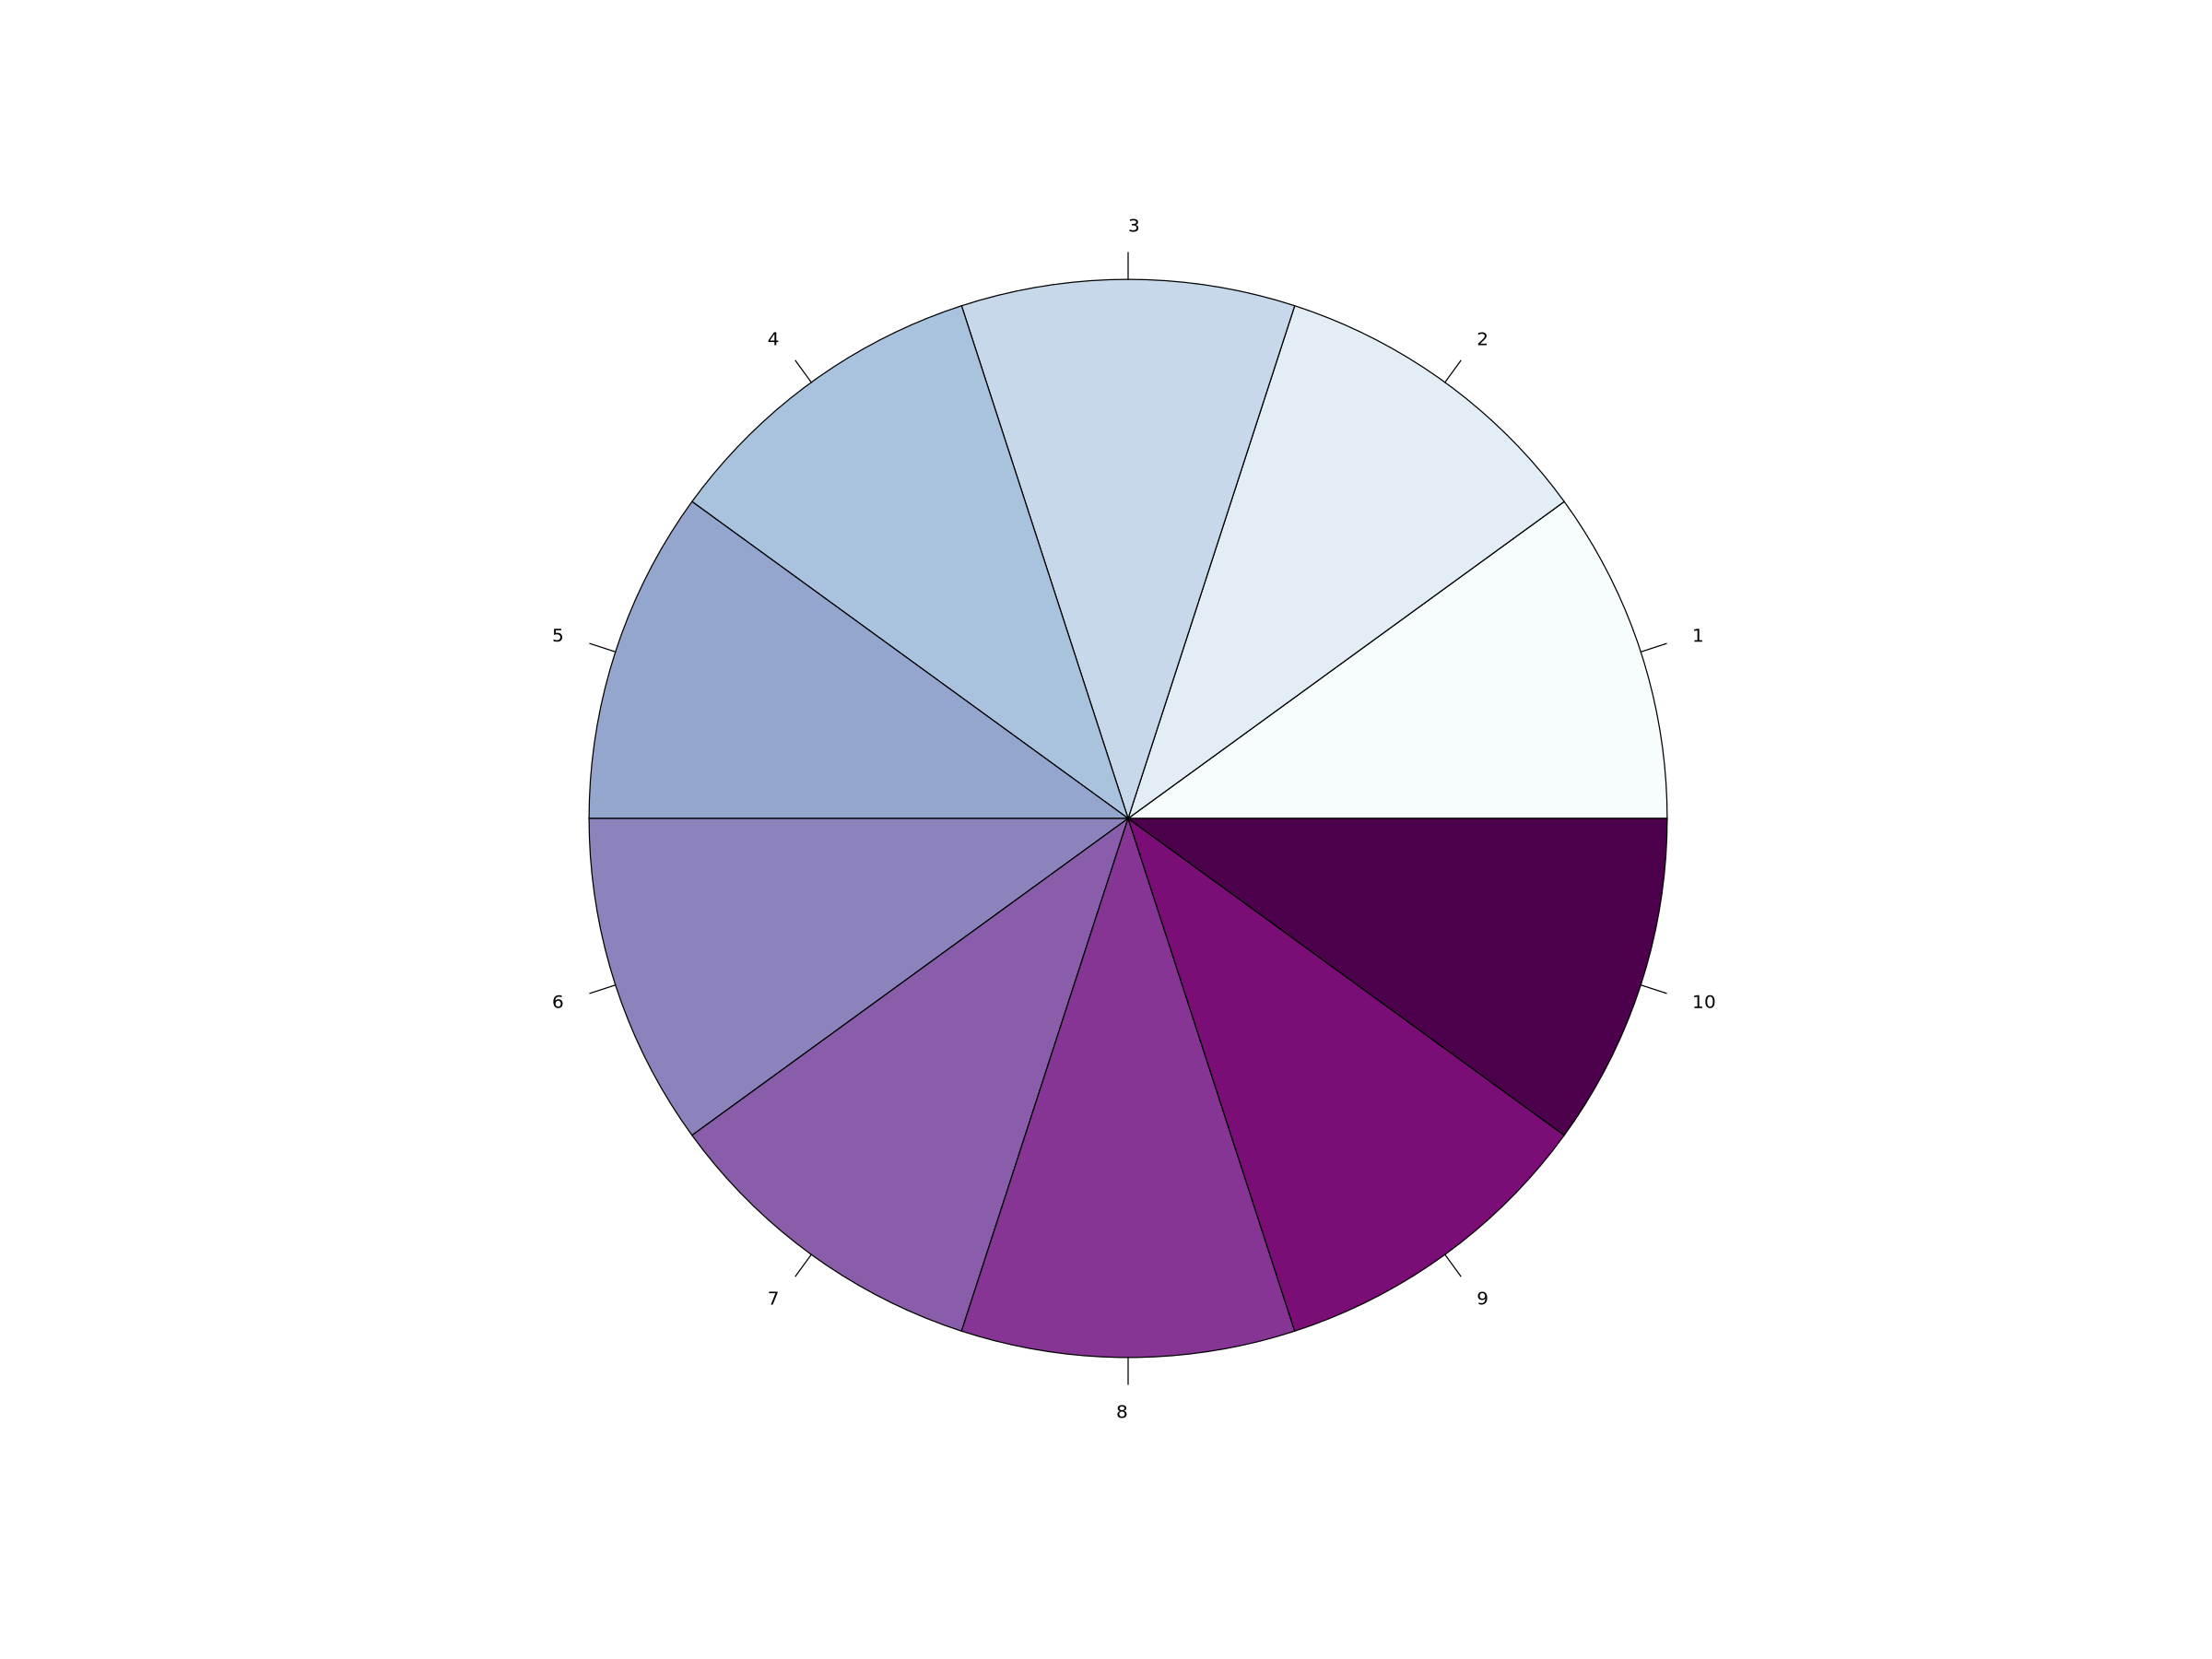

In [193]:
coul <- brewer.pal(9, "BuPu") 
# Add more colors to this palette :
coul <- colorRampPalette(coul)(10)
# Plot it
pie(rep(1, length(coul)), col = coul , main="") 

In [194]:
colors_30 <- c( "#e28d99", "#ee7473", "#f2703f", "#dc966f", "#de9435", "#d6b36e", "#dbbf37", "#abb160", "#bdd630", "#bade6b", "#7ead3b", "#bcdc9c", "#66d34d", "#65d77c", "#66af7a", "#5ae5ac", "#77e3c6", "#47b1a5", "#5ae4e5", "#41aec3", "#5eceed", "#3ba1d2", "#78b0e7", "#7796ed", "#b5a5dd", "#aa7df5", "#c891e3", "#e66dd5", "#de95c9", "#f2699f" )

In [195]:
#cat("colors_30 <- c(", paste0('"', colors_30, '"', collapse = ", "), ")\n")

In [196]:
#tagID_colors <- colorRampPalette(brewer.pal(12, "Paired"))(length(unique(Corals_30_norm@sam_data$tagID)))
#names(tagID_colors) <- unique(Corals_30_norm@sam_data$tagID)

# highlighting colors by tagid hasnt been working..

In [197]:
# just healthy, 2019 pstr 
pstrSamp<-SAMP2019[SAMP2019$Species=="PSTR"]
ph19_Corals<- phyloseq(OTU, pstrSamp, TAX)

In [198]:
# just healthy, 2019 mcav 
mcavSamp<-SAMP2019[SAMP2019$Species=="MCAV"]
mh19_Corals<- phyloseq(OTU, mcavSamp, TAX)

In [199]:
mh19_Corals@sam_data

tagID       Month_year Country Location
062019_BEL_CBC_T3_8_MCAV  MCAV_T3_14  62019      BEL     CBC     
062019_BEL_CBC_T2_16_MCAV MCAV_T2_60  62019      BEL     CBC     
062019_BEL_CBC_T1_20_MCAV MCAV_T1_7   62019      BEL     CBC     
062019_BEL_CBC_T1_24_MCAV MCAV_T1_15  62019      BEL     CBC     
062019_BEL_CBC_T3_9_MCAV  MCAV_T3_15  62019      BEL     CBC     
062019_BEL_CBC_T3_14_MCAV MCAV_T3_17  62019      BEL     CBC     
062019_BEL_CBC_T3_1_MCAV  MCAV_T3_2   62019      BEL     CBC     
062019_BEL_CBC_T3_15_MCAV MCAV_T3_22  62019      BEL     CBC     
062019_BEL_CBC_T1_16_MCAV MCAV_T1_8   62019      BEL     CBC     
062019_BEL_CBC_T3_16_MCAV MCAV_T3_21  62019      BEL     CBC     
062019_BEL_CBC_T1_3_MCAV  MCAV_T1_355 62019      BEL     CBC     
062019_BEL_CBC_T2_5_MCAV  MCAV_T2_59  62019      BEL     CBC     
062019_BEL_CBC_T3_6_MCAV  MCAV_T3_9   62019      BEL     CBC     
                          CollectionDate OldTagNum.x Species Time_sampled
062019_BEL_CBC_T3_8_MCAV  6/23/19        369         MCAV                
062019_BEL_CBC_T2_16_MCAV 6/22/19        305         MCAV                
062019_BEL_CBC_T1_20_MCAV 6/24/19        383         MCAV                
062019_BEL_CBC_T1_24_MCAV 6/26/19        359         MCAV                
062019_BEL_CBC_T3_9_MCAV  6/23/19        379         MCAV                
062019_BEL_CBC_T3_14_MCAV 6/23/19        301         MCAV                
062019_BEL_CBC_T3_1_MCAV  6/23/19        327         MCAV                
062019_BEL_CBC_T3_15_MCAV 6/23/19        363         MCAV                
062019_BEL_CBC_T1_16_MCAV 6/24/19        390         MCAV                
062019_BEL_CBC_T3_16_MCAV 6/23/19        374         MCAV                
062019_BEL_CBC_T1_3_MCAV  6/21/19        355         MCAV                
062019_BEL_CBC_T2_5_MCAV  6/21/19        339         MCAV                
062019_BEL_CBC_T3_6_MCAV  6/23/19        367         MCAV                
                          Time_processed Sample_type ⋯ X042024_Percentage
062019_BEL_CBC_T3_8_MCAV                 Core_EtOH   ⋯                   
062019_BEL_CBC_T2_16_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T1_20_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T1_24_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T3_9_MCAV                 Core_EtOH   ⋯                   
062019_BEL_CBC_T3_14_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T3_1_MCAV                 Core_EtOH   ⋯                   
062019_BEL_CBC_T3_15_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T1_16_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T3_16_MCAV                Core_EtOH   ⋯                   
062019_BEL_CBC_T1_3_MCAV                 Core_EtOH   ⋯                   
062019_BEL_CBC_T2_5_MCAV                 Core_EtOH   ⋯                   
062019_BEL_CBC_T3_6_MCAV                 Core_EtOH   ⋯                   
                          X062024_Condition X062024_Percentage
062019_BEL_CBC_T3_8_MCAV  Healthy                             
062019_BEL_CBC_T2_16_MCAV Healthy                             
062019_BEL_CBC_T1_20_MCAV Not_Visited                         
062019_BEL_CBC_T1_24_MCAV Not_Visited                         
062019_BEL_CBC_T3_9_MCAV  Not_Visited                         
062019_BEL_CBC_T3_14_MCAV Not_Visited                         
062019_BEL_CBC_T3_1_MCAV  Diseased_Other                      
062019_BEL_CBC_T3_15_MCAV Not_Visited                         
062019_BEL_CBC_T1_16_MCAV Not_Visited                         
062019_BEL_CBC_T3_16_MCAV Healthy                             
062019_BEL_CBC_T1_3_MCAV  Not_Visited                         
062019_BEL_CBC_T2_5_MCAV  Not_Visited                         
062019_BEL_CBC_T3_6_MCAV  Not_Visited                         
                          Notes_062024                                                   
062019_BEL_CBC_T3_8_MCAV                                  

In [200]:
ph19_Corals_100 = prune_taxa(names(sort(taxa_sums(ph19_Corals),TRUE)[1:100]), ph19_Corals)
ph19_Corals_norm <- transform_sample_counts(ph19_Corals_100, function(x) x / sum(x))

In [201]:
ph19_Corals_10 = prune_taxa(names(sort(taxa_sums(ph19_Corals),TRUE)[1:10]), ph19_Corals)
ph19_Corals_10_norm <- transform_sample_counts(ph19_Corals_10, function(x) x / sum(x))

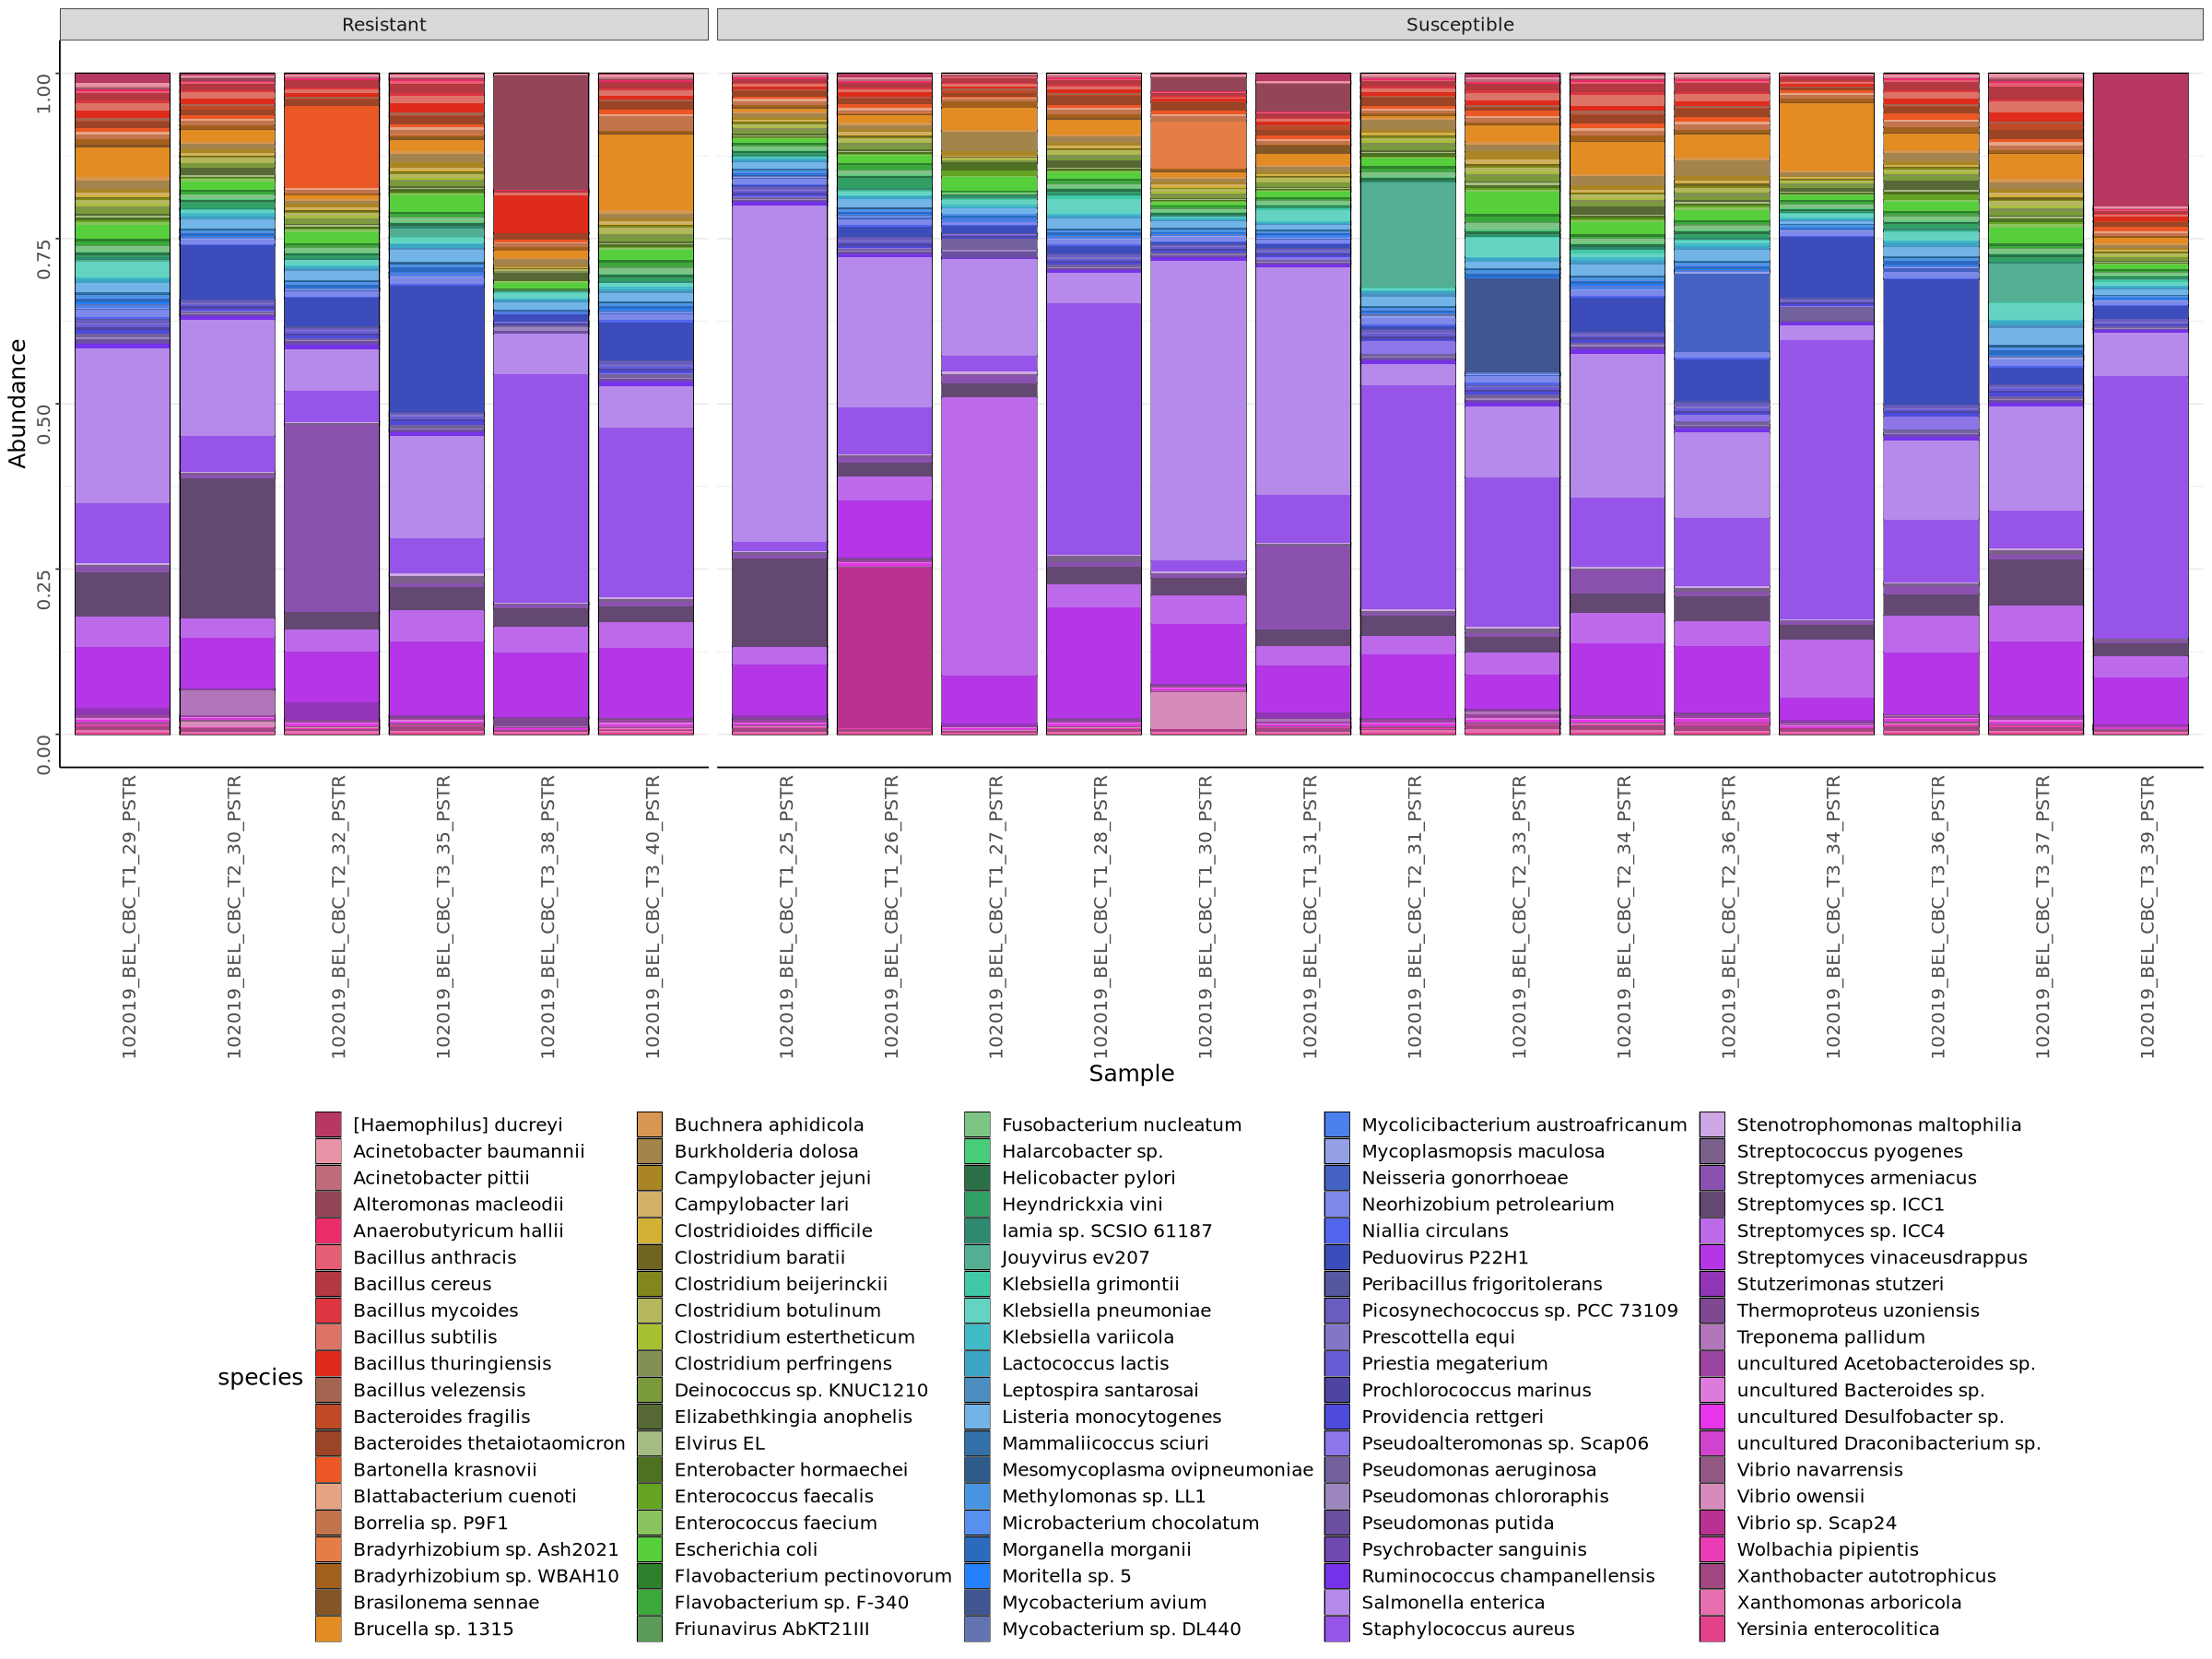

In [202]:
# view bar plot - healthy,2019 SAMPLES only in pstr 
pstr_bar<-plot_bar(ph19_Corals_norm,fill='species')+
facet_grid(~RS, scales="free_x", space="free")+
geom_bar(aes(fill=species), stat="identity",position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))
pstr_bar

In [203]:
ggsave(file="pstr_RS_barplot.pdf",plot=pstr_bar,, width = 15, height = 20)

In [204]:
colors_10<- c("#ff6c45",
"#c78b19",
"#fdd778",
"#69a150",
"#45c097",
"#7dbcdf",
"#848cd3",
"#4854e3",
"#5d3889",
"#be5aa0")

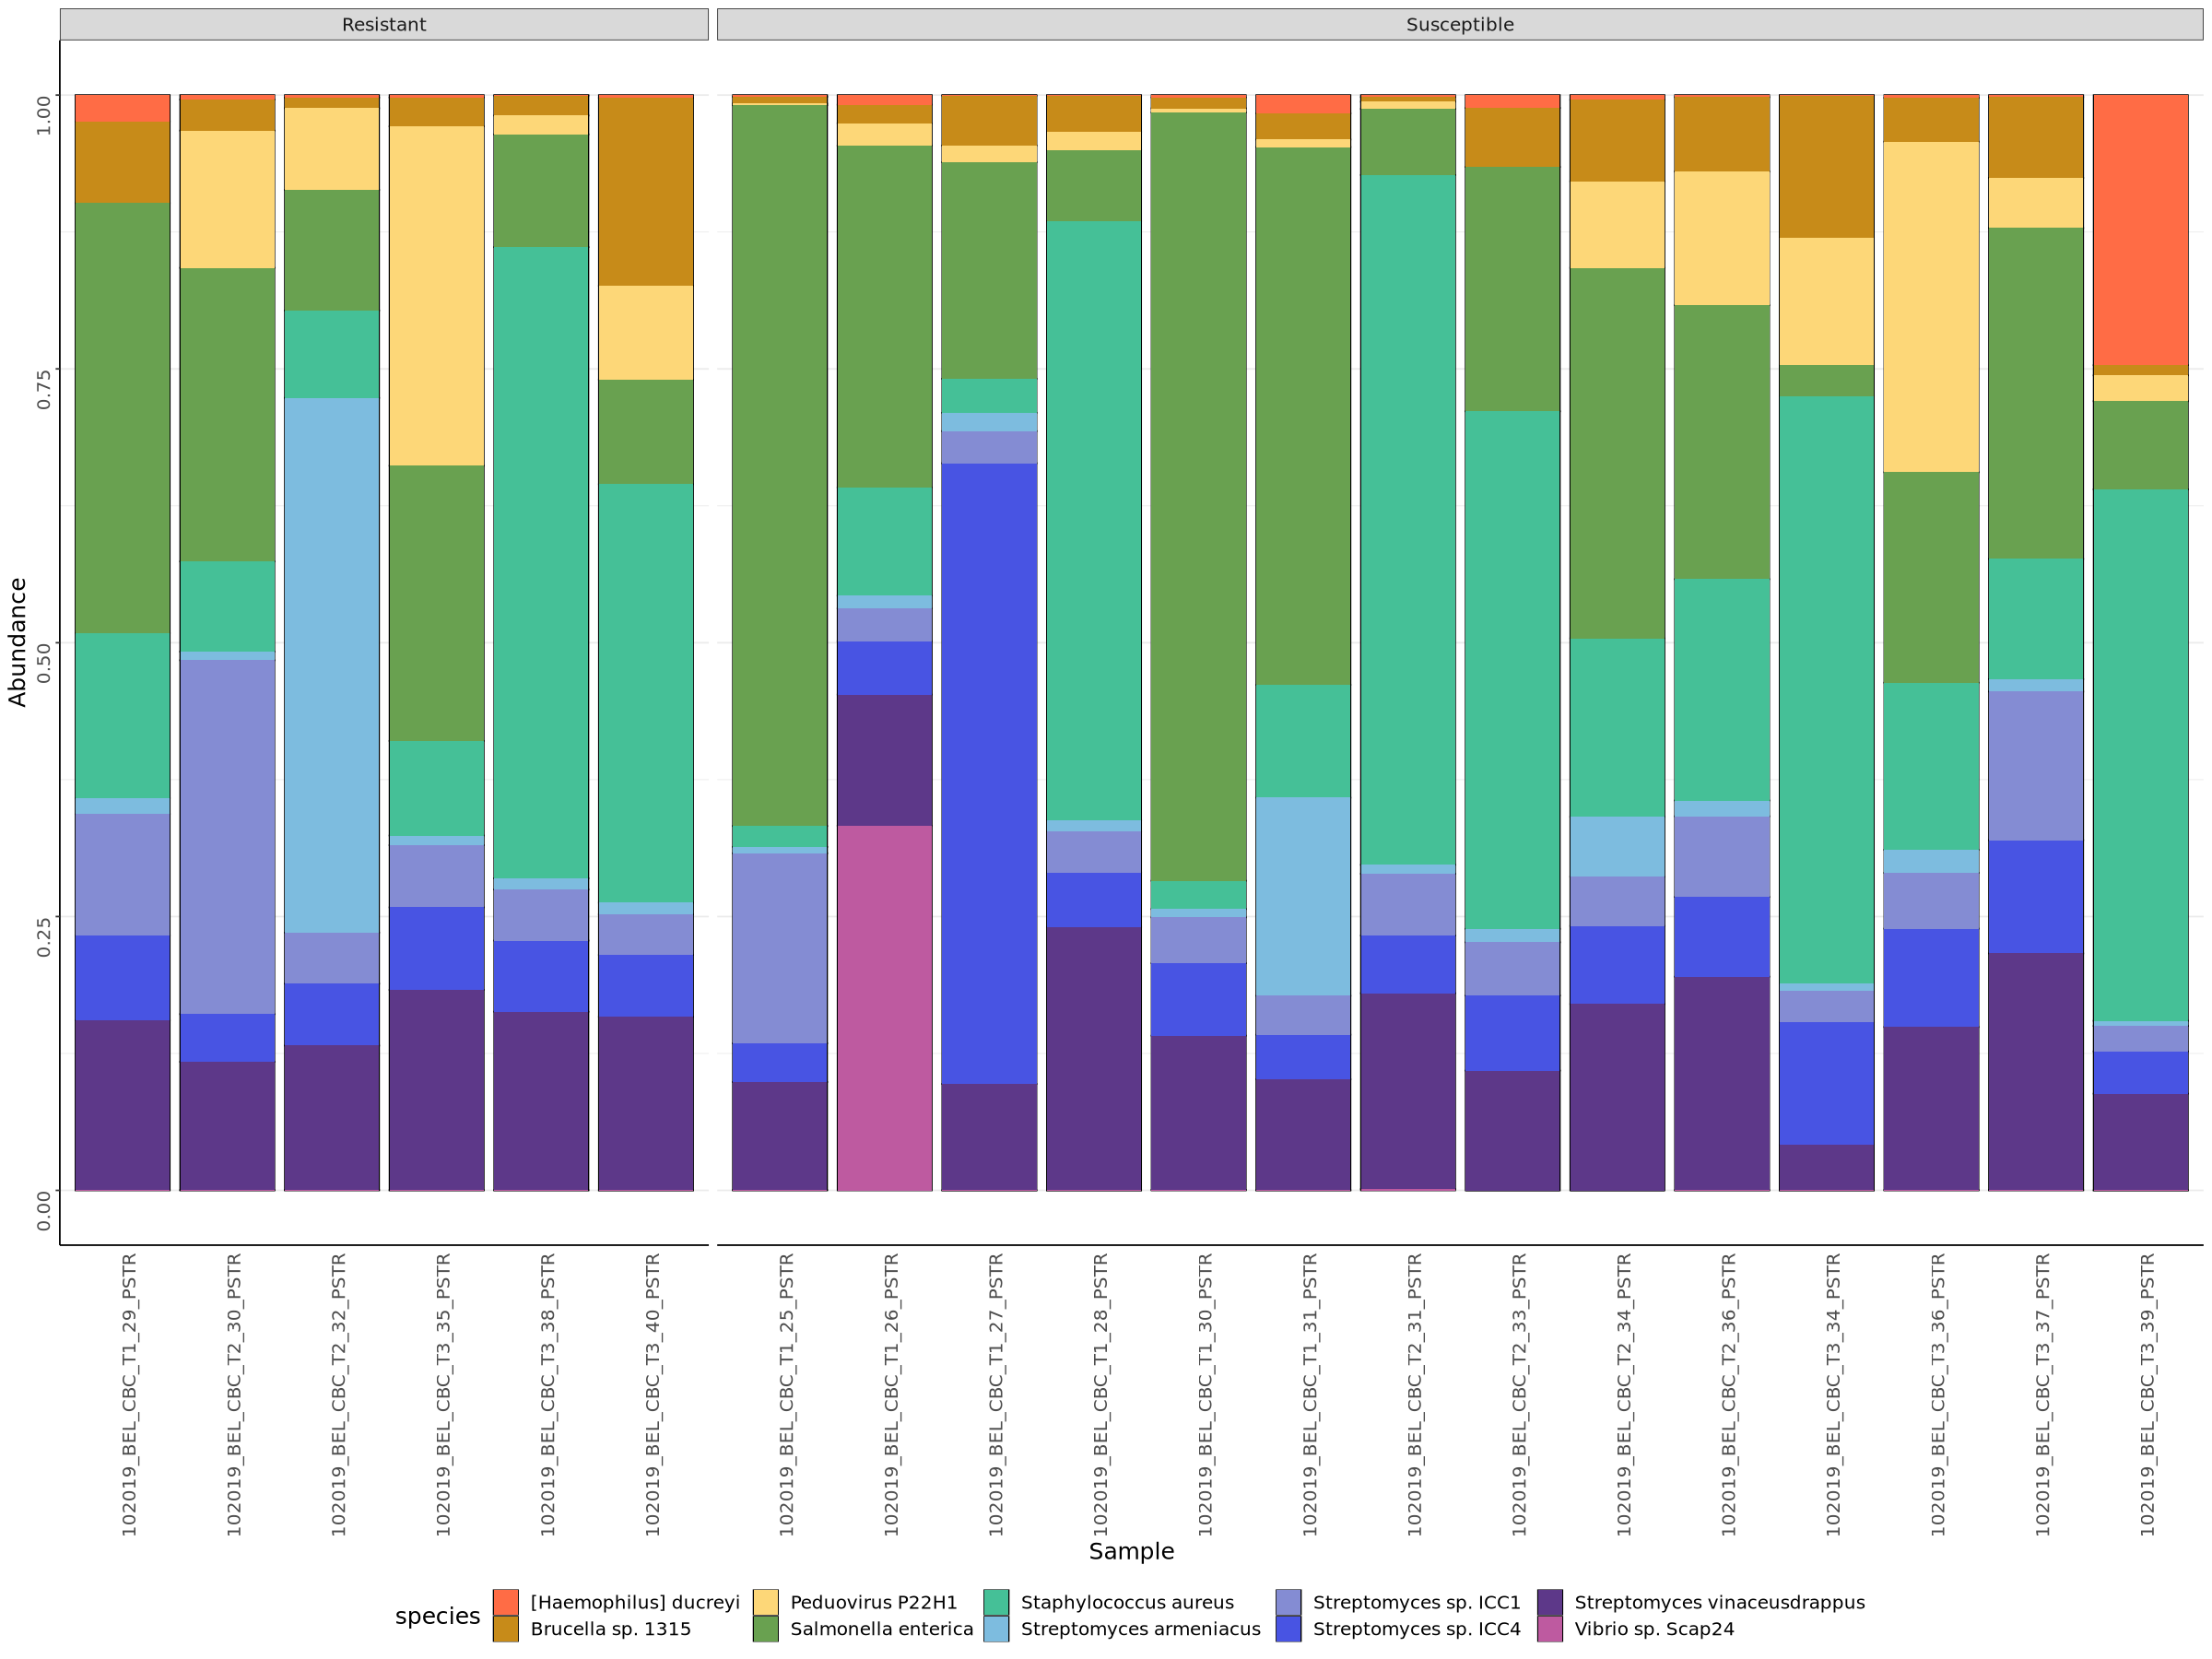

In [205]:
# view bar plot - healthy,2019 SAMPLES only in pstr 
pstr_10_bar<-plot_bar(ph19_Corals_10_norm,fill='species')+
facet_grid(~RS, scales="free_x", space="free")+
geom_bar(aes(fill=species), stat="identity",position="stack")+
scale_fill_manual(values = colors_10) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))
pstr_10_bar

In [206]:
ggsave(file="pstr_RS_barplot10.pdf",plot=pstr_10_bar, width = 15, height = 20)

In [207]:
mh19_Corals_100 = prune_taxa(names(sort(taxa_sums(mh19_Corals),TRUE)[1:100]), mh19_Corals)
mh19_Corals_norm <- transform_sample_counts(mh19_Corals_100, function(x) x / sum(x))

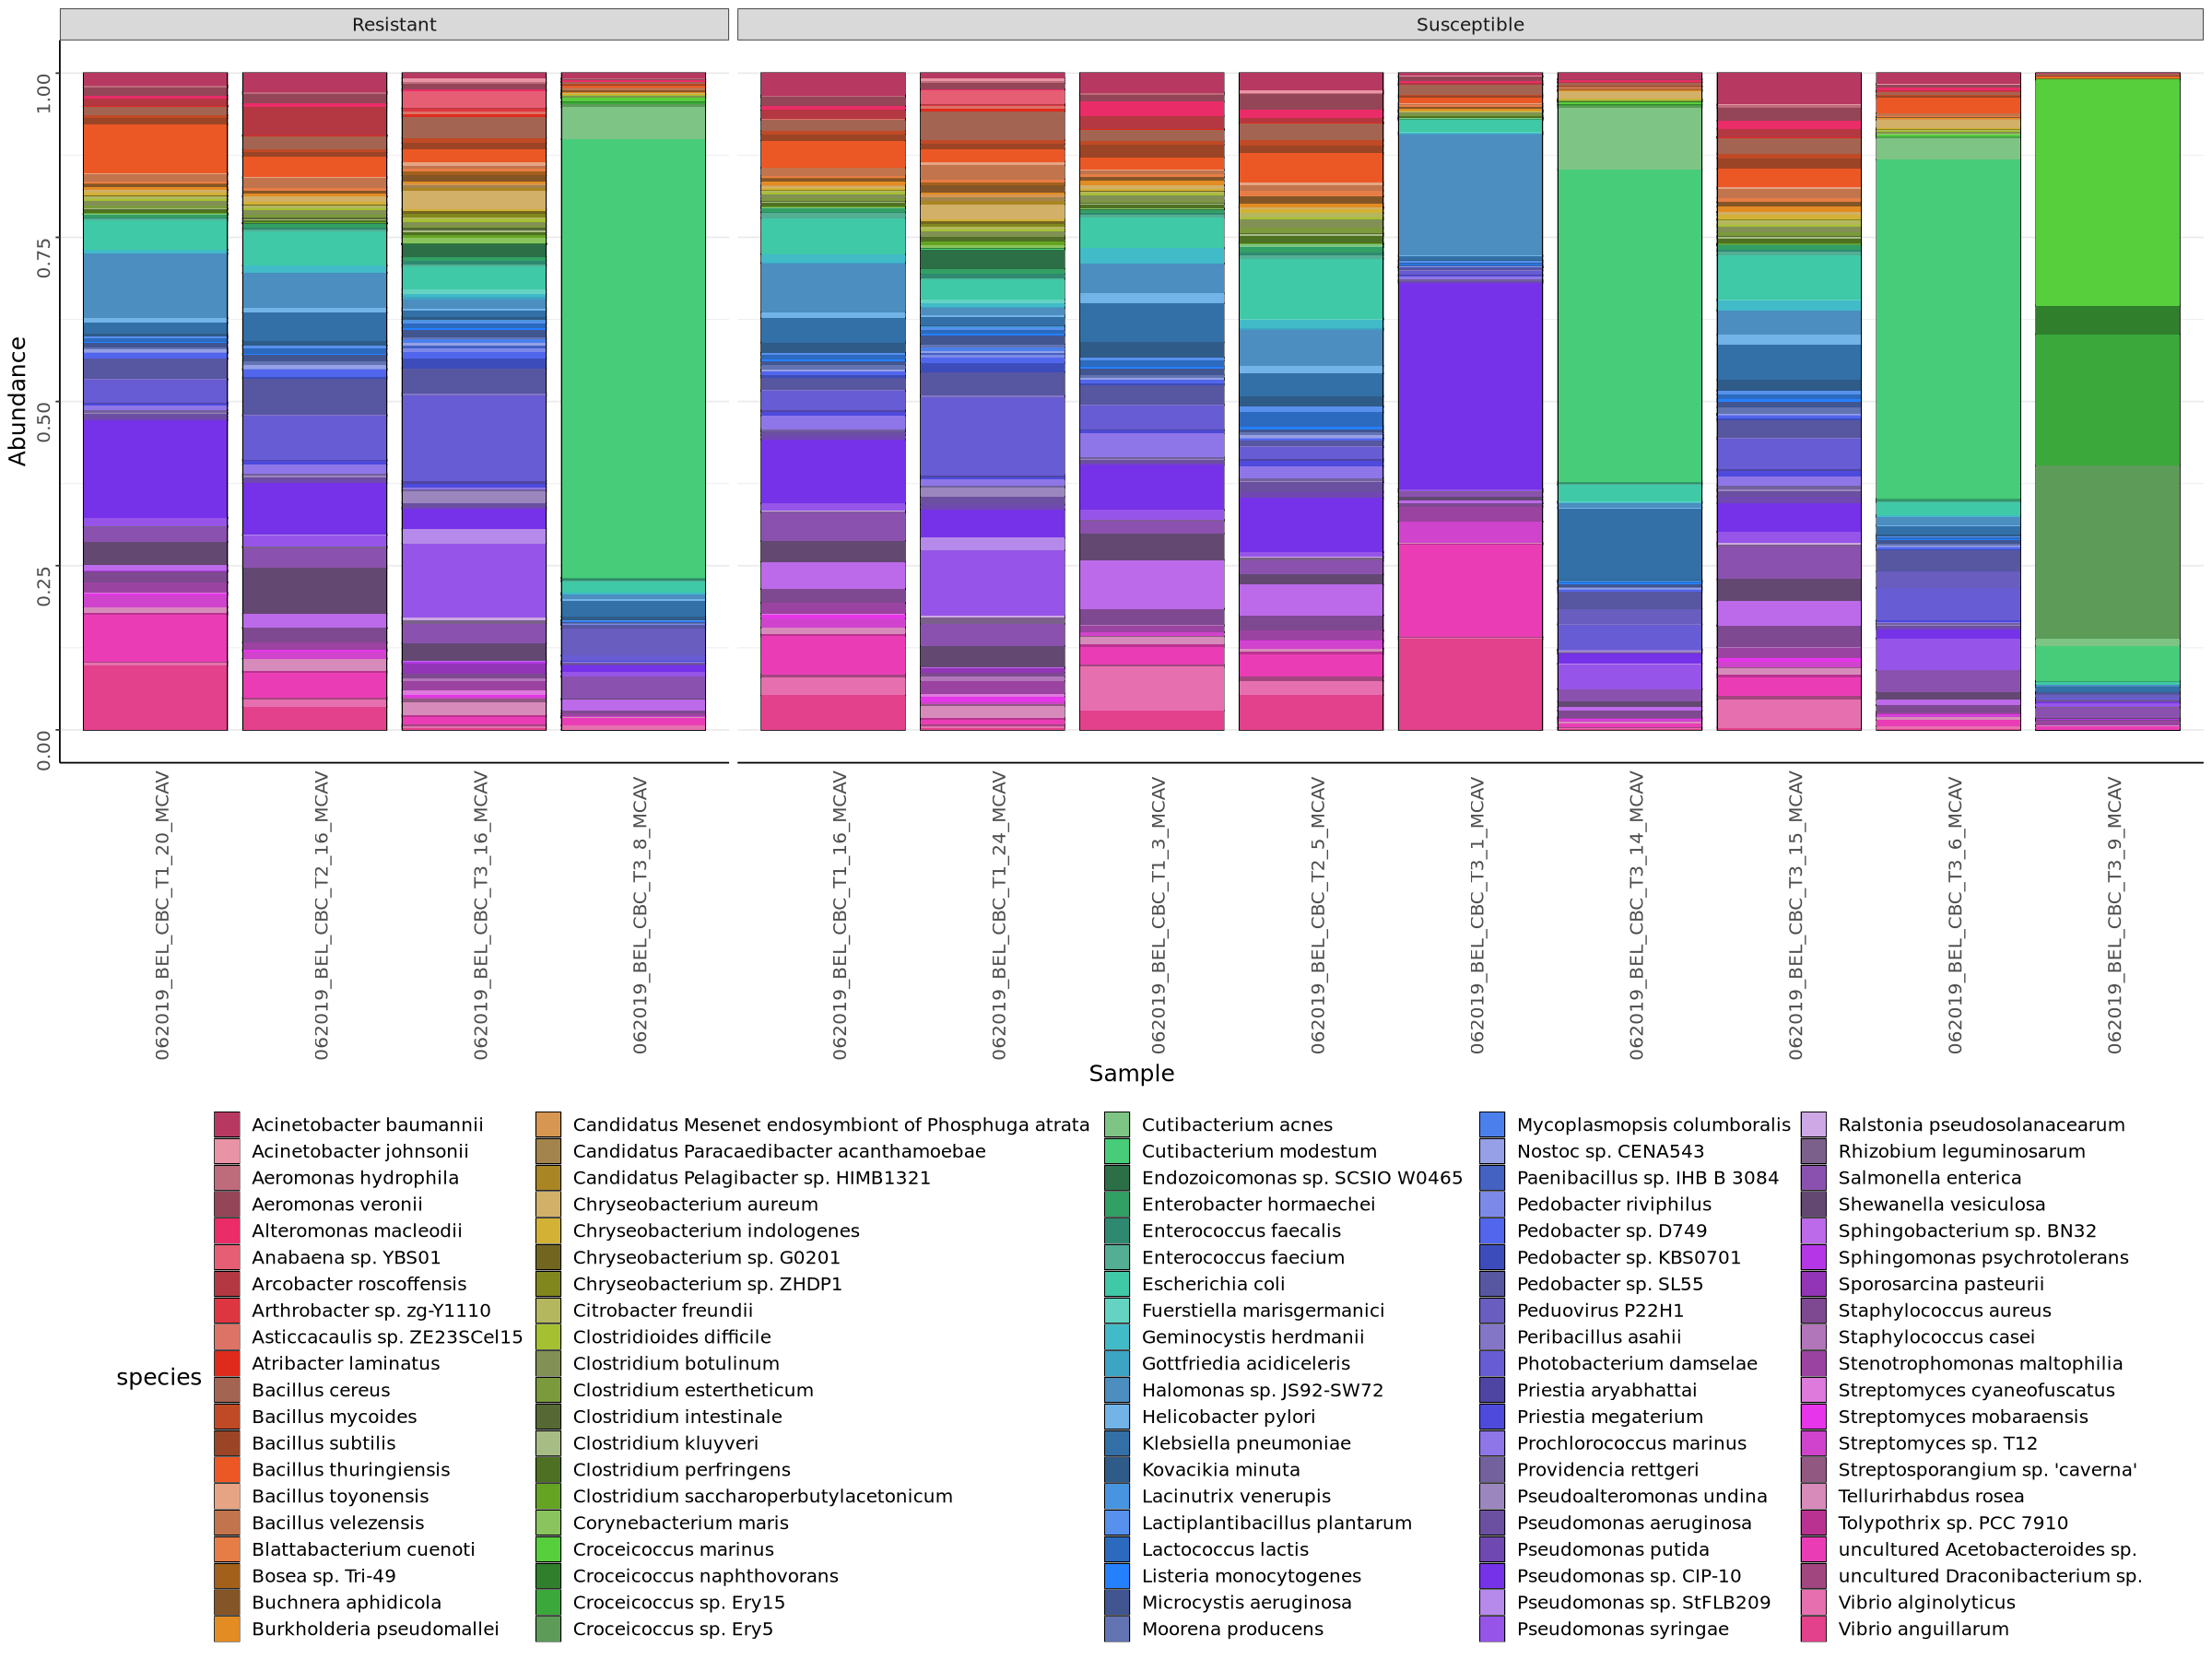

In [208]:
# view bar plot - top 100, healthy,2019 SAMPLES only in mcav 
mcav_bar100<-plot_bar(mh19_Corals_norm,fill='species')+
facet_grid(~RS, scales="free_x", space="free")+
geom_bar(aes(fill=species), stat="identity",position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))
mcav_bar100

In [209]:
ggsave(file="mcav_RS_barplot100.pdf",plot=mcav_bar100, width = 15, height = 20)

In [210]:
mh19_Corals_10 = prune_taxa(names(sort(taxa_sums(mh19_Corals),TRUE)[1:10]), mh19_Corals)
mh19_Corals10_norm <- transform_sample_counts(mh19_Corals_10, function(x) x / sum(x))

In [211]:
mcavcolor<-c("#3b1919",
"#713731",
"#a47164",
"#dca798",
"#5a4b2a",
"#838e63",
"#c2d7af",
"#28452e",
"#4e847d",
"#7bc8d1")

In [212]:
mcavcolor<-c("#732a2e",
"#d06d67",
"#c2a294",
"#885c2e",
"#cda963",
"#383c29",
"#567938",
"#a9d48c",
"#81d7cc",
"#528982")

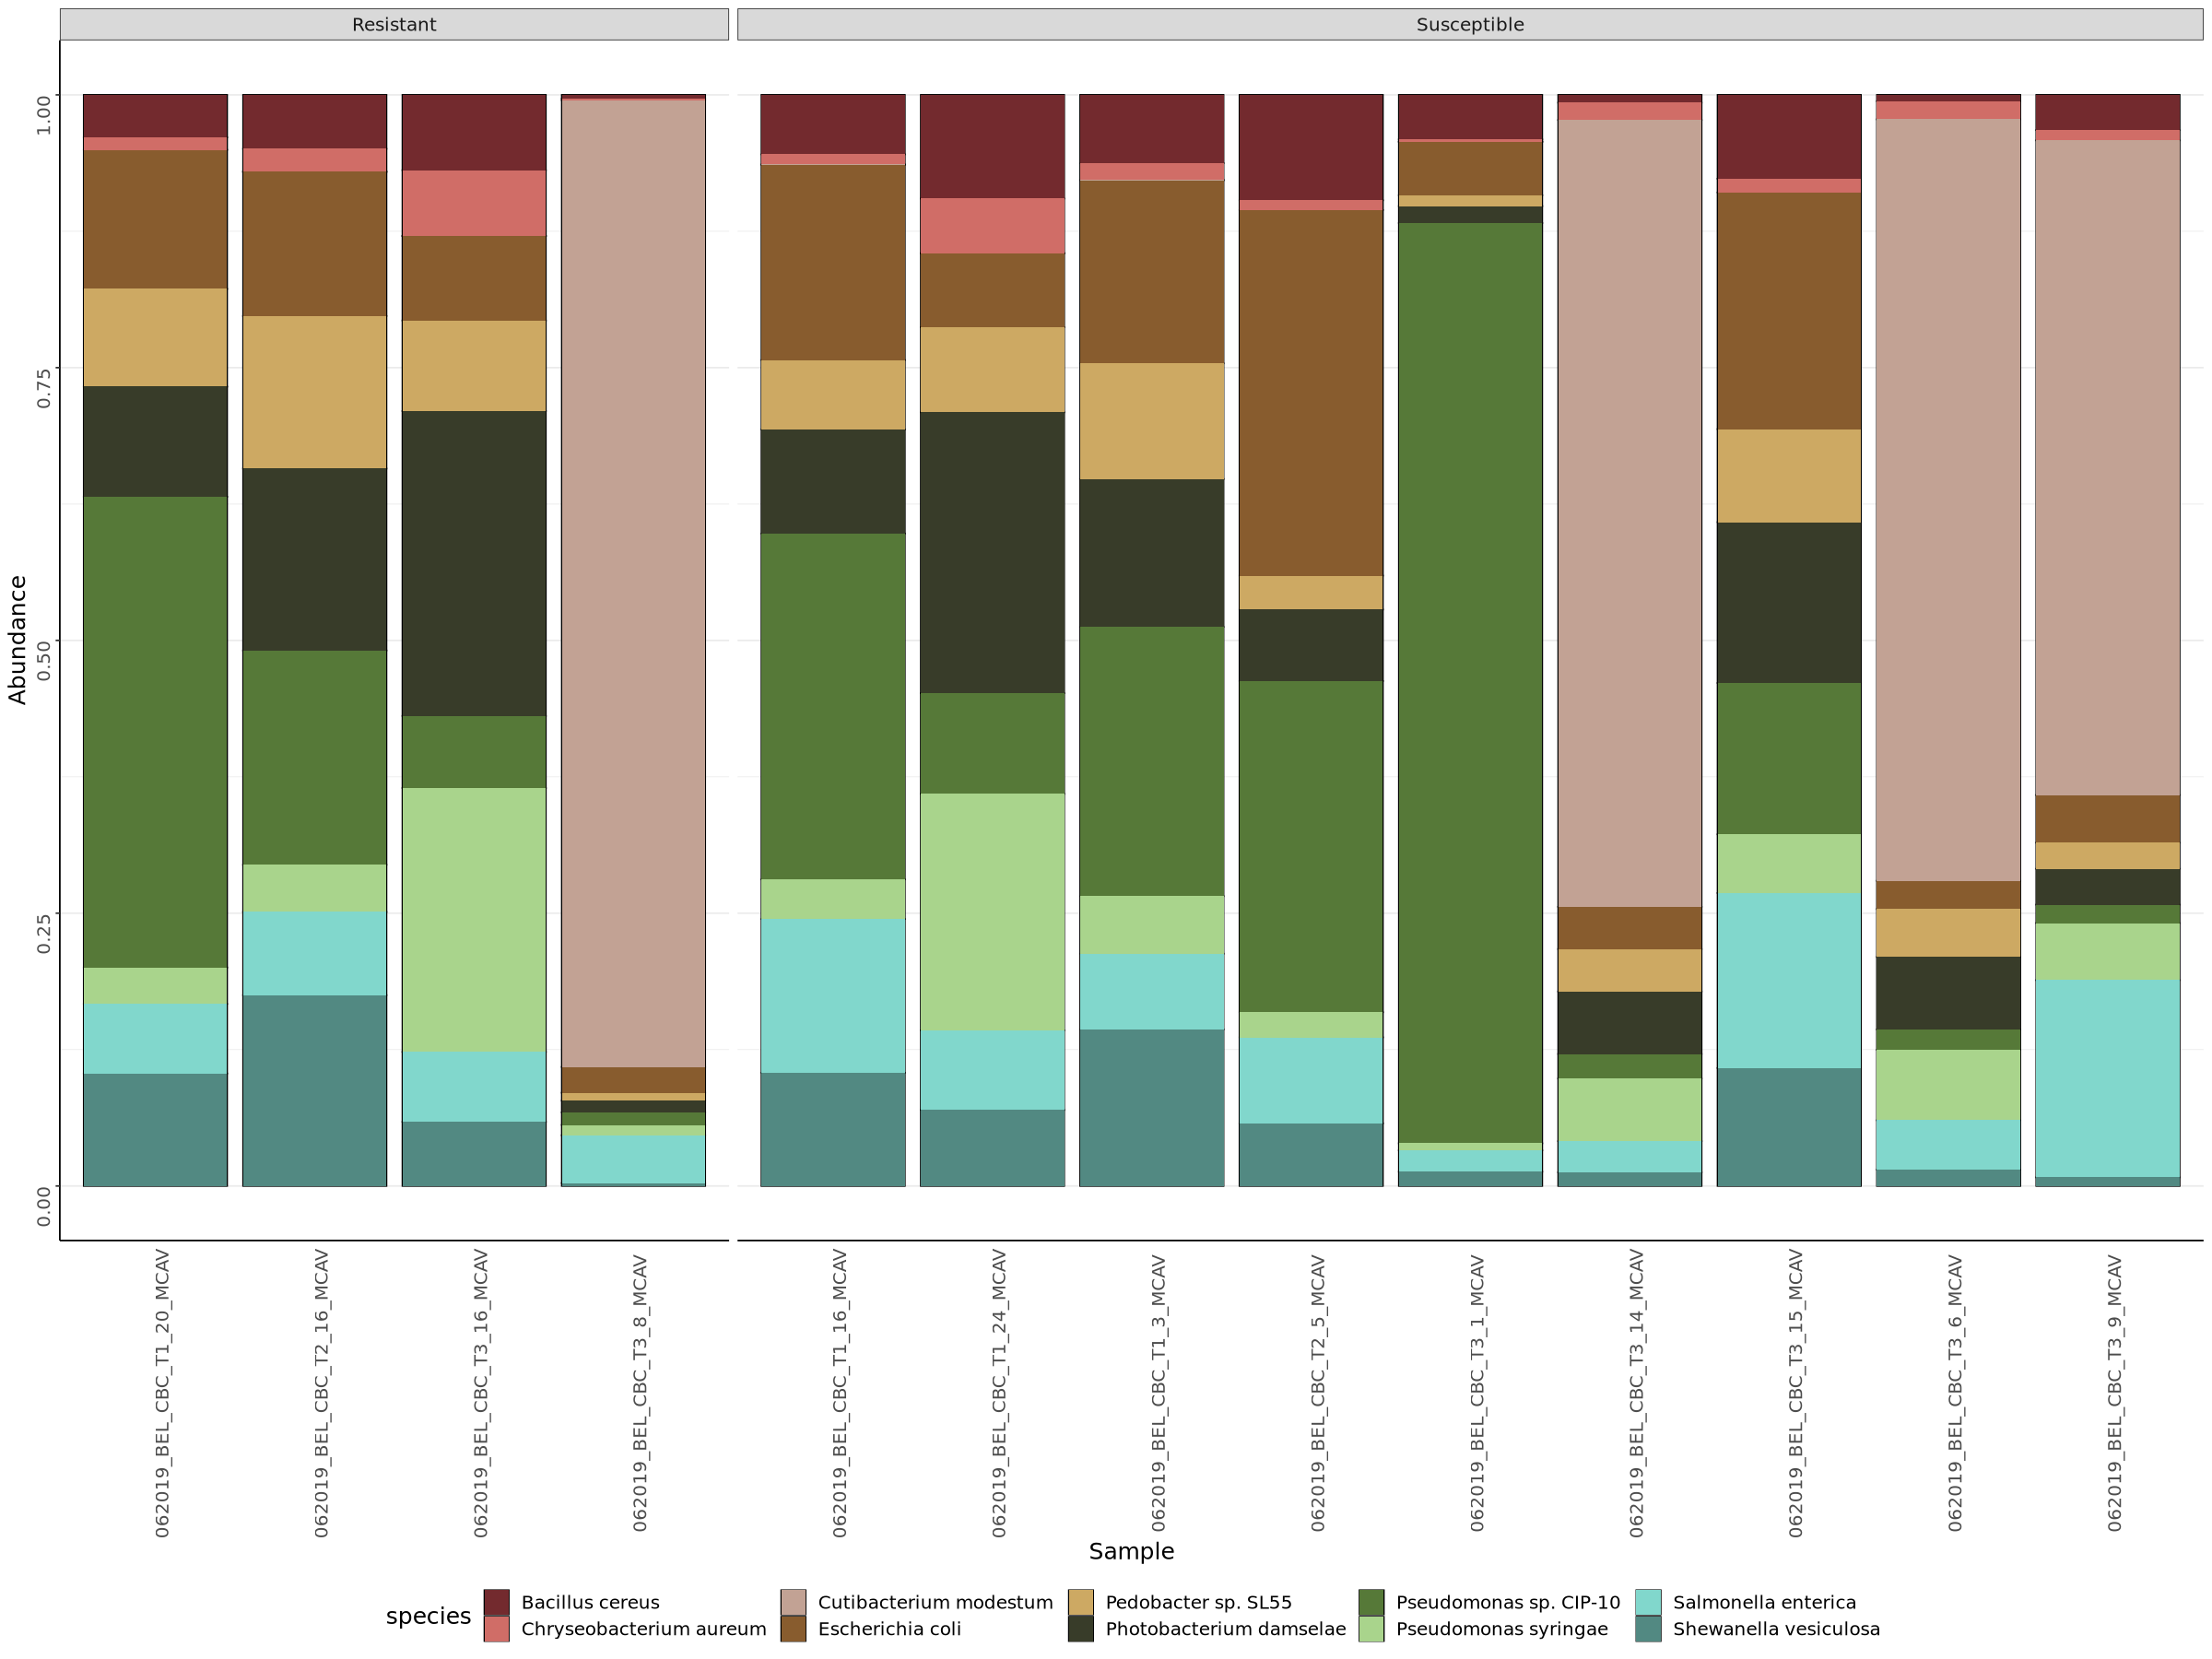

In [213]:
# view bar plot - healthy,2019 SAMPLES only in mcav 
mcav_bar<-plot_bar(mh19_Corals10_norm,fill='species')+
facet_grid(~RS, scales="free_x", space="free")+
geom_bar(aes(fill=species), stat="identity",position="stack")+
scale_fill_manual(values = mcavcolor) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))
mcav_bar

In [214]:
ggsave(file="mcav_RS_barplot10.pdf",plot=mcav_bar,, width = 15, height = 20)

In [215]:
ggsave(file="mcav_RS_barplot.pdf",plot=mcav_bar,, width = 15, height = 20)

In [216]:
# create phyloseq object: raw, 2019,pstr 
pstr_corals19 = phyloseq(OTU_RAW, pstrSamp, TAX)
pstr_corals19

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [217]:
# create phyloseq object: raw, 2019,mcav 
raw_mcav19 = phyloseq(OTU_RAW, mcavSamp, TAX)
raw_mcav19

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [218]:
# create phyloseq object: raw, 2019
raw_corals19 = phyloseq(OTU_RAW, SAMP2019, TAX)
raw_corals19

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 33 samples ]
sample_data() Sample Data:       [ 33 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 25486 taxa by 1 taxonomic ranks ]

In [219]:
rich=estimate_richness(raw_corals)

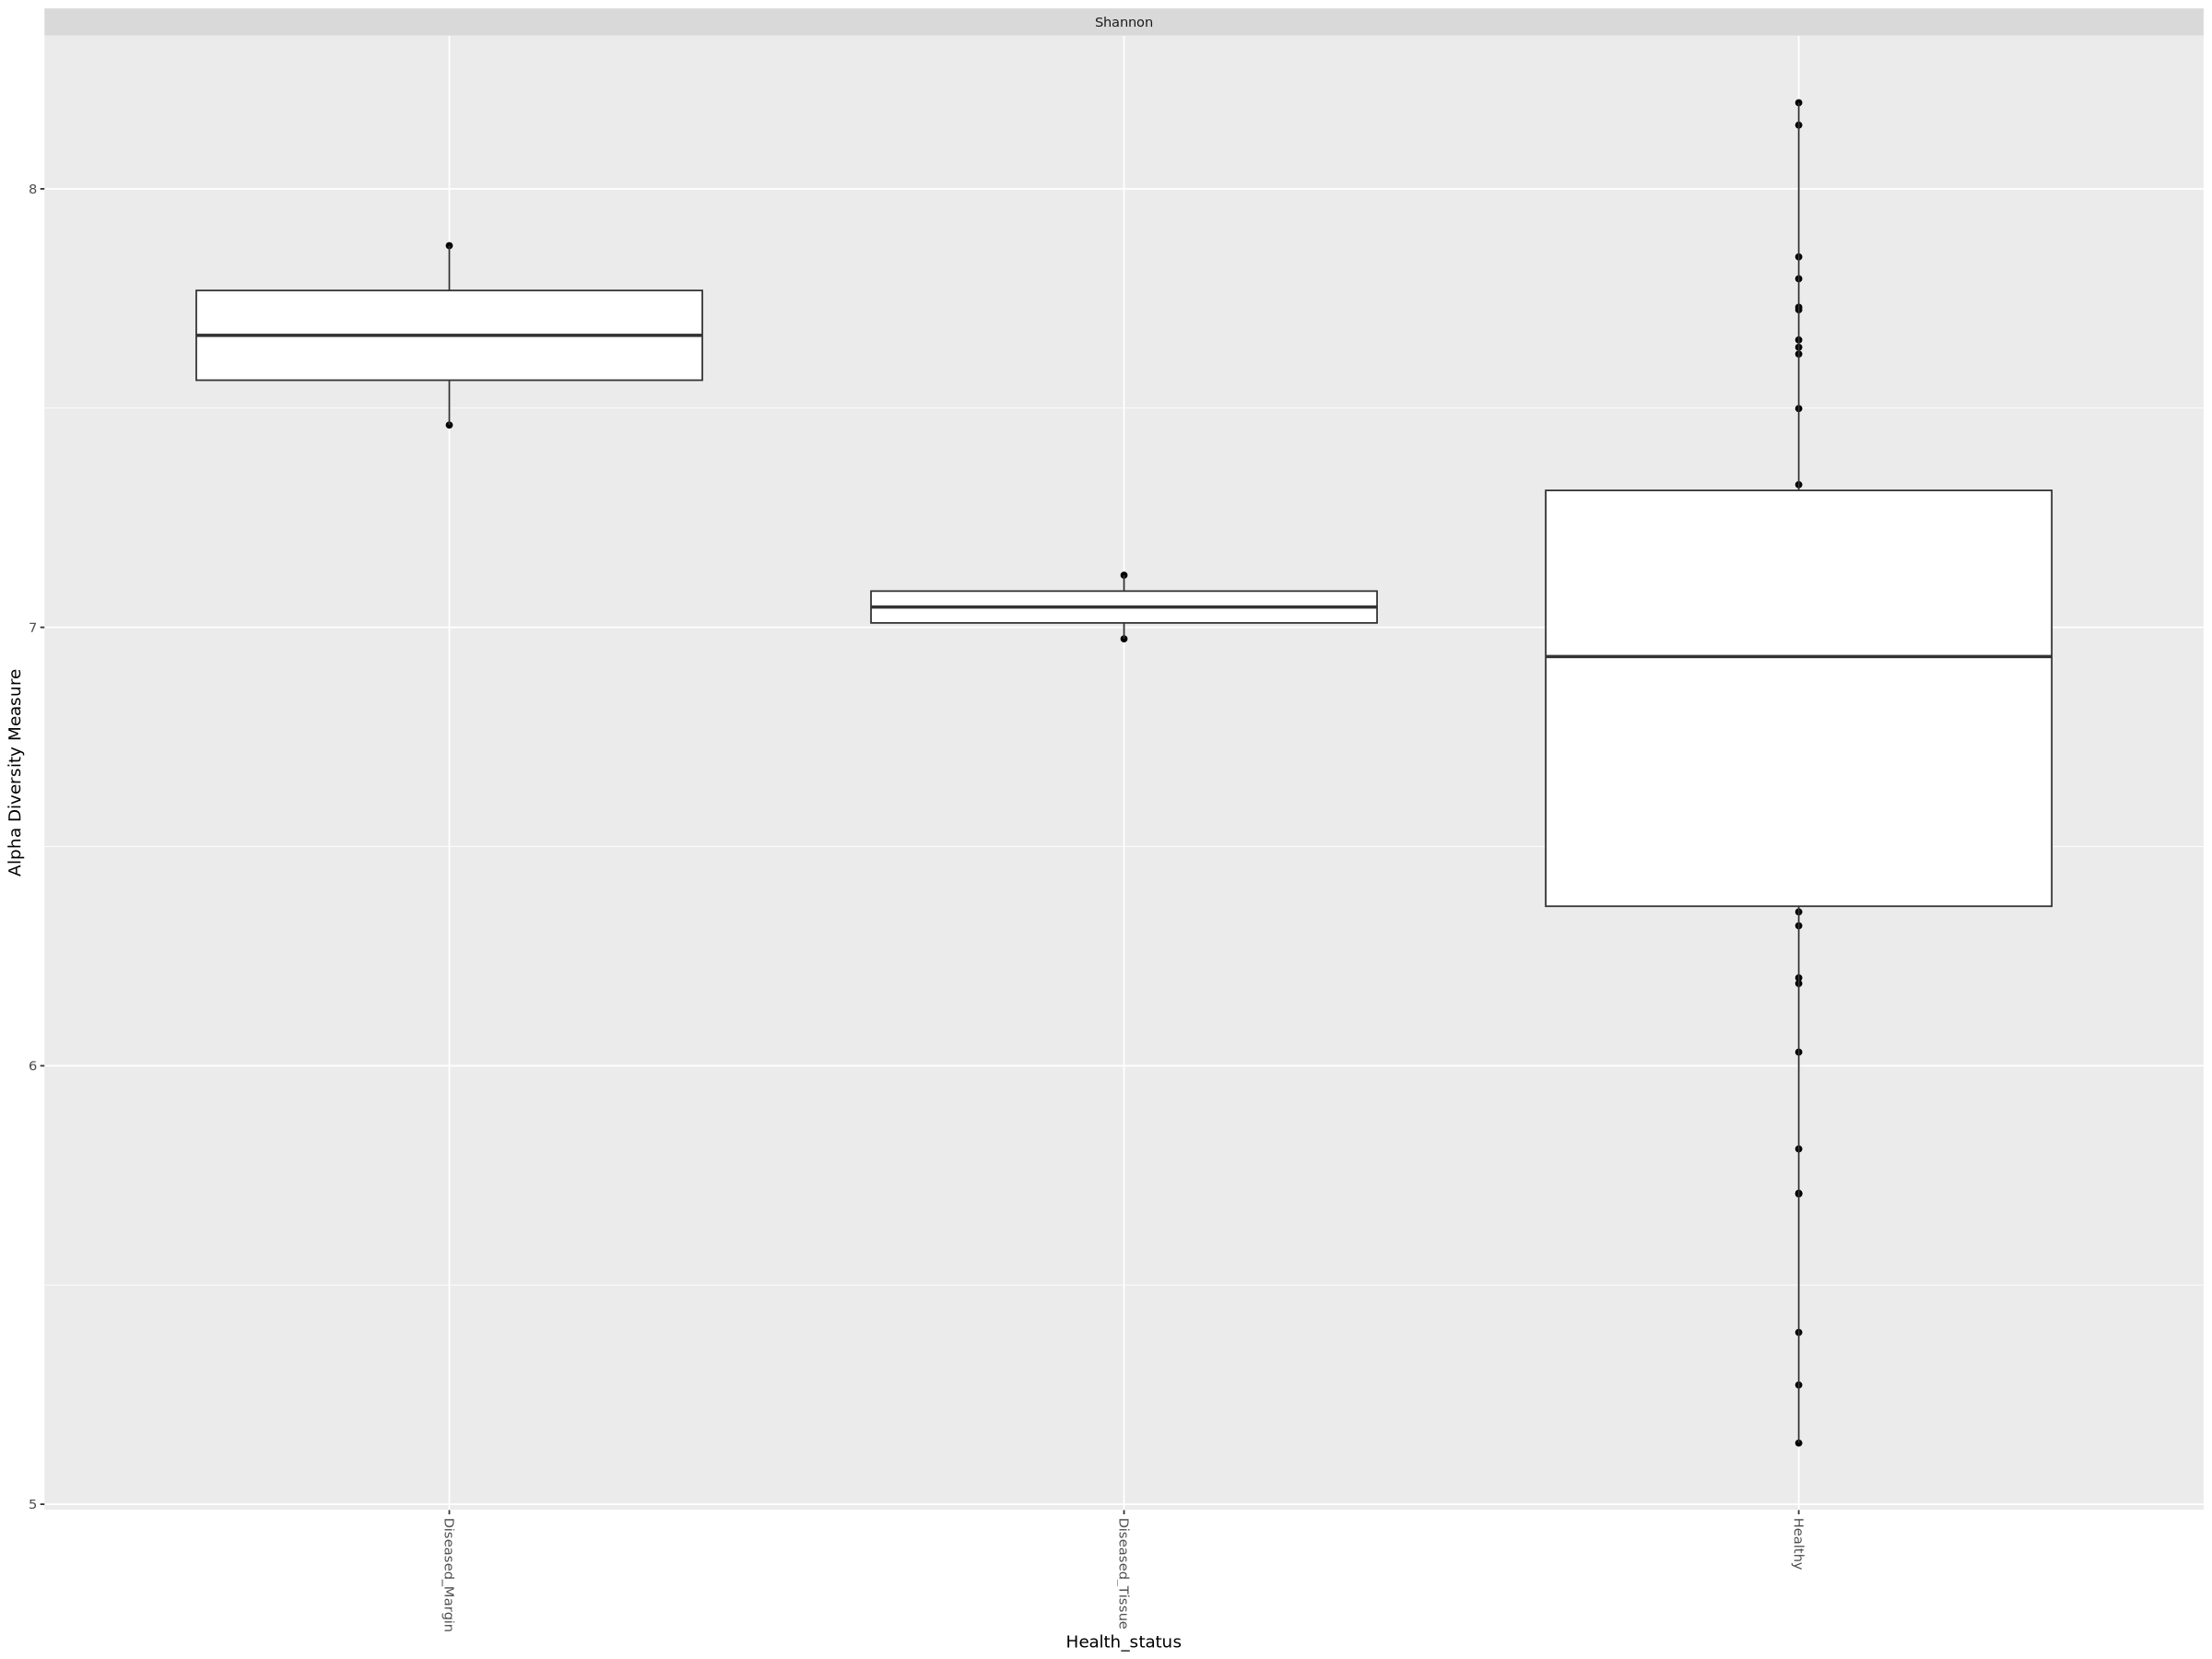

In [220]:
plot_richness(raw_corals, x="Health_status",measures=c("Shannon")) + geom_boxplot()


In [221]:
#ggsave(file="alpha_diversity.pdf", plot=year_alpha,width = 15, height=10)

In [222]:
# significance in shannon diversity between R v S
alpha_results<-pairwise.wilcox.test(rich$Shannon, sample_data(raw_corals)$Health_status,p.adjust.method = "holm")
alpha_results
# no significant differences in alpha diversity 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  rich$Shannon and sample_data(raw_corals)$Health_status 

                Diseased_Margin Diseased_Tissue
Diseased_Tissue 0.67            -              
Healthy         0.31            0.67           

P value adjustment method: holm 

In [223]:
# Subsetting based on condition
#subsetted_data <- rawpstr@sam_data[rawpstr@sam_data$Health_status == "Healthy", ]
#raw_ph <- phyloseq(OTU, subsetted_data, TAX)

### DESeq

In [224]:
# unnormalized, 2019 pstr 
pstr_deseq = phyloseq_to_deseq2(pstr_corals19, ~ RS)
pstr_deseq = DESeq(pstr_deseq, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1692 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [225]:
res = results(pstr_deseq, cooksCutoff = FALSE)
alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab_pstr = cbind(as(sigtab, "data.frame"), as(tax_table(raw_corals19)[rownames(sigtab), ], "matrix"))
res


log2 fold change (MLE): RS Susceptible vs Resistant 
Wald test p-value: RS Susceptible vs Resistant 
DataFrame with 25486 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat    pvalue      padj
         <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
28901   21886.2480      0.7421537  0.501911  1.478656  0.139232  0.998164
1280    23558.6214      0.1779102  0.789561  0.225328  0.821724  0.998164
67376   11883.1012     -0.0516854  0.249088 -0.207498  0.835621  0.998164
2099584  5438.8403      0.1978776  0.272475  0.726223  0.467702  0.998164
1872427    20.1179      0.4898802  0.537637  0.911173  0.362204  0.998164
...            ...            ...       ...       ...       ...       ...
3081203          0             NA        NA        NA        NA        NA
3082951          0             NA        NA        NA        NA        NA
3083256          0             NA        NA        NA        NA        NA
3083257          0             NA        NA  

In [226]:
head(sigtab_pstr)


baseMean   log2FoldChange lfcSE     stat      pvalue       padj        
1428    1458.10976 -1.834746      0.4629059 -3.963540 7.384645e-05 3.452321e-02
28108   2015.58204 -5.925658      0.9145203 -6.479526 9.201133e-11 2.007381e-07
518738    24.36802 -2.784313      0.7156023 -3.890866 9.988699e-05 4.358402e-02
2587860   26.35713 22.137775      3.2571074  6.796759 1.069988e-11 3.501535e-08
160      289.87472 -4.940481      1.2211527 -4.045752 5.215547e-05 3.103251e-02
2742624  530.55046 -7.484292      1.0795391 -6.932859 4.124202e-12 2.699290e-08
        species                  
1428    Bacillus thuringiensis   
28108   Alteromonas macleodii    
518738  Shewanella vesiculosa    
2587860 Vibrio sp. THAF64        
160     Treponema pallidum       
2742624 Citrobacter sp. RHB25-C09

In [227]:
## SIGNIFICANTLY DIFFERENT OTUS between pstr susceptible and resistant colonies (healthy,2019 samples only)

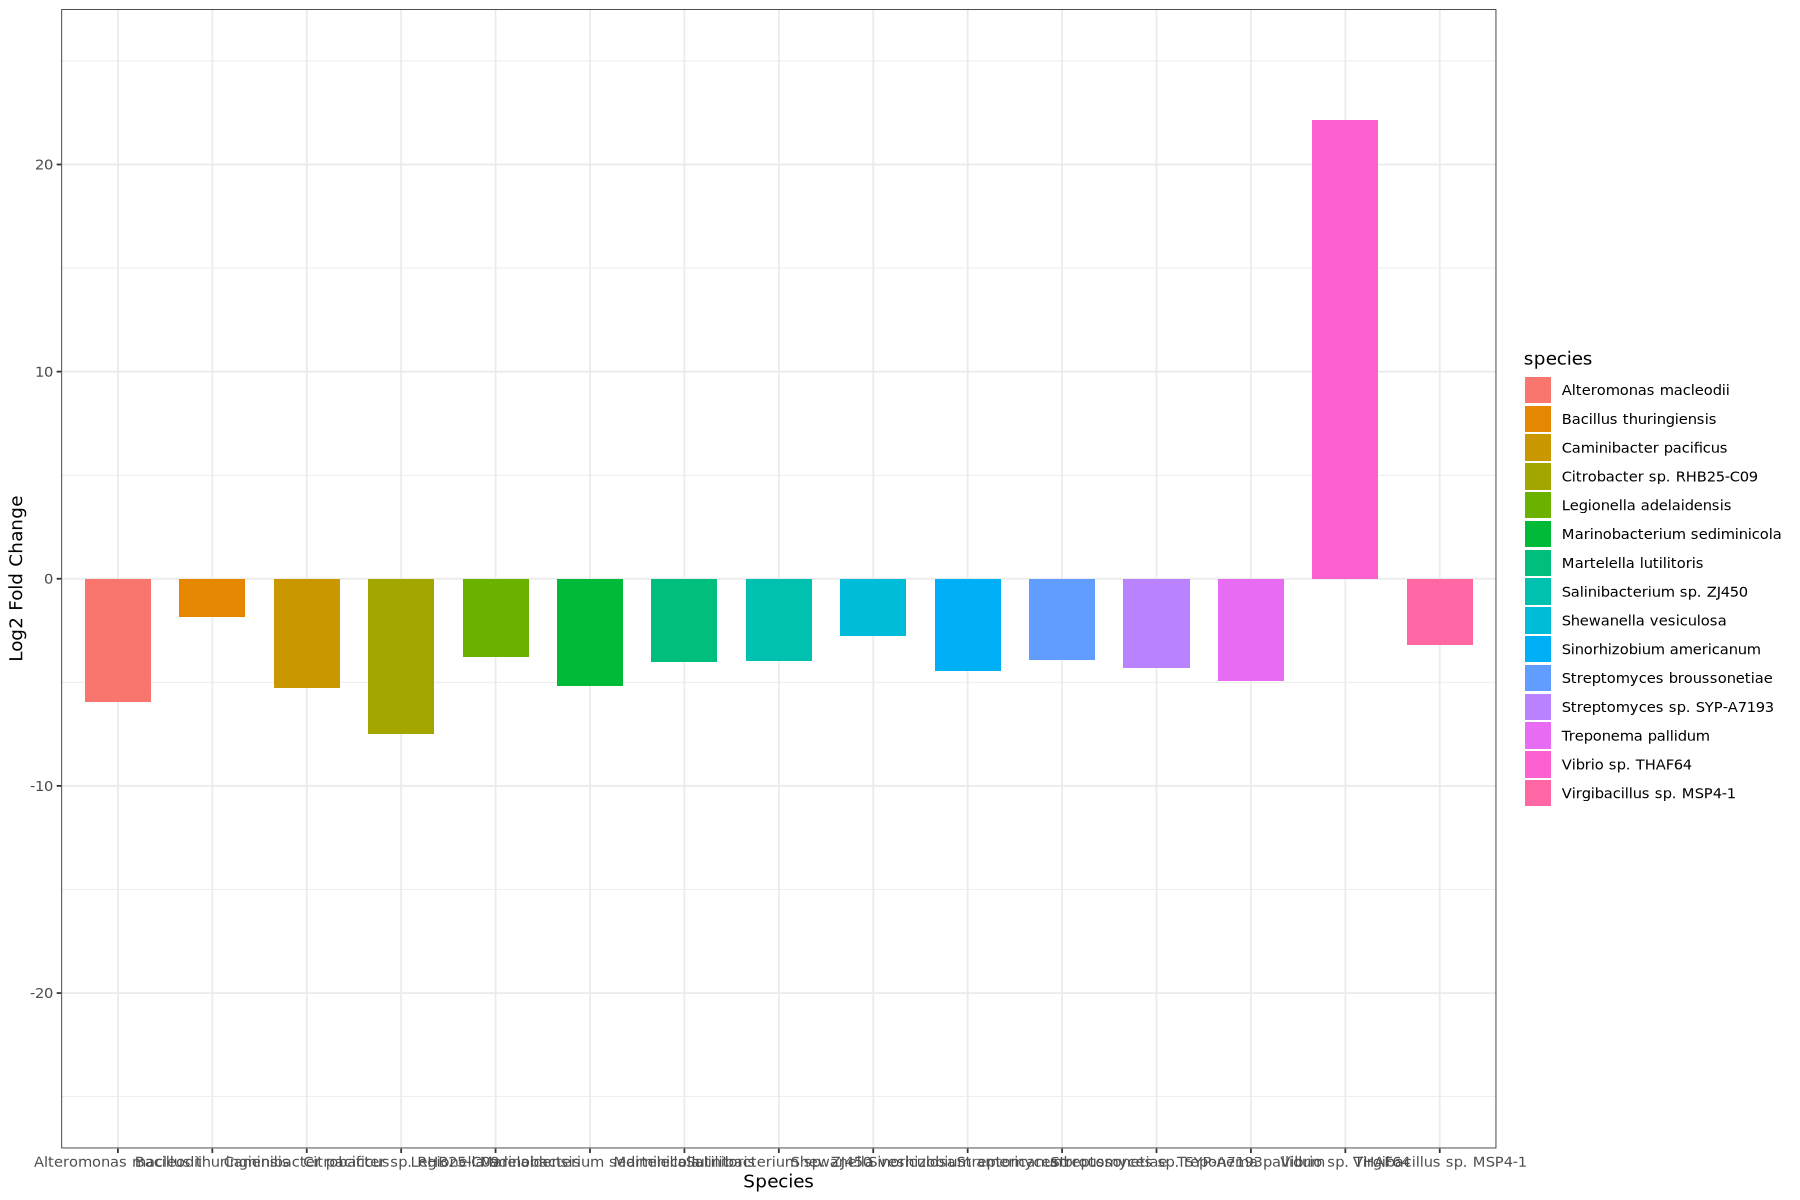

In [265]:
# plot significantly different OTUs
pstr_rs<-ggplot(sigtab_pstr, aes(x=species, y=log2FoldChange, fill=species)) + 
    geom_bar(stat="identity",width = 0.7) + 
    theme(
        #axis.text.x = element_text(angle = 45, hjust = 1, size=16),
        axis.text.x = element_text(size = 18, angle = 45, hjust = 1),  # Larger X-axis tick labels
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16, margin = margin(t = 5)),  # Adjust x-axis title size and margin
        axis.title.y = element_text(size = 16, margin = margin(r = 10)))+ # Adjust axis title size
        ylim (-25, 25)+
  labs(x = "Species", y = "Log2 Fold Change")+
theme_bw()
pstr_rs
# taxa are more abundant in susceptible than resistant colonies 


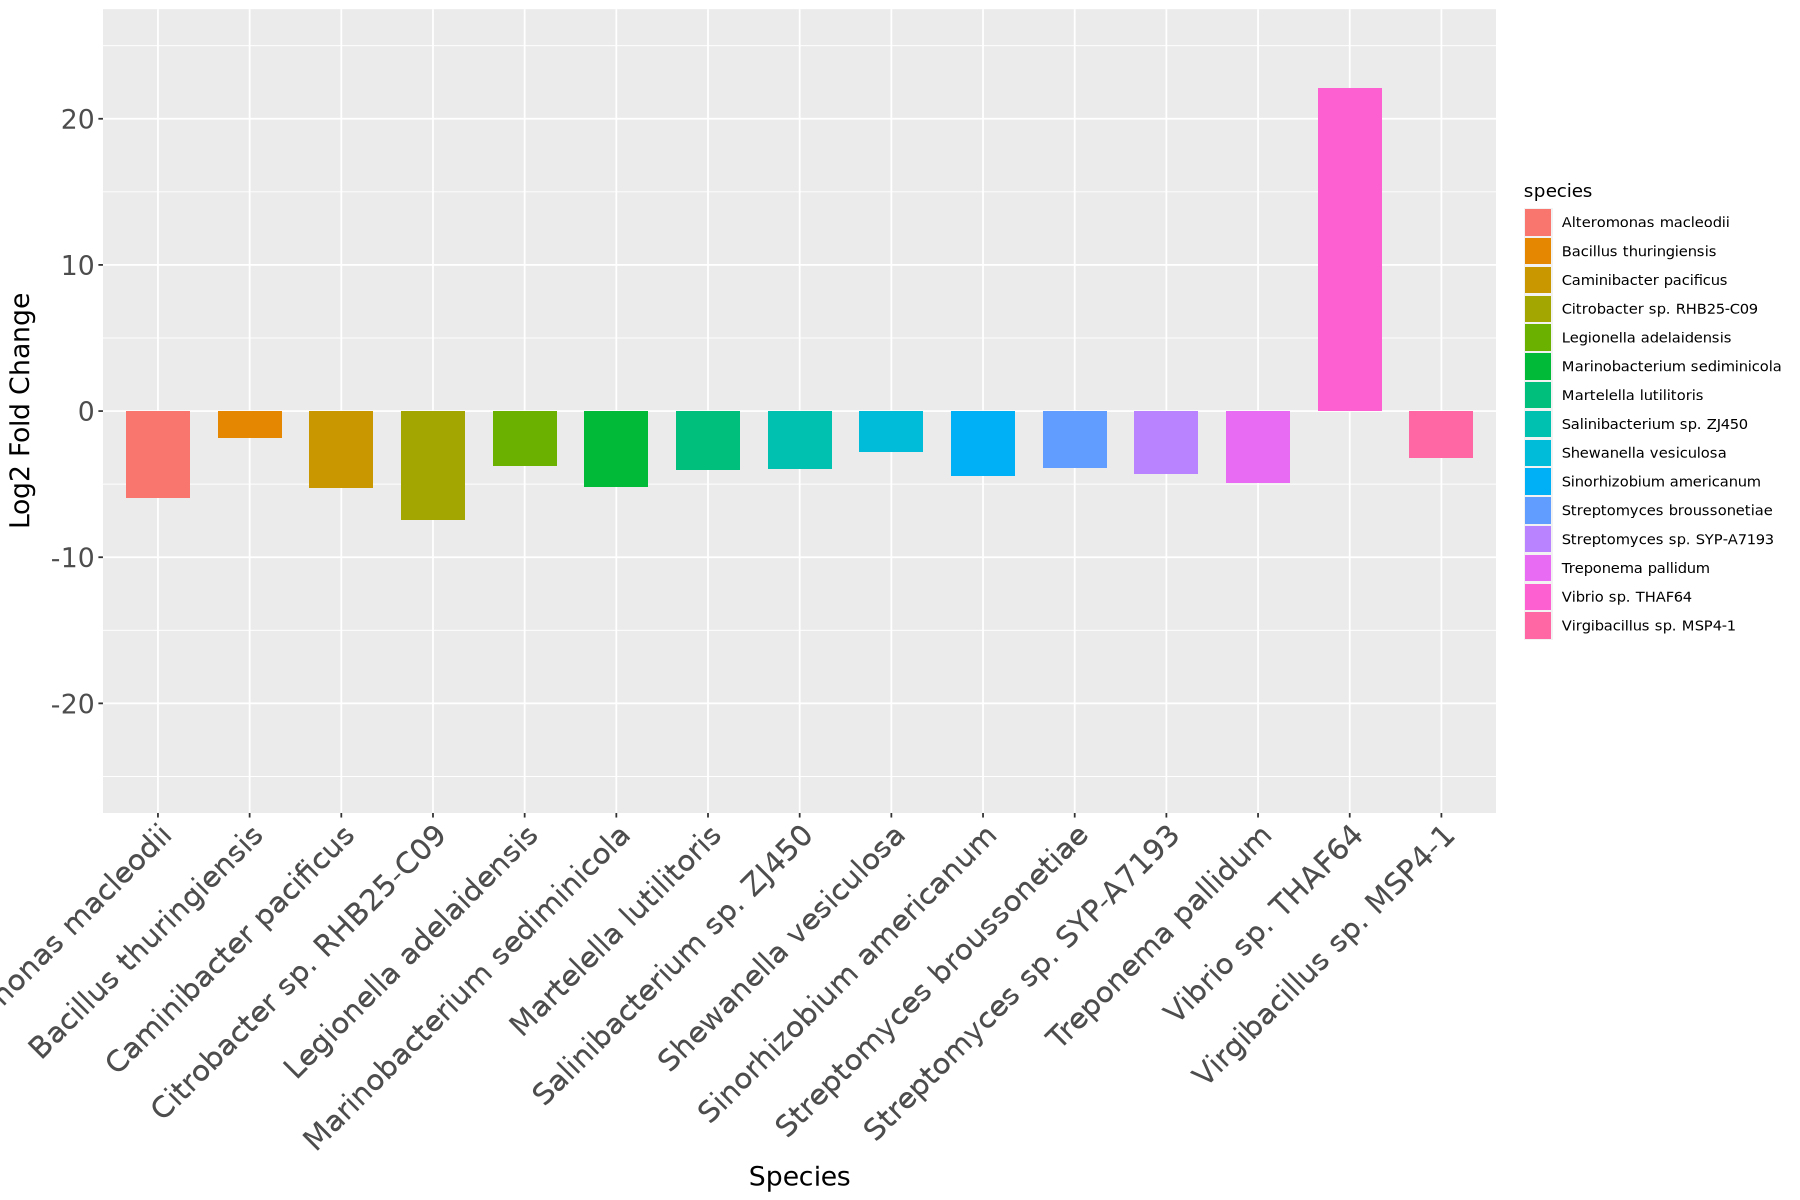

In [269]:
pstr_rs <- ggplot(sigtab_pstr, aes(x = species, y = log2FoldChange, fill = species)) + 
  geom_bar(stat = "identity", width = 0.7) + 
  theme(
    axis.text.x = element_text(size = 18, angle = 45, hjust = 1),  # Adjust X-axis tick labels
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16, margin = margin(t = 5)),  # Adjust x-axis title size and margin
    axis.title.y = element_text(size = 16, margin = margin(r = 10))  # Adjust y-axis title size
  ) + 
  ylim(-25, 25) +  # Remove the space before the parentheses
  labs(x = "Species", y = "Log2 Fold Change") 
pstr_rs

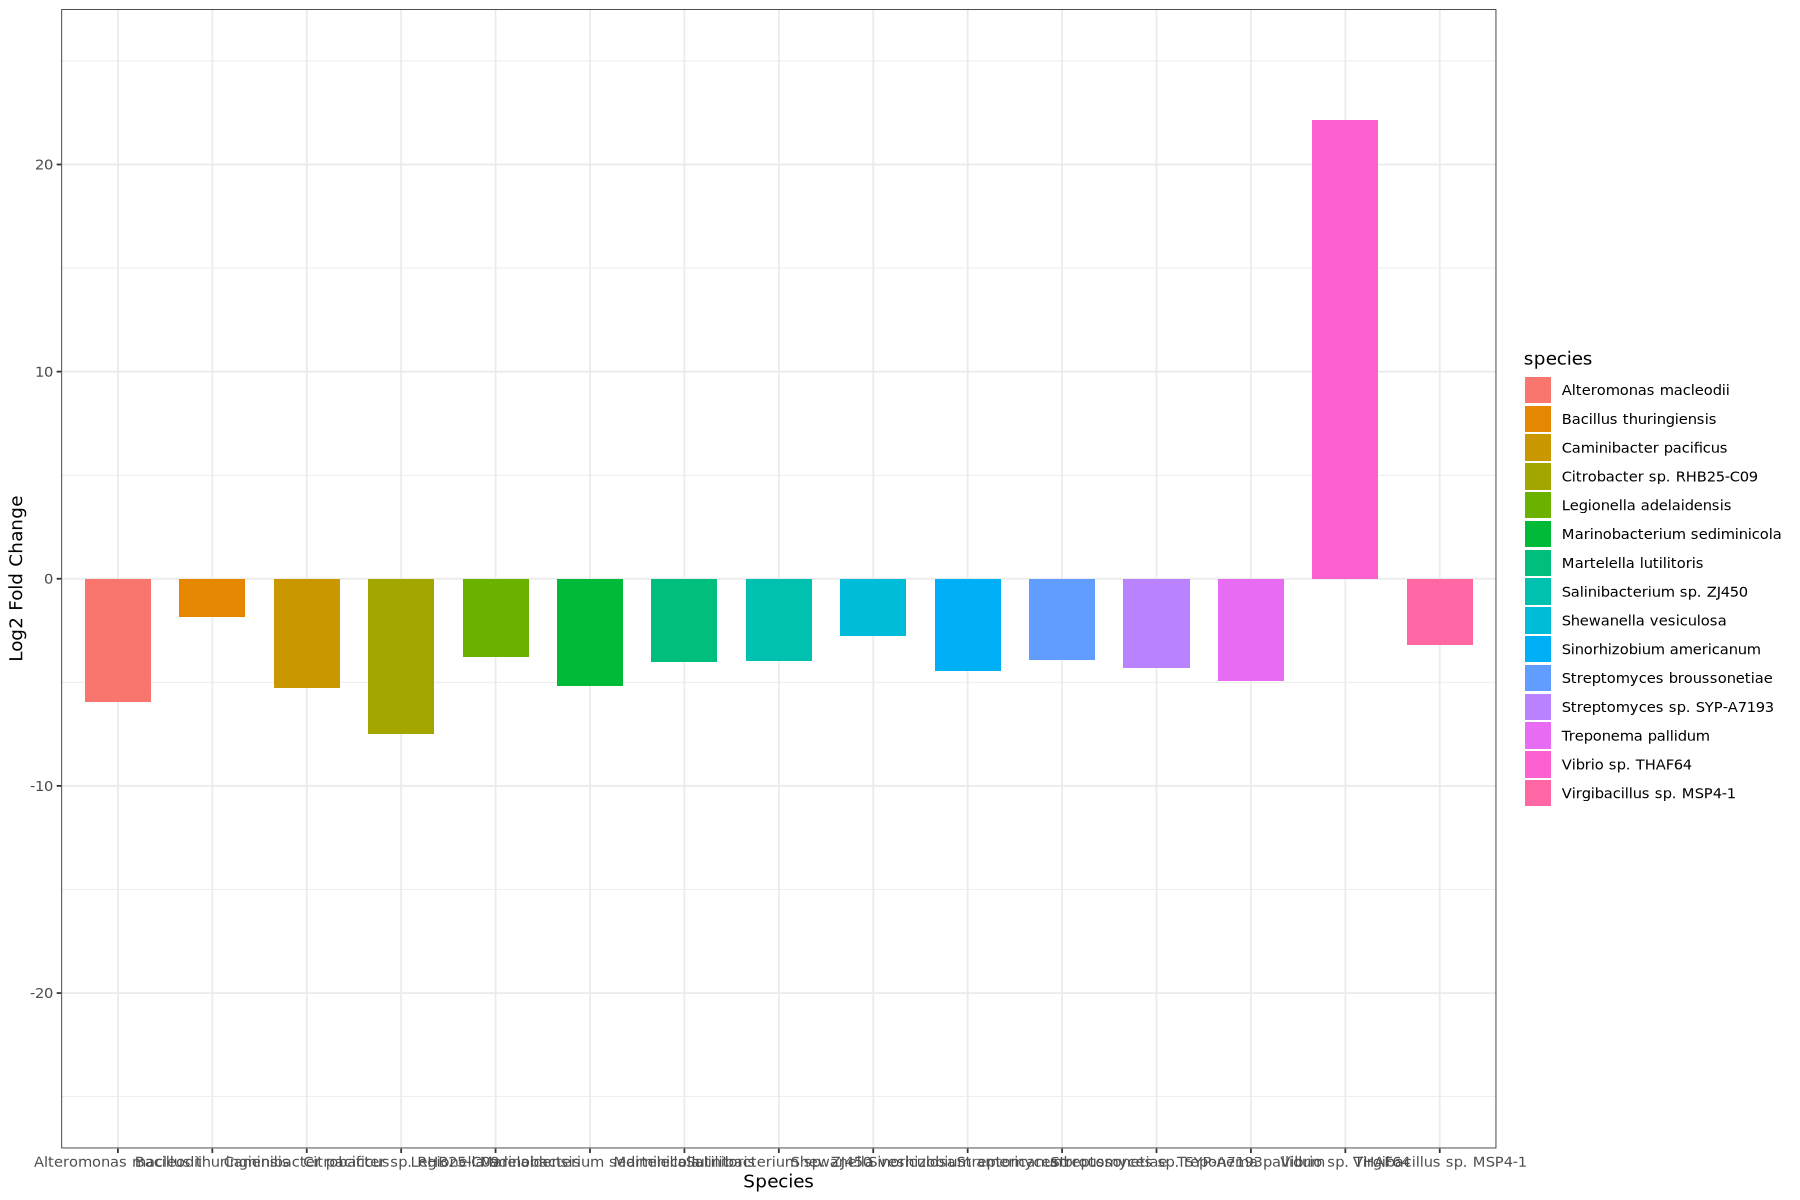

In [267]:
ggsave("pstr_RS_DESeq.pdf",pstr_rs,width = 15, height = 10)

In [230]:
# repeat with just mcav 
mcav_deseq = phyloseq_to_deseq2(raw_mcav19, ~ RS)
mcav_deseq = DESeq(mcav_deseq, test="Wald", fitType="parametric")
res = results(mcav_deseq, cooksCutoff = FALSE)
alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab_mcav = cbind(as(sigtab, "data.frame"), as(tax_table(raw_mcav19)[rownames(sigtab), ], "matrix"))
res
head(sigtab_mcav)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1553 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): RS Susceptible vs Resistant 
Wald test p-value: RS Susceptible vs Resistant 
DataFrame with 25486 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat    pvalue      padj
        <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
28901   1618.0375       0.102715  0.759997  0.135152  0.892492  0.998157
1280     515.2953       0.290110  0.417984  0.694070  0.487638  0.998157
67376    250.5019       0.602055  3.086067  0.195088  0.845324  0.998157
2099584  377.5699       1.084771  3.126314  0.346981  0.728606  0.998157
1872427   19.8272       0.639972  0.638313  1.002600  0.316054  0.998157
...           ...            ...       ...       ...       ...       ...
3081203         0             NA        NA        NA        NA        NA
3082951         0             NA        NA        NA        NA        NA
3083256         0             NA        NA        NA        NA        NA
3083257         0             NA        NA        NA    

baseMean  log2FoldChange lfcSE    stat      pvalue       padj        
2918516 81.300323  -5.179655     1.144973 -4.523824 6.073218e-06 4.786303e-03
1474    58.919385  -5.959903     1.397471 -4.264778 2.001015e-05 1.433636e-02
2734085 10.471924 -23.304207     3.201265 -7.279687 3.345951e-13 8.789814e-10
1930546  5.045259 -22.317520     3.203767 -6.966024 3.260236e-12 3.184751e-09
2077147  6.825152 -22.727812     3.202510 -7.096874 1.276107e-12 1.676166e-09
2954728  4.583558 -22.102347     2.945409 -7.504001 6.189899e-14 2.439130e-10
        species                                
2918516 Endozoicomonas sp. SCSIO W0465         
1474    Sporosarcina pasteurii                 
2734085 Atlauavirus tusconc8                   
1930546 Sporosarcina sp. P37                   
2077147 Citrobacter freundii complex sp. CFNIH3
2954728 Paenibacillus sp. FSL E2-0274

In [231]:
install.packages("dplyr")
library(dplyr)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [232]:
# sort by most significant 
sorted_sigtab <- sigtab_mcav %>%
  arrange(padj)
sorted_sigtab
# for heatmap, row = species
# col = sample 
# color/intesnity = log2foldchange


baseMean  log2FoldChange lfcSE    stat      pvalue       padj        
2954728  4.583558 -22.102347     2.945409 -7.504001 6.189899e-14 2.439130e-10
3066294  4.509953 -22.169223     2.946771 -7.523225 5.344152e-14 2.439130e-10
2734085 10.471924 -23.304207     3.201265 -7.279687 3.345951e-13 8.789814e-10
1160795  8.544501 -22.998373     3.201800 -7.182951 6.822261e-13 1.344156e-09
2077147  6.825152 -22.727812     3.202510 -7.096874 1.276107e-12 1.676166e-09
2937284  4.469805 -20.920219     2.947546 -7.097503 1.270313e-12 1.676166e-09
2989769  6.142636 -22.580808     3.202907 -7.050098 1.787921e-12 2.012944e-09
1930546  5.045259 -22.317520     3.203767 -6.966024 3.260236e-12 3.184751e-09
2986839  4.871285 -22.269352     3.203939 -6.950616 3.636944e-12 3.184751e-09
2918516 81.300323  -5.179655     1.144973 -4.523824 6.073218e-06 4.786303e-03
1474    58.919385  -5.959903     1.397471 -4.264778 2.001015e-05 1.433636e-02
2072413 25.636139   5.087970     1.273301  3.995889 6.445191e-05 4.232879e-02
        species                                    
2954728 Paenibacillus sp. FSL E2-0274              
3066294 Spiroplasma endosymbiont of Thecophora atra
2734085 Atlauavirus tusconc8                       
1160795 Flavobacterium sp. HJ-32-4                 
2077147 Citrobacter freundii complex sp. CFNIH3    
2937284 Thermosynechococcus sp. B0                 
2989769 Staphylococcus sp. IVB6233                 
1930546 Sporosarcina sp. P37                       
2986839 Flavobacterium sp. N503310                 
2918516 Endozoicomonas sp. SCSIO W0465             
1474    Sporosarcina pasteurii                     
2072413 Stenotrophomonas sp. SAU14A_NAIMI4_5

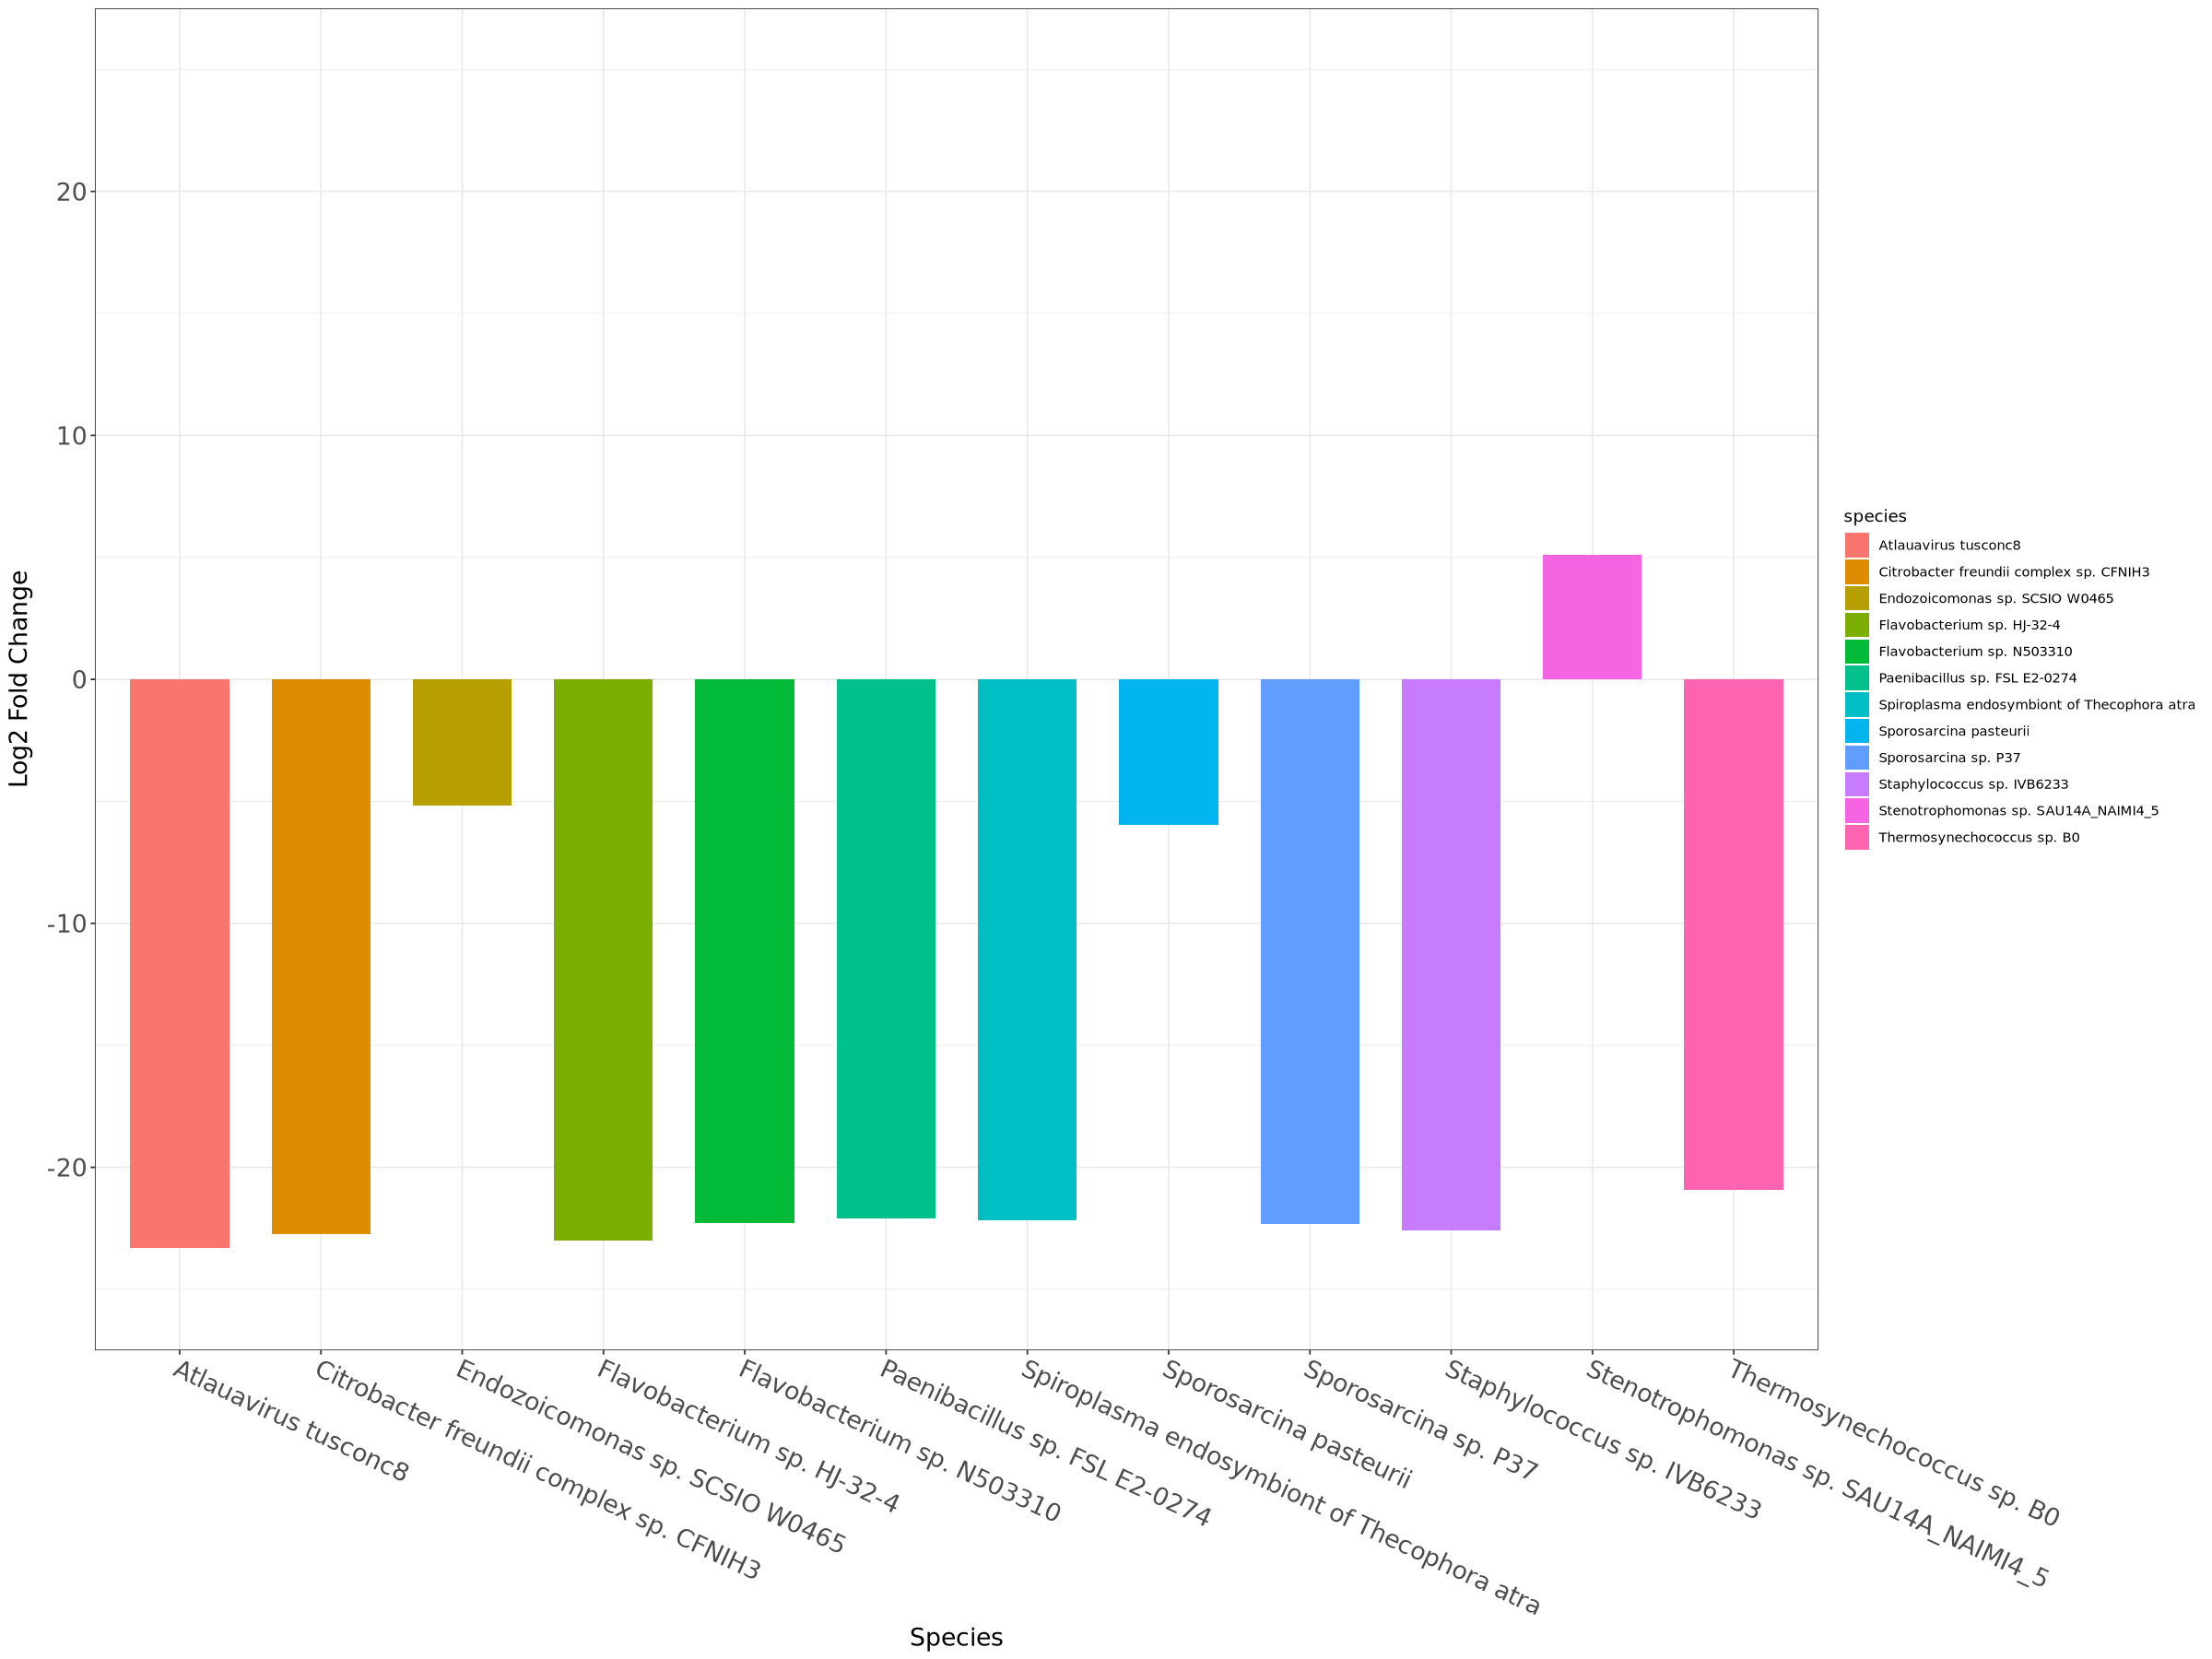

In [233]:
# plot significantly different OTUs
deseq_mcav <- ggplot(sorted_sigtab, aes(x = species, y = log2FoldChange, fill = species)) +
  geom_bar(stat = "identity", width = 0.7) +
theme_bw()+
  theme(
    axis.text.x = element_text(angle = -25, hjust = 0, vjust = 1, size = 16),  # Adjust text size
    axis.text.y = element_text(size = 16),  # Adjust y-axis text size
    axis.title.x = element_text(size = 16, margin = margin(t = 5)),  # Adjust x-axis title size and margin
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Adjust y-axis title size and add margin
  ) +
ylim(-25,25)+
  labs(x = "Species", y = "Log2 Fold Change")

# Add labels
deseq_mcav
# taxa are more abundant in susceptible than resistant colonies 
# across mcav and pstr, just export info on taxa that are more abundant in resistant colonies (neg logchange here)


In [234]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/pstr/taxonomy/figures"

In [235]:
ggsave("mcav_RS_DESeq.pdf",deseq_mcav,width = 15, height = 10)


In [236]:
# combining results since pstr only has 1 sig diff taxa 
raw_ds = phyloseq_to_deseq2(raw_corals19, ~ RS)
raw_ds = DESeq(raw_ds, test="Wald", fitType="parametric")
res = results(raw_ds, cooksCutoff = FALSE)
alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(raw_corals19)[rownames(sigtab), ], "matrix"))
res
head(sigtab)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1870 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): RS Susceptible vs Resistant 
Wald test p-value: RS Susceptible vs Resistant 
DataFrame with 25486 rows and 6 columns
          baseMean log2FoldChange     lfcSE        stat    pvalue      padj
         <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
28901   11287.8290     0.72280051  0.587981  1.22929330  0.218962    0.9996
1280     9815.7721     1.29559534  0.702679  1.84379500  0.065213    0.9996
67376    5757.3612    -0.00669857  1.099468 -0.00609256  0.995139    0.9996
2099584  4111.5178     1.00140446  1.128936  0.88703424  0.375060    0.9996
1872427    20.9649     0.61001421  0.426948  1.42877964  0.153068    0.9996
...            ...            ...       ...         ...       ...       ...
3081203          0             NA        NA          NA        NA        NA
3082951          0             NA        NA          NA        NA        NA
3083256          0             NA        NA          NA        NA        NA
3083257          0     

baseMean  log2FoldChange lfcSE     stat     pvalue       padj      
2589990 305.39579 5.414387       1.1163764 4.849965 1.234830e-06 0.01354312
2072412  26.76995 3.752391       0.7884331 4.759302 1.942641e-06 0.01354312
        species                             
2589990 Vibrio sp. Scap24                   
2072412 Stenotrophomonas sp. ZAC14A_NAIMI4_1

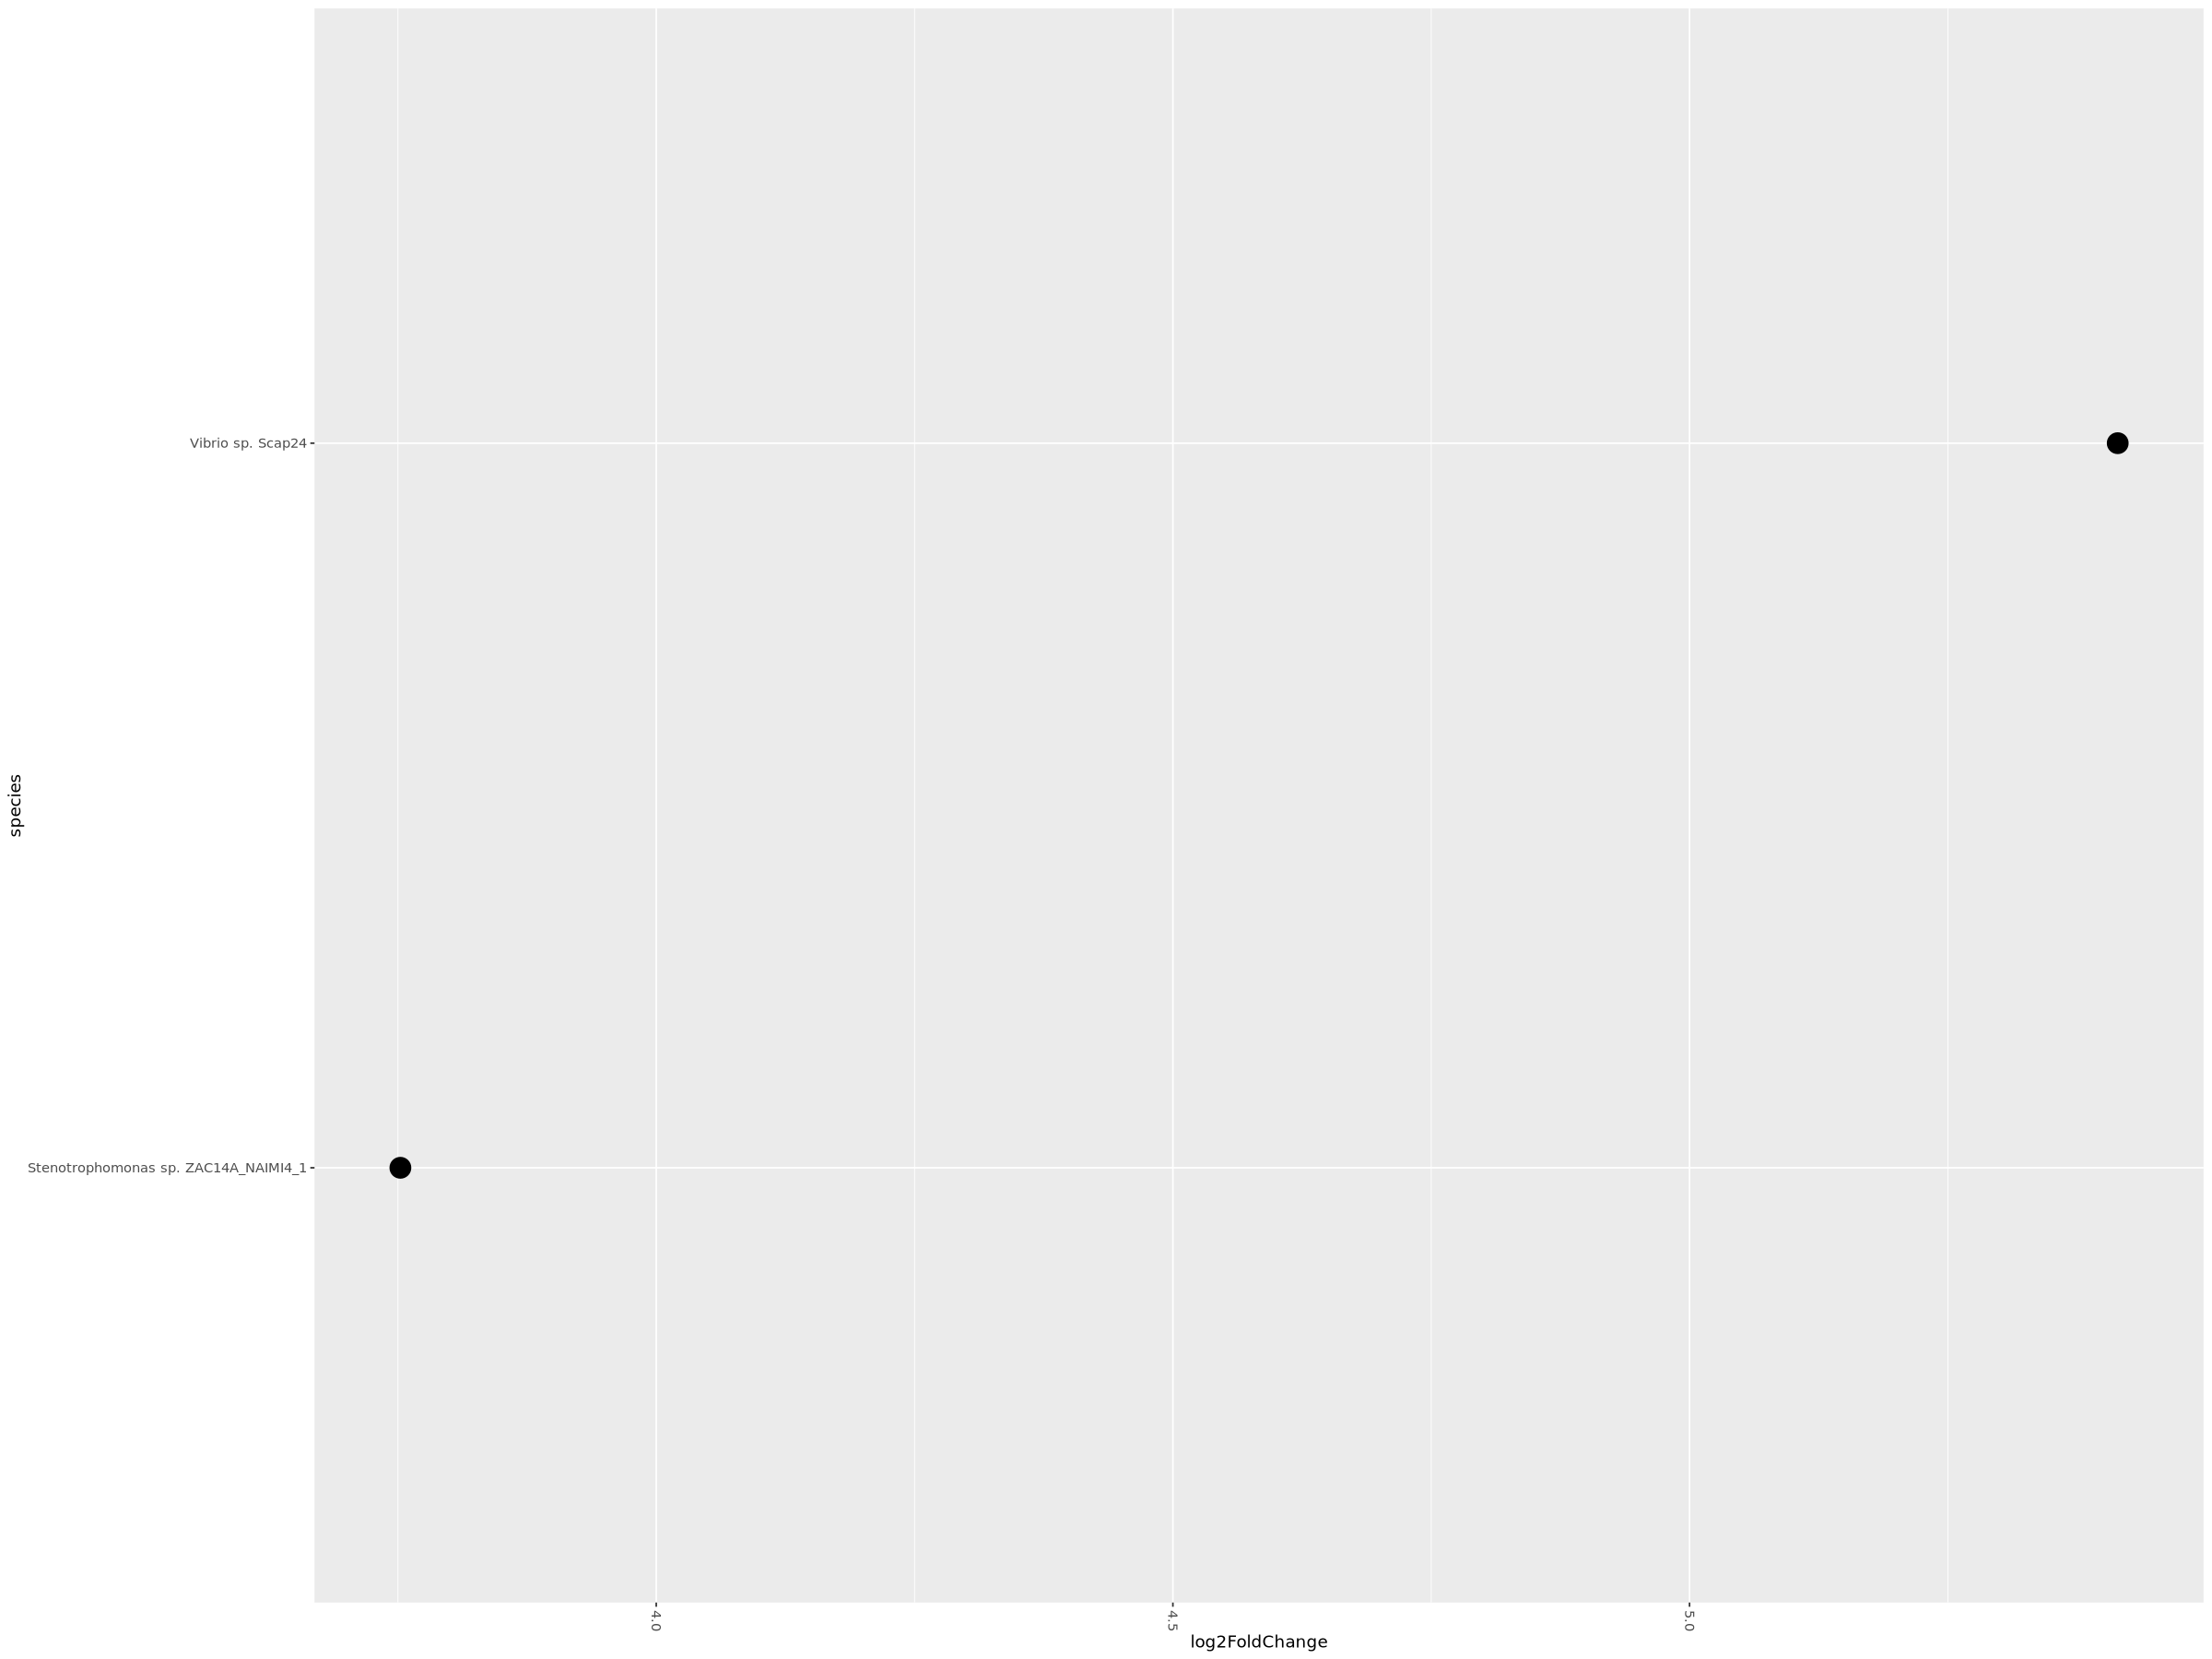

In [237]:
# plot significantly different OTUs
ggplot(sigtab, aes(x=species, y=log2FoldChange)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))+
  coord_flip() 

# taxa are more abundant in susceptible than resistant colonies (both mcav and pstr)
# very confused on why there's only 1 now...

In [238]:
# combine mcav and pstr separate deseq results into one graph (instead of running them together in deseq like above)
# sorted_sigtab = mcav results 
# sigtab_pstr = pstr results 
pstr_mcav_ds<-rbind(sorted_sigtab,sigtab_pstr)
# remember that vibrio is only one from pstr

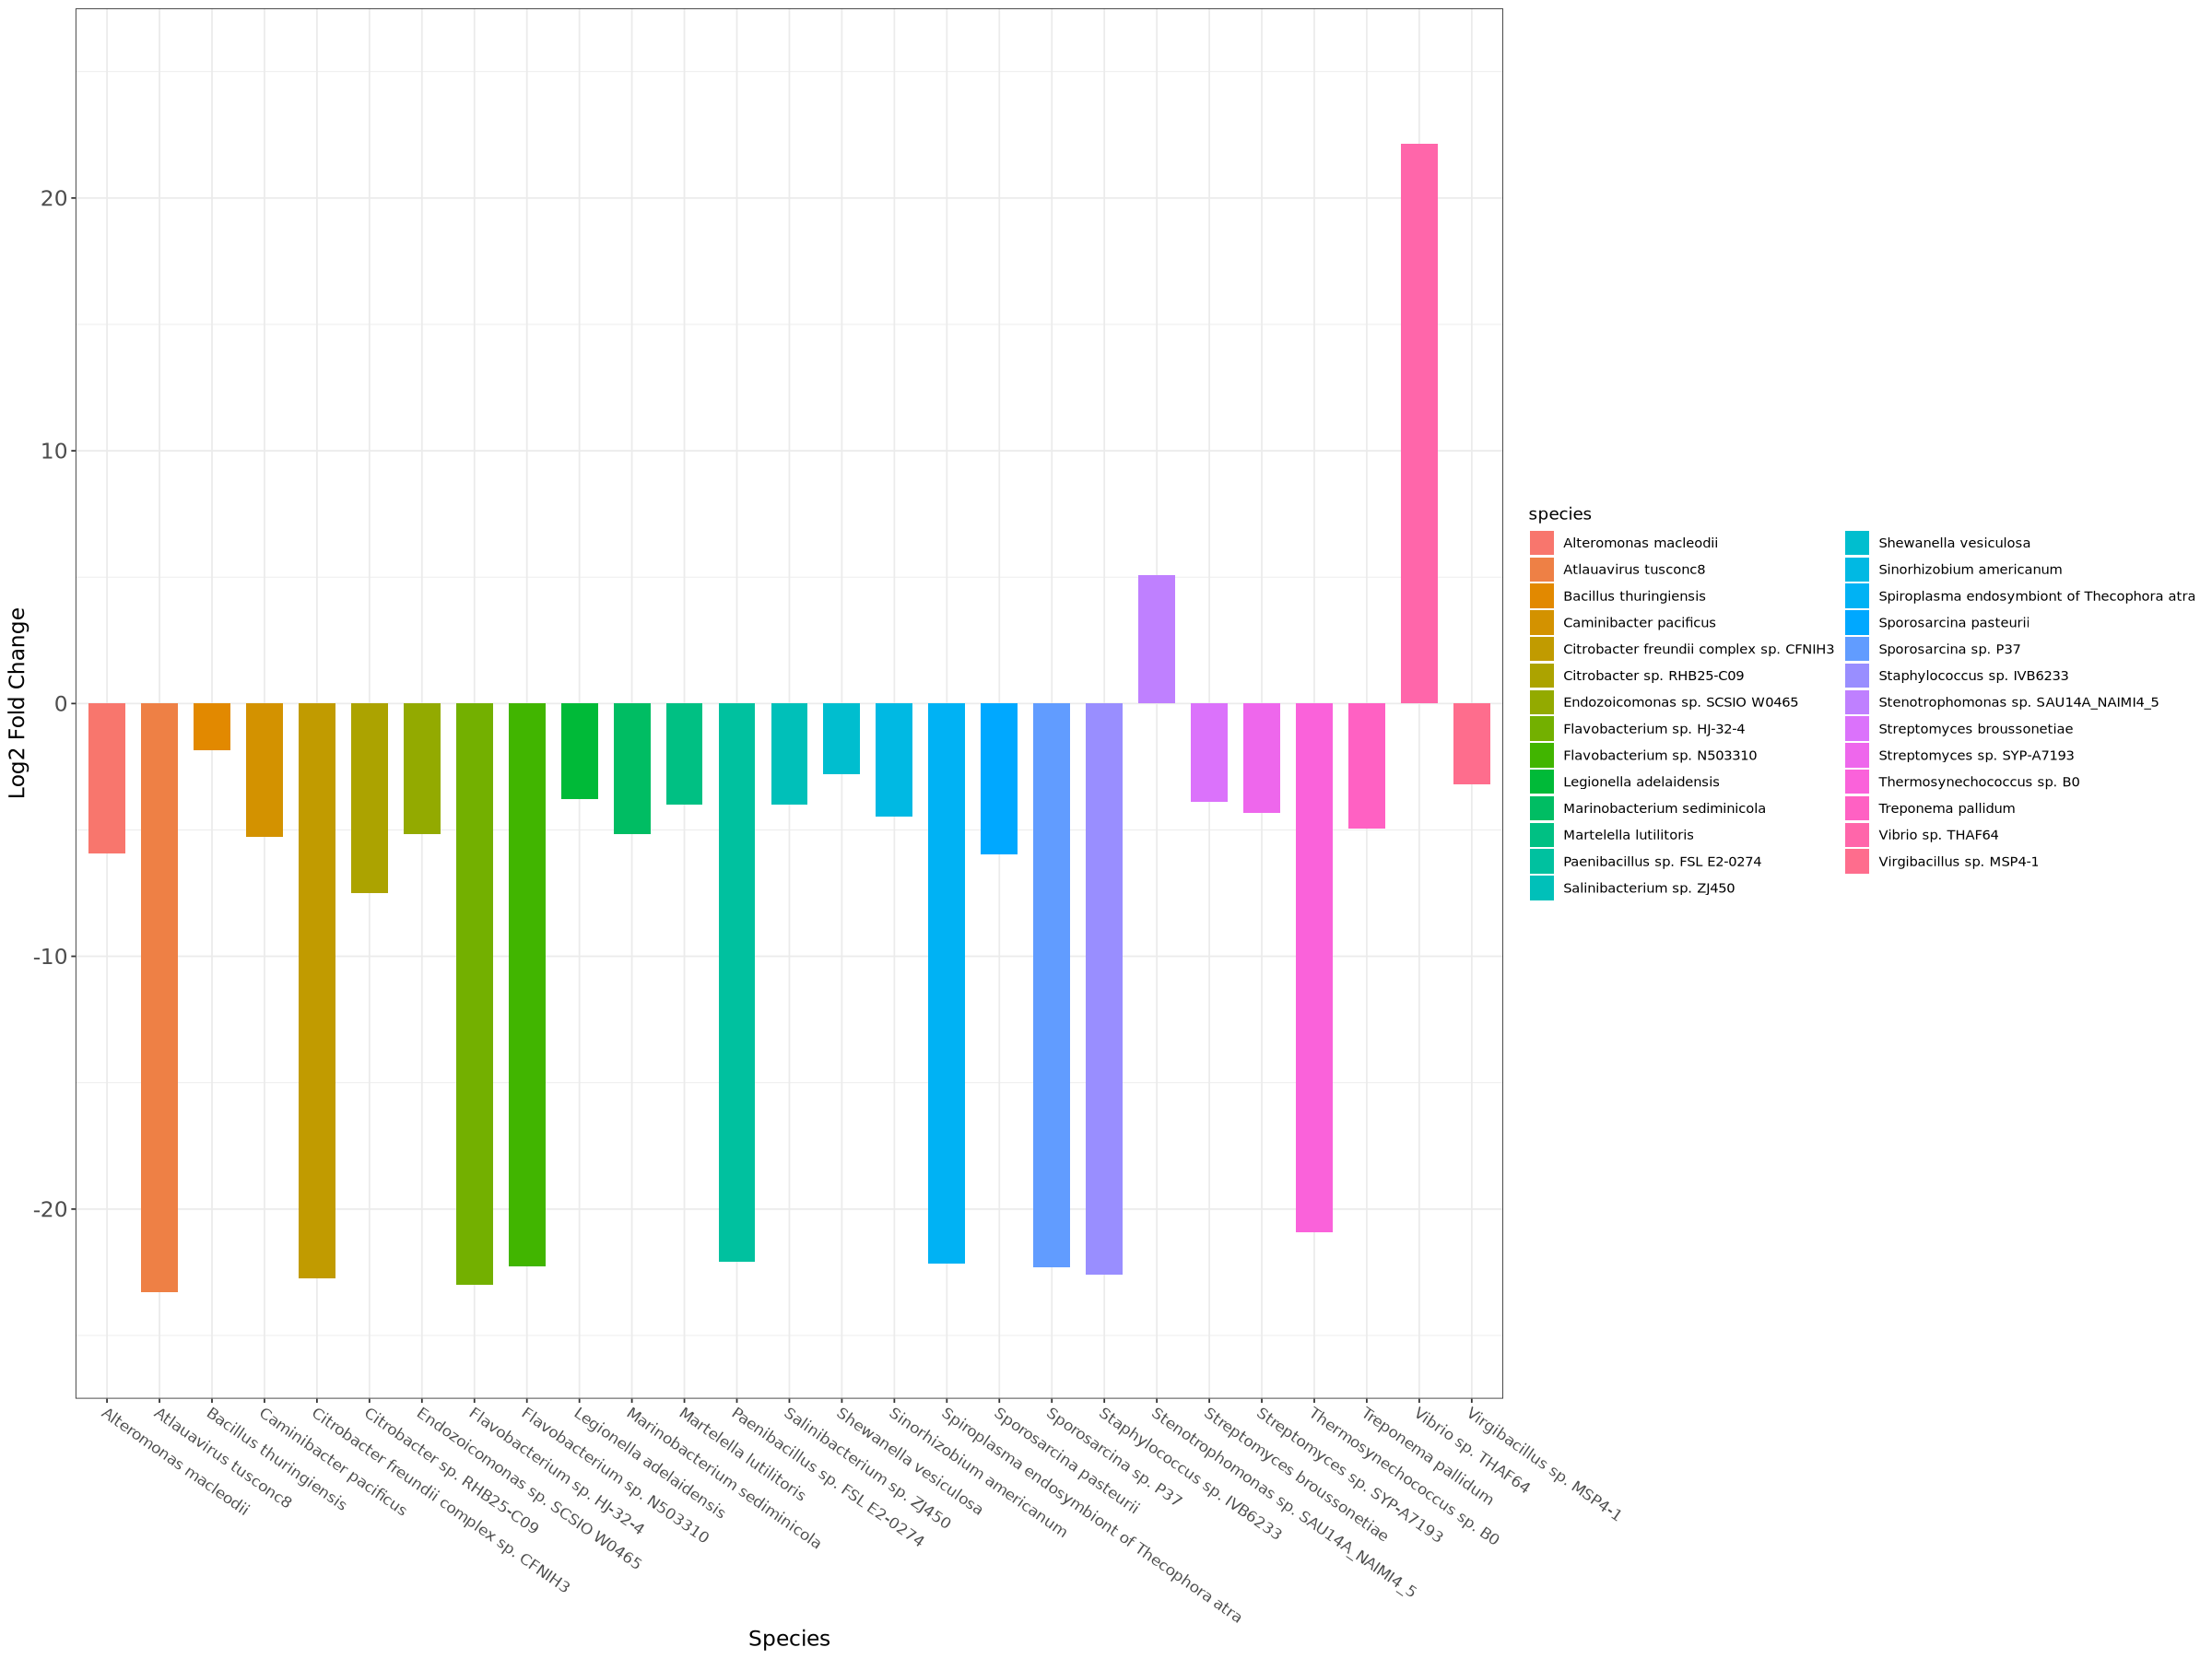

In [239]:
# plot mcav and pstr together 
# plot significantly different OTUs
pstr_mcav_dsplot <- ggplot(pstr_mcav_ds, aes(x = species, y = log2FoldChange, fill = species)) +
  geom_bar(stat = "identity", width = 0.7) +
theme_bw()+
  theme(
    axis.text.x = element_text(angle = -35, hjust = 0, vjust = 1, size = 10),  # Adjust text size
    axis.text.y = element_text(size = 14),  # Adjust y-axis text size
    axis.title = element_text(size = 14)  # Adjust axis title size
  ) +
ylim(-25,25)+

  labs(x = "Species", y = "Log2 Fold Change")  # Add labels
pstr_mcav_dsplot
# taxa are more abundant in susceptible than resistant colonies 
# mcav and pstr combined 

In [240]:
ggsave("pstr_mcav_dsplot.pdf",pstr_mcav_dsplot,width = 15, height = 10)

In [241]:
# subset taxa that are assoc with resistant (i guess only coming from mcav)
resis_mcav_otu<-sigtab_mcav[sigtab_mcav$log2FoldChange<0,]
resis_mcav_otu

baseMean  log2FoldChange lfcSE    stat      pvalue       padj        
2918516 81.300323  -5.179655     1.144973 -4.523824 6.073218e-06 4.786303e-03
1474    58.919385  -5.959903     1.397471 -4.264778 2.001015e-05 1.433636e-02
2734085 10.471924 -23.304207     3.201265 -7.279687 3.345951e-13 8.789814e-10
1930546  5.045259 -22.317520     3.203767 -6.966024 3.260236e-12 3.184751e-09
2077147  6.825152 -22.727812     3.202510 -7.096874 1.276107e-12 1.676166e-09
2954728  4.583558 -22.102347     2.945409 -7.504001 6.189899e-14 2.439130e-10
2989769  6.142636 -22.580808     3.202907 -7.050098 1.787921e-12 2.012944e-09
2986839  4.871285 -22.269352     3.203939 -6.950616 3.636944e-12 3.184751e-09
2937284  4.469805 -20.920219     2.947546 -7.097503 1.270313e-12 1.676166e-09
3066294  4.509953 -22.169223     2.946771 -7.523225 5.344152e-14 2.439130e-10
1160795  8.544501 -22.998373     3.201800 -7.182951 6.822261e-13 1.344156e-09
        species                                    
2918516 Endozoicomonas sp. SCSIO W0465             
1474    Sporosarcina pasteurii                     
2734085 Atlauavirus tusconc8                       
1930546 Sporosarcina sp. P37                       
2077147 Citrobacter freundii complex sp. CFNIH3    
2954728 Paenibacillus sp. FSL E2-0274              
2989769 Staphylococcus sp. IVB6233                 
2986839 Flavobacterium sp. N503310                 
2937284 Thermosynechococcus sp. B0                 
3066294 Spiroplasma endosymbiont of Thecophora atra
1160795 Flavobacterium sp. HJ-32-4

In [242]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/pstr/taxonomy/figures"

In [243]:
write.csv(resis_mcav_otu,"//project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/resis_mcav_otu.csv")

In [244]:
# try subsetting phylo obj with this ex: kostic = subset_samples(kostic, DIAGNOSIS != "None")

In [245]:
## SIGNIFICANT DIFFERENCES BETWEEN pstr HEALTHY AND DISEASED MARGIN 

In [246]:
## REDO BELOW: 

In [247]:
raw_corals@sam_data$Health_status

[1] "Diseased_Margin" "Healthy"         "Healthy"         "Diseased_Tissue"
 [5] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
 [9] "Healthy"         "Healthy"         "Diseased_Margin" "Healthy"        
[13] "Healthy"         "Diseased_Tissue" "Healthy"         "Healthy"        
[17] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[21] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[25] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[29] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[33] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[37] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[41] "Healthy"         "Healthy"         "Healthy"         "Healthy"        
[45] "Healthy"         "Healthy"

In [248]:
# combining results since pstr only has 1 sig diff taxa 
raw_ds = phyloseq_to_deseq2(raw_corals, ~ Health_status)
# relevel comparison factor
raw_ds$Health_status <- relevel(raw_ds$Health_status, "Healthy")
design(raw_ds) <- ~ 1 + Health_status


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [249]:
raw_ds = DESeq(raw_ds, test="Wald", fitType="parametric")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2974 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [250]:
resultsNames(raw_ds)

[1] "Intercept"                               
[2] "Health_status_Diseased_Margin_vs_Healthy"
[3] "Health_status_Diseased_Tissue_vs_Healthy"

In [251]:
res1 <- results(raw_ds, contrast = list("Health_status_Diseased_Margin_vs_Healthy"))
res2 <- results(raw_ds, contrast = list("Health_status_Diseased_Tissue_vs_Healthy"))
res3 <- results(raw_ds, contrast = list("Health_status_Diseased_Margin_vs_Healthy", 
                                     "Health_status_Diseased_Tissue_vs_Healthy"))

# CONFUSED: https://github.com/tavareshugo/tutorial_DESeq2_contrasts/blob/main/DESeq2_contrasts.md

In [252]:
alpha = 0.05
sigtab1 = res1[which(res1$padj < alpha), ]
sigtab1 = cbind(as(sigtab1, "data.frame"), as(tax_table(raw_corals)[rownames(sigtab1), ], "matrix"))
res1
head(sigtab1)
dim(sigtab1)

log2 fold change (MLE): Health_status_Diseased_Margin_vs_Healthy effect 
Wald test p-value: Health_status_Diseased_Margin_vs_Healthy effect 
DataFrame with 25486 rows and 6 columns
          baseMean log2FoldChange     lfcSE       stat    pvalue      padj
         <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
28901   14813.0703     -0.2999023  1.063122 -0.2820957  0.777870  0.999748
1280    10506.9107     -1.0452572  1.286889 -0.8122358  0.416656  0.999748
67376    7168.9148      0.0923395  1.821160  0.0507036  0.959562  0.999748
2099584  4355.2317     -0.2855936  1.866268 -0.1530293  0.878375  0.999748
1872427    21.6654      1.0644272  0.739137  1.4400938  0.149841  0.999748
...            ...            ...       ...        ...       ...       ...
3081203          0             NA        NA         NA        NA        NA
3082951          0             NA        NA         NA        NA        NA
3083256          0             NA        NA         NA        NA     

baseMean  log2FoldChange lfcSE     stat      pvalue       padj        
190893   76.39733   4.061885     0.5757432  7.055028 1.725657e-12 4.634502e-09
2587860  71.32821 -22.822212     6.2037999 -3.678747 2.343824e-04 4.214168e-02
105560  179.26303   7.246388     1.0160607  7.131846 9.903184e-13 4.268768e-09
2829569  92.64098   6.696265     0.9532903  7.024371 2.150331e-12 4.634502e-09
2589991 174.98629 -23.204362     4.9662148 -4.672444 2.976364e-06 1.832802e-03
2822846 105.61328   5.696214     0.8907452  6.394885 1.606677e-10 2.308528e-07
        species                          
190893  Vibrio coralliilyticus           
2587860 Vibrio sp. THAF64                
105560  Methylibium petroleiphilum       
2829569 Bacterioplanoides sp. SCSIO 12839
2589991 Pseudoalteromonas sp. Scap06     
2822846 Pseudoalteromonas sp. SCSIO 43088

[1] 63  7

In [253]:
options(repr.plot.width=20, repr.plot.height=30)

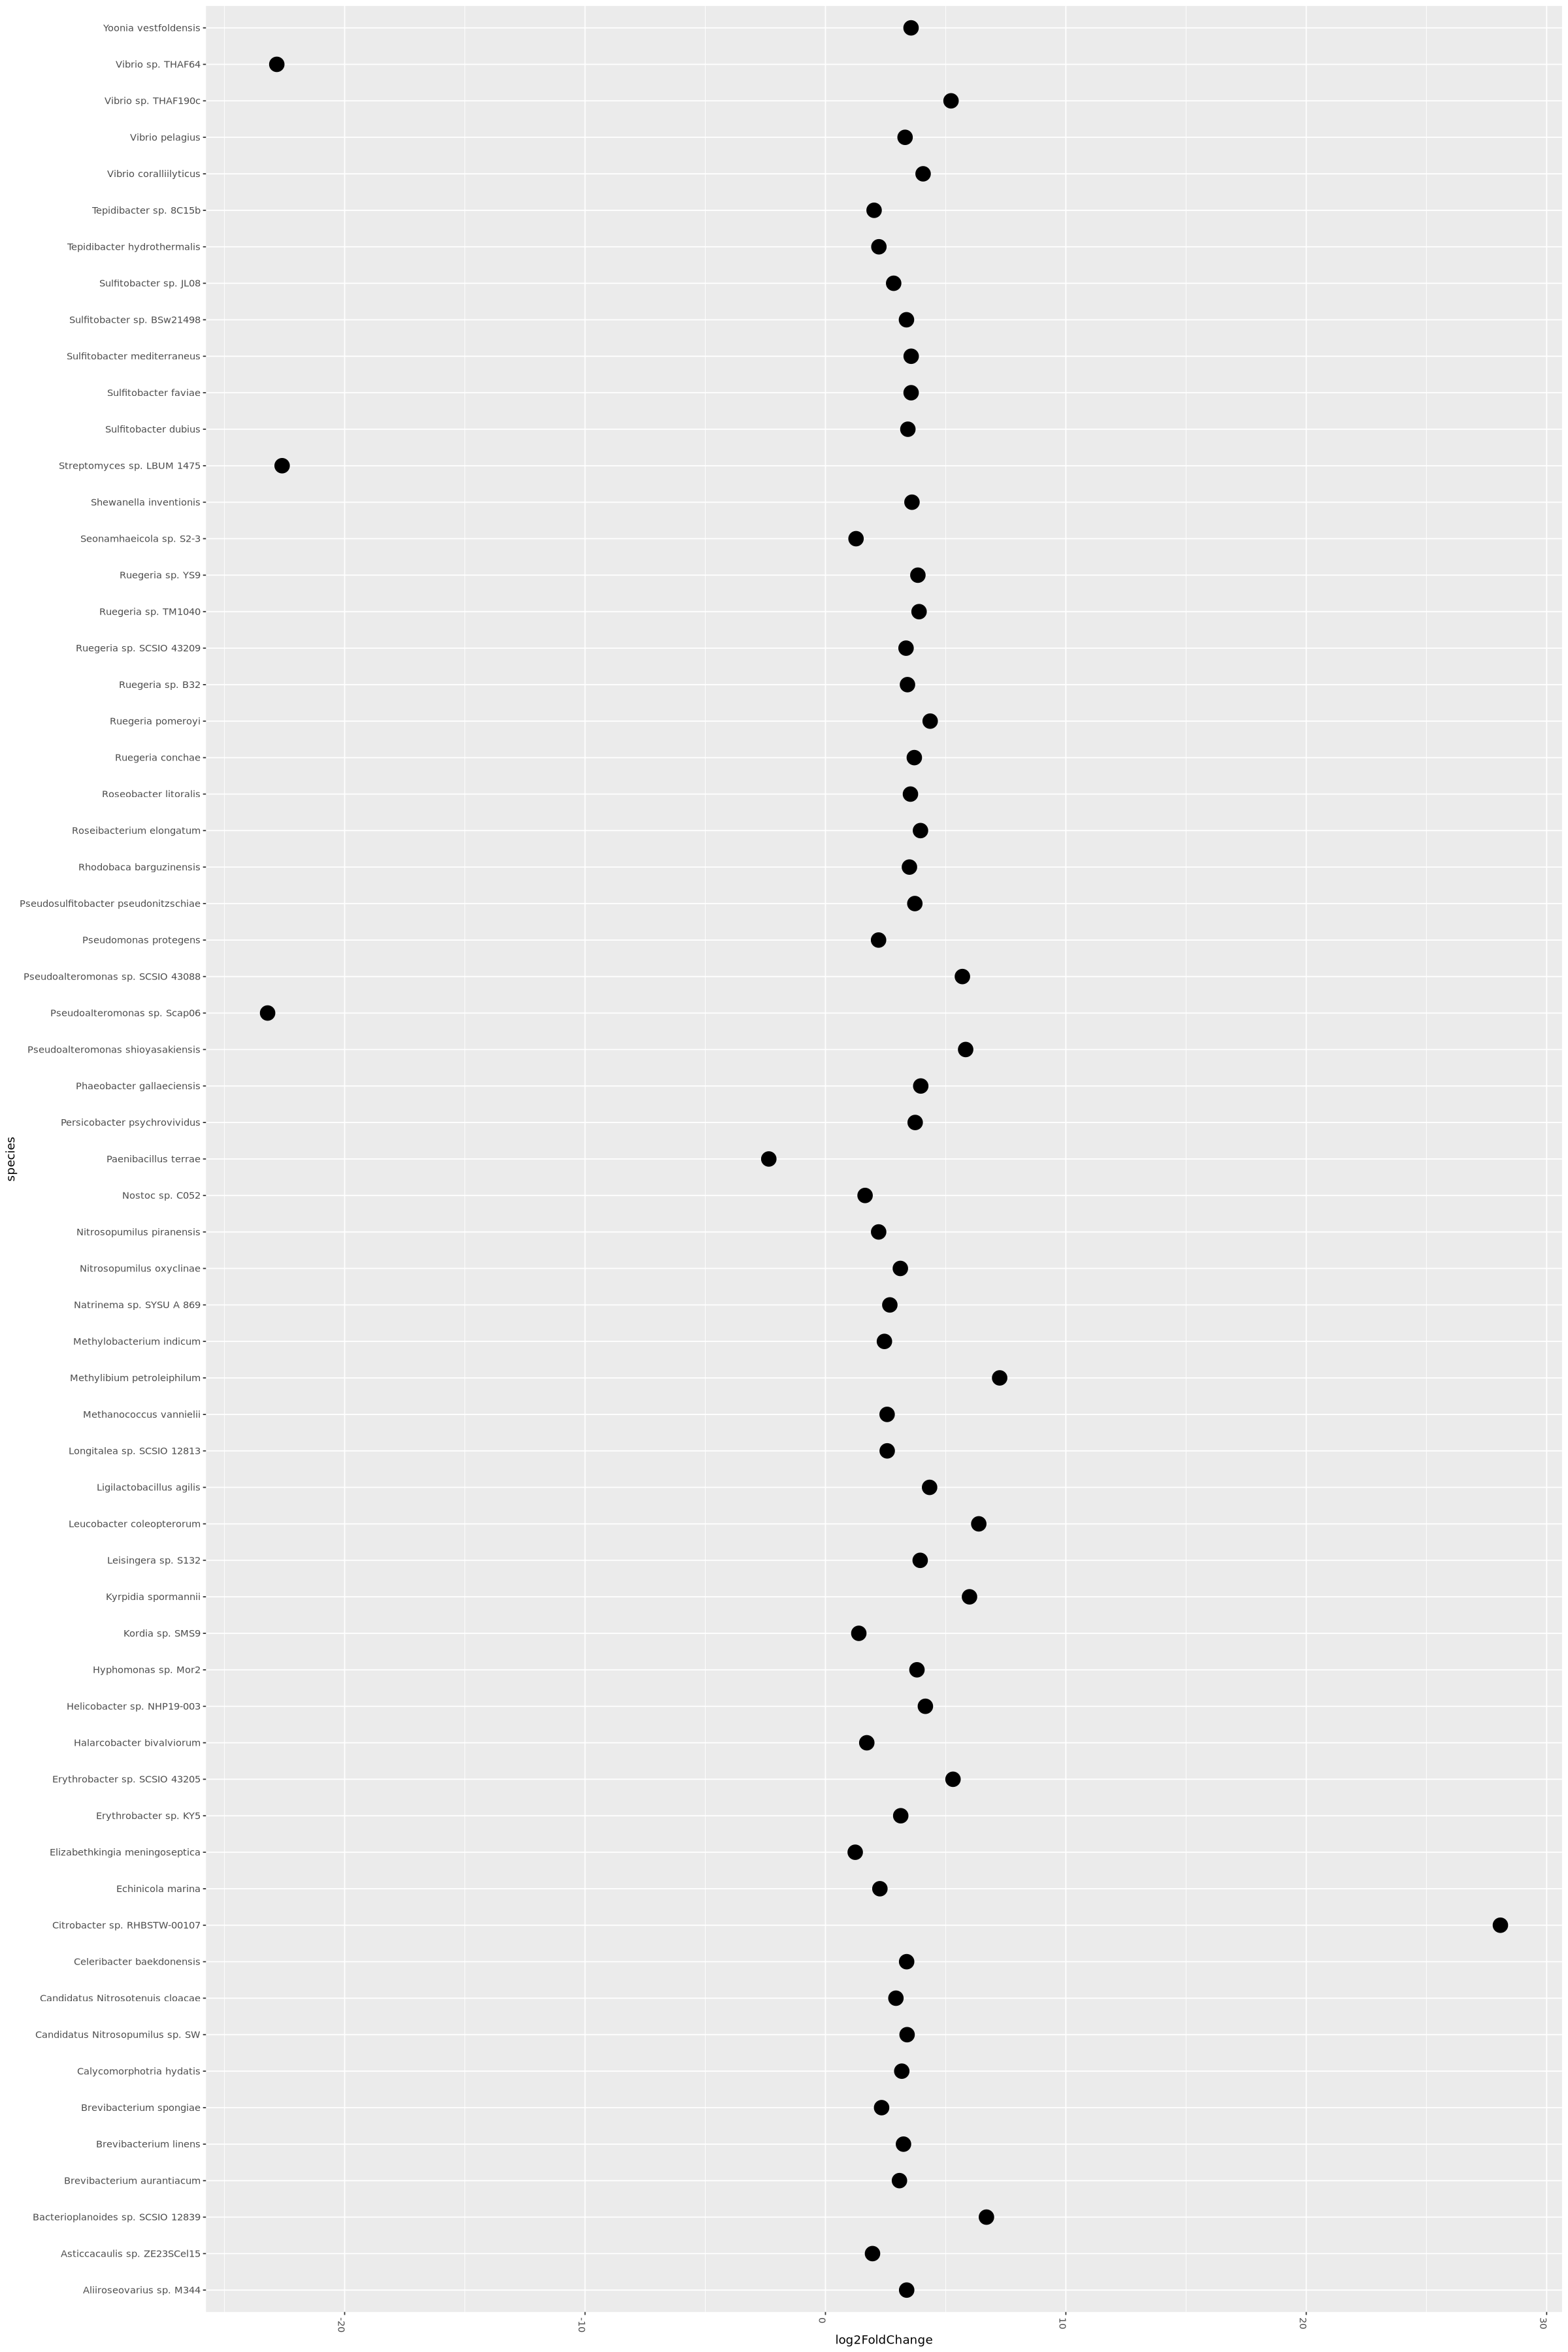

In [254]:
# plot significantly different OTUs
ggplot(sigtab1, aes(x=species, y=log2FoldChange)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=1))+
  coord_flip() 
# taxa more/less abundant in disease margin compared to healthy 
# woohoo vibrio corallyticus

In [255]:
sigtab2 = res2[which(res2$padj < alpha), ]
sigtab2 = cbind(as(sigtab2, "data.frame"), as(tax_table(raw_corals)[rownames(sigtab2), ], "matrix"))
res2
head(sigtab2)
dim(sigtab2)

log2 fold change (MLE): Health_status_Diseased_Tissue_vs_Healthy effect 
Wald test p-value: Health_status_Diseased_Tissue_vs_Healthy effect 
DataFrame with 25486 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat    pvalue      padj
         <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
28901   14813.0703       0.188273  1.063136  0.177092  0.859436   0.99959
1280    10506.9107      -0.718432  1.286922 -0.558256  0.576670   0.99959
67376    7168.9148       0.519142  1.821174  0.285059  0.775599   0.99959
2099584  4355.2317      -0.300039  1.866320 -0.160765  0.872278   0.99959
1872427    21.6654      -0.966755  0.803248 -1.203557  0.228761   0.99959
...            ...            ...       ...       ...       ...       ...
3081203          0             NA        NA        NA        NA        NA
3082951          0             NA        NA        NA        NA        NA
3083256          0             NA        NA        NA        NA        NA
30832

baseMean  log2FoldChange lfcSE     stat      pvalue       padj        
158836  674.66901   4.395047     0.6376623  6.892437 5.484454e-12 8.010593e-08
2589991 174.98629 -22.900090     4.9662148 -4.611176 4.003977e-06 1.169642e-02
2844245 201.62642 -23.415347     4.7161445 -4.964934 6.872439e-07 3.345961e-03
29430    31.63842   2.355742     0.4698942  5.013346 5.349157e-07 3.345961e-03
2609807  79.07284 -22.838827     4.6786798 -4.881468 1.052989e-06 3.844988e-03
2654280  17.95429 -20.211657     4.6028020 -4.391164 1.127456e-05 2.352518e-02
        species                     
158836  Enterobacter hormaechei     
2589991 Pseudoalteromonas sp. Scap06
2844245 Jouyvirus ev017             
29430   Acinetobacter haemolyticus  
2609807 Streptomyces sp. LBUM 1475  
2654280 Paracoccus sp. SMMA_5_TC

[1] 7 7

In [256]:
options(repr.plot.width=15, repr.plot.height=10)

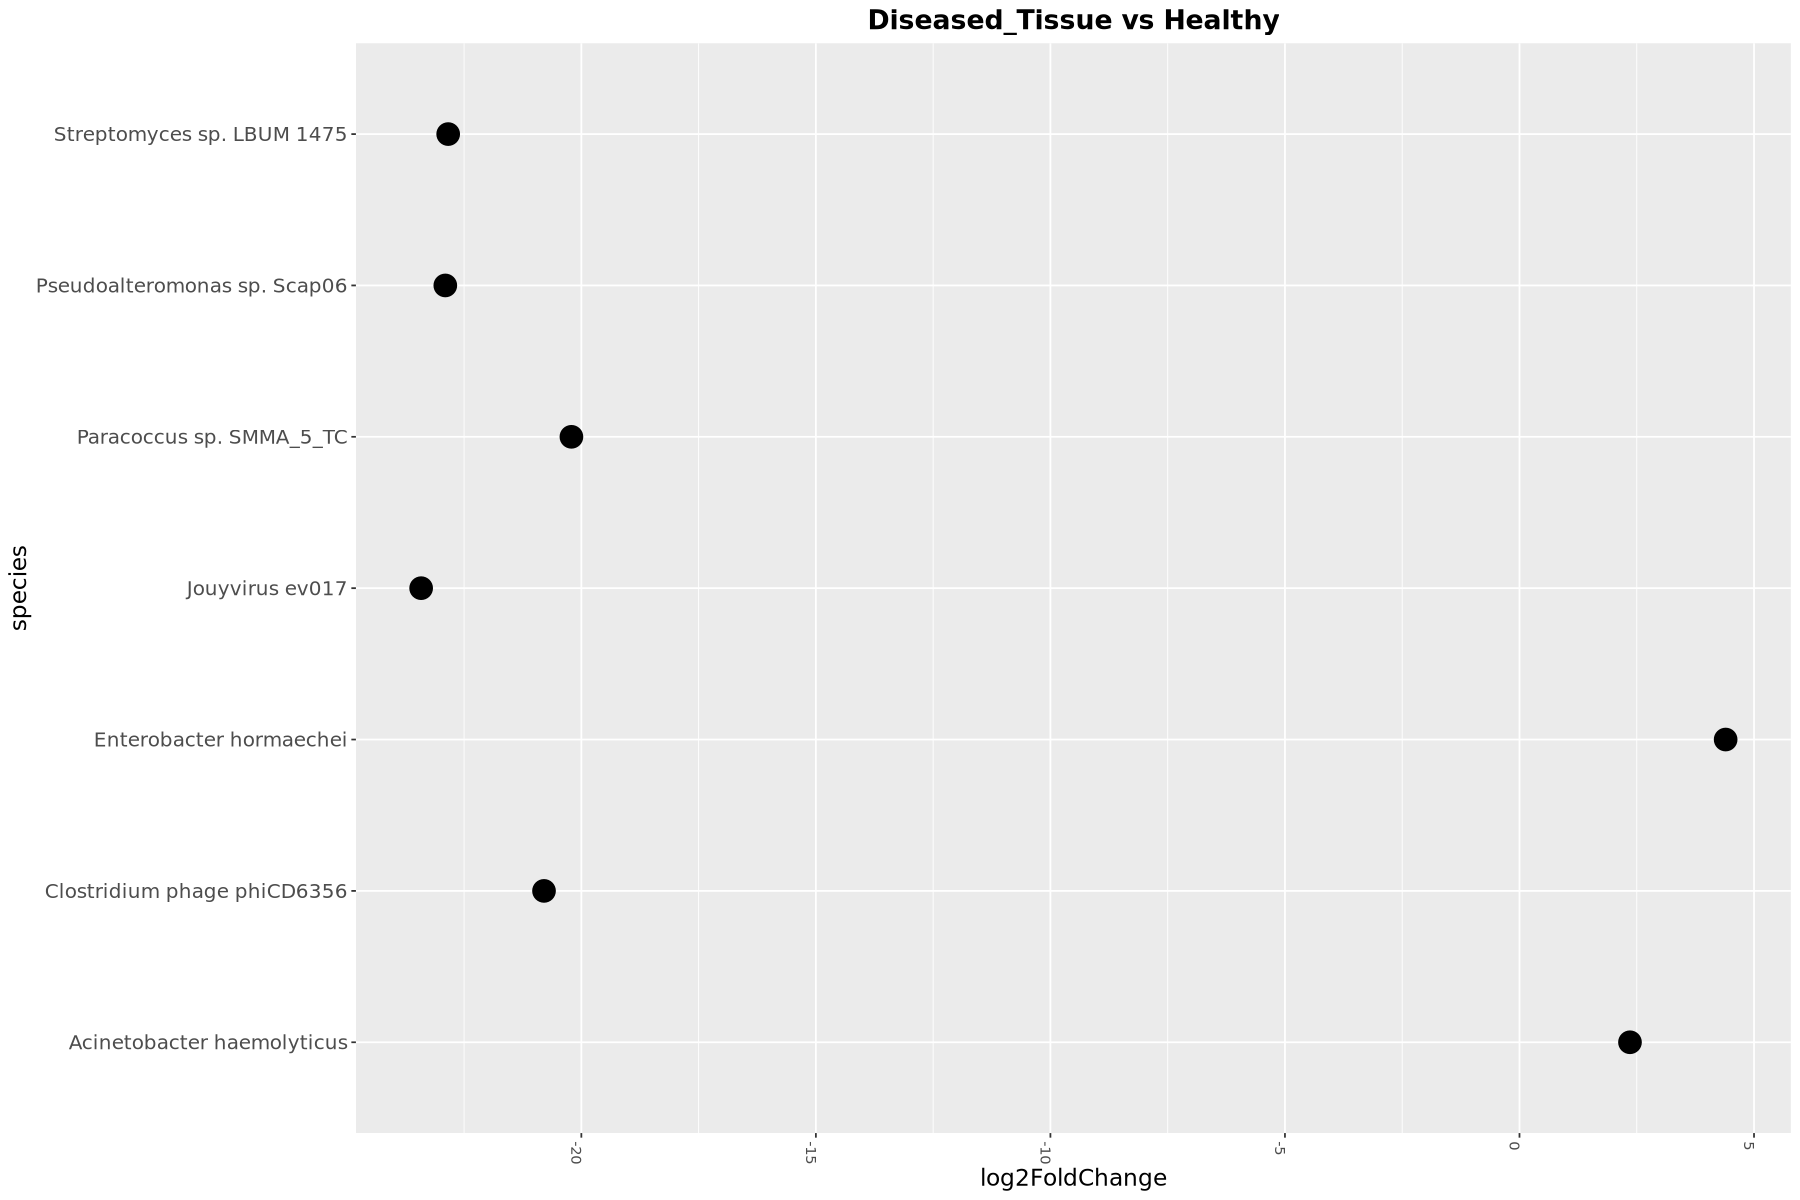

In [257]:
ggplot(sigtab2, aes(x = species, y = log2FoldChange)) + 
  geom_point(size = 6) + 
  theme(
    axis.text.x = element_text(angle = -90, hjust = 0, vjust = 1),
    axis.text.y = element_text(size = 12),  # Adjust y-axis text size if needed
    axis.title = element_text(size = 14),  # Adjust axis title size if needed
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")  # Customize title appearance
  ) +
  coord_flip() +
  ggtitle("Diseased_Tissue vs Healthy")  # Add the title here
#(neg are more abundant in healthy)

In [258]:
sigtab3 = res3[which(res3$padj < alpha), ]
sigtab3 = cbind(as(sigtab3, "data.frame"), as(tax_table(raw_corals)[rownames(sigtab3), ], "matrix"))
res3
head(sigtab3)
dim(sigtab3)

log2 fold change (MLE): Health_status_Diseased_Margin_vs_Healthy vs Health_status_Diseased_Tissue_vs_Healthy 
Wald test p-value: Health_status_Diseased_Margin_vs_Healthy vs Health_status_Diseased_Tissue_vs_Healthy 
DataFrame with 25486 rows and 6 columns
          baseMean log2FoldChange     lfcSE        stat    pvalue      padj
         <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
28901   14813.0703     -0.4881750   1.46892 -0.33233544 0.7396360  0.983091
1280    10506.9107     -0.3268253   1.77812 -0.18380431 0.8541670  0.996638
67376    7168.9148     -0.4268025   2.51630 -0.16961494 0.8653130  0.996638
2099584  4355.2317      0.0144455   2.57865  0.00560194 0.9955303  1.000000
1872427    21.6654      2.0311823   1.06638  1.90474811 0.0568128  0.695482
...            ...            ...       ...         ...       ...       ...
3081203          0             NA        NA          NA        NA        NA
3082951          0             NA        NA          NA      

baseMean  log2FoldChange lfcSE     stat      pvalue       padj        
190893   76.39733  4.584034      0.8166149  5.613459 1.983218e-08 0.0001156990
158836  674.66901 -4.463379      0.8816237 -5.062680 4.134025e-07 0.0004744556
105560  179.26303  7.877338      1.4296765  5.509874 3.590906e-08 0.0001156990
2829569  92.64098  6.868993      1.3443868  5.109387 3.232055e-07 0.0004744556
2822846 105.61328  6.281151      1.2511026  5.020492 5.153925e-07 0.0004744556
1190813  60.86328  6.107979      1.4780805  4.132373 3.590379e-05 0.0165260002
        species                          
190893  Vibrio coralliilyticus           
158836  Enterobacter hormaechei          
105560  Methylibium petroleiphilum       
2829569 Bacterioplanoides sp. SCSIO 12839
2822846 Pseudoalteromonas sp. SCSIO 43088
1190813 Pseudoalteromonas shioyasakiensis

[1] 20  7

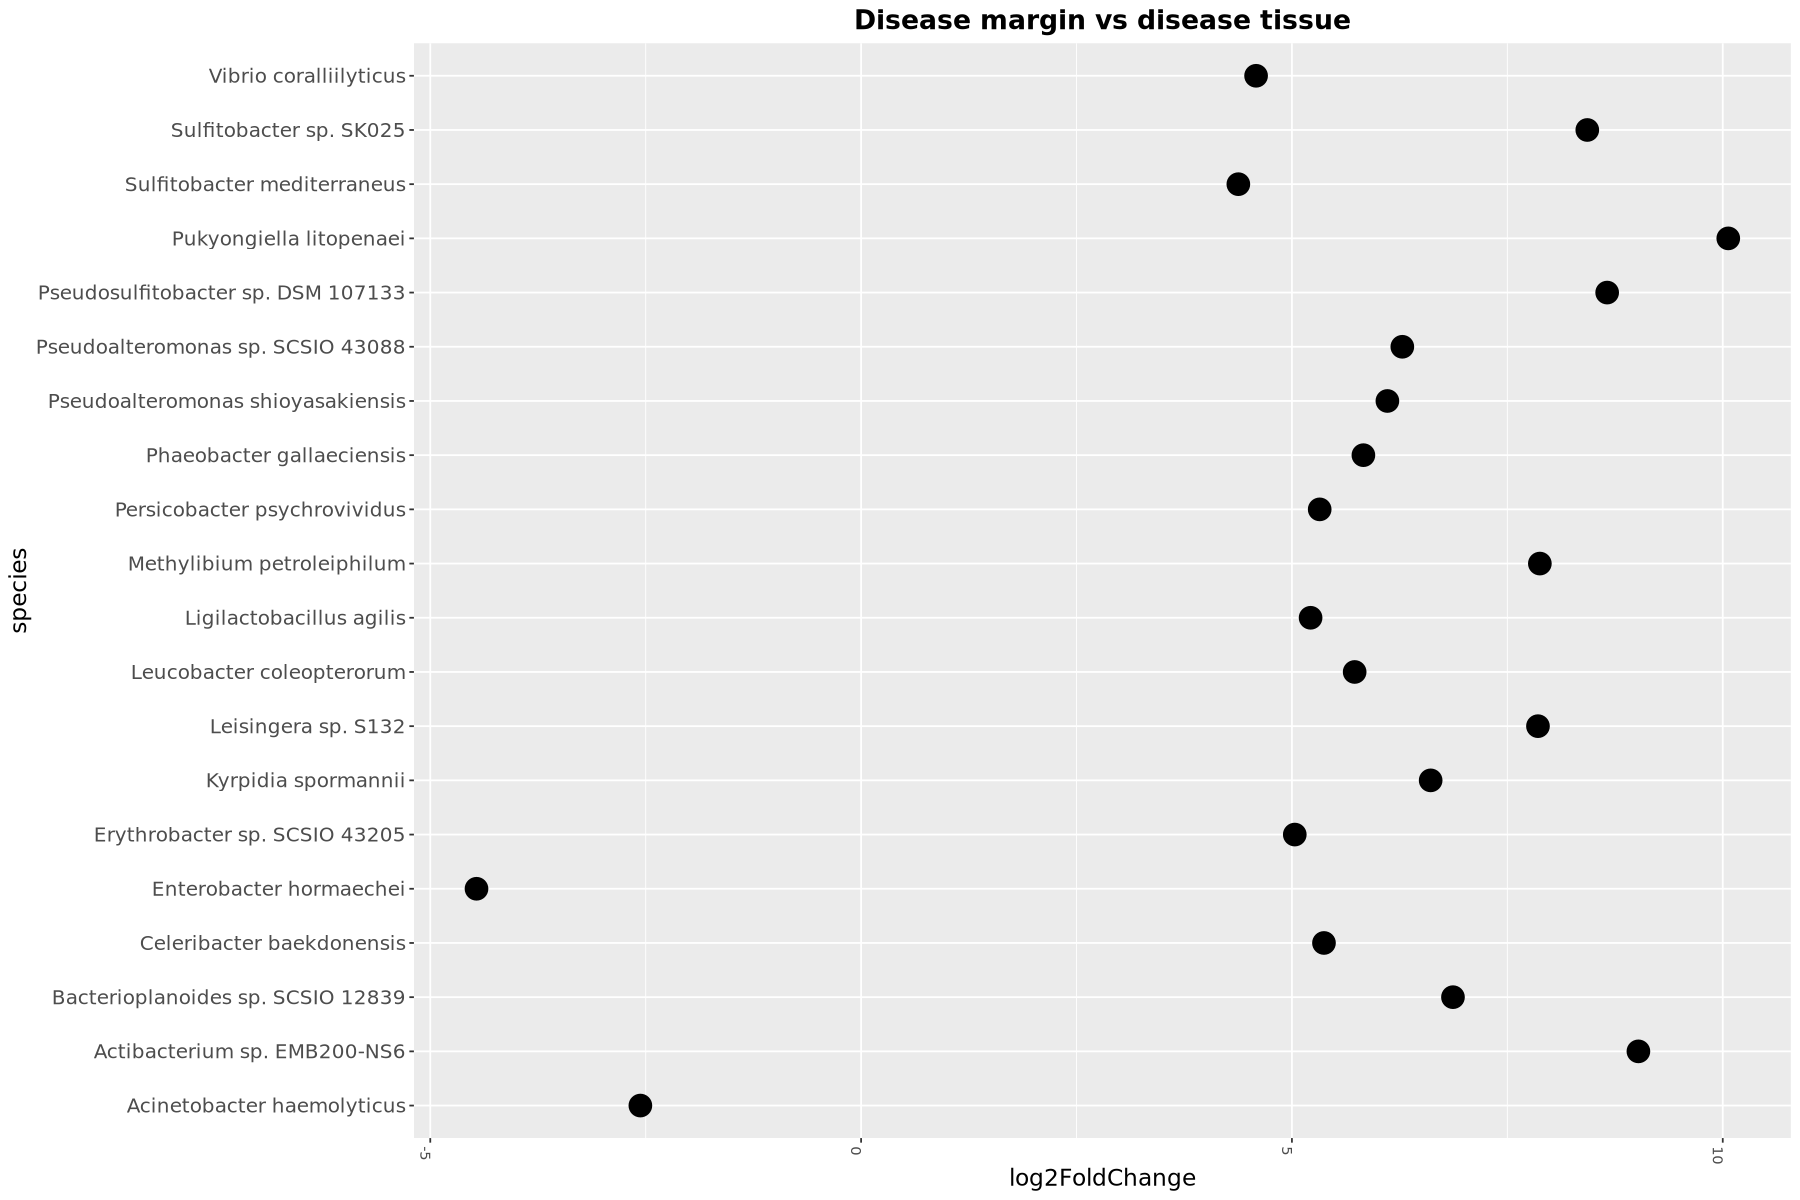

In [259]:
ggplot(sigtab3, aes(x = species, y = log2FoldChange)) + 
  geom_point(size = 6) + 
  theme(
    axis.text.x = element_text(angle = -90, hjust = 0, vjust = 1),
    axis.text.y = element_text(size = 12),  # Adjust y-axis text size if needed
    axis.title = element_text(size = 14),  # Adjust axis title size if needed
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")  # Customize title appearance
  ) +
  coord_flip() +
  ggtitle("Disease margin vs disease tissue")  # Add the title here
# i THINK its margin vs disease tissue 
# woohoo more vibrio coralillilyticus 

In [260]:
##DESEQ interpret: second factor is baseline 

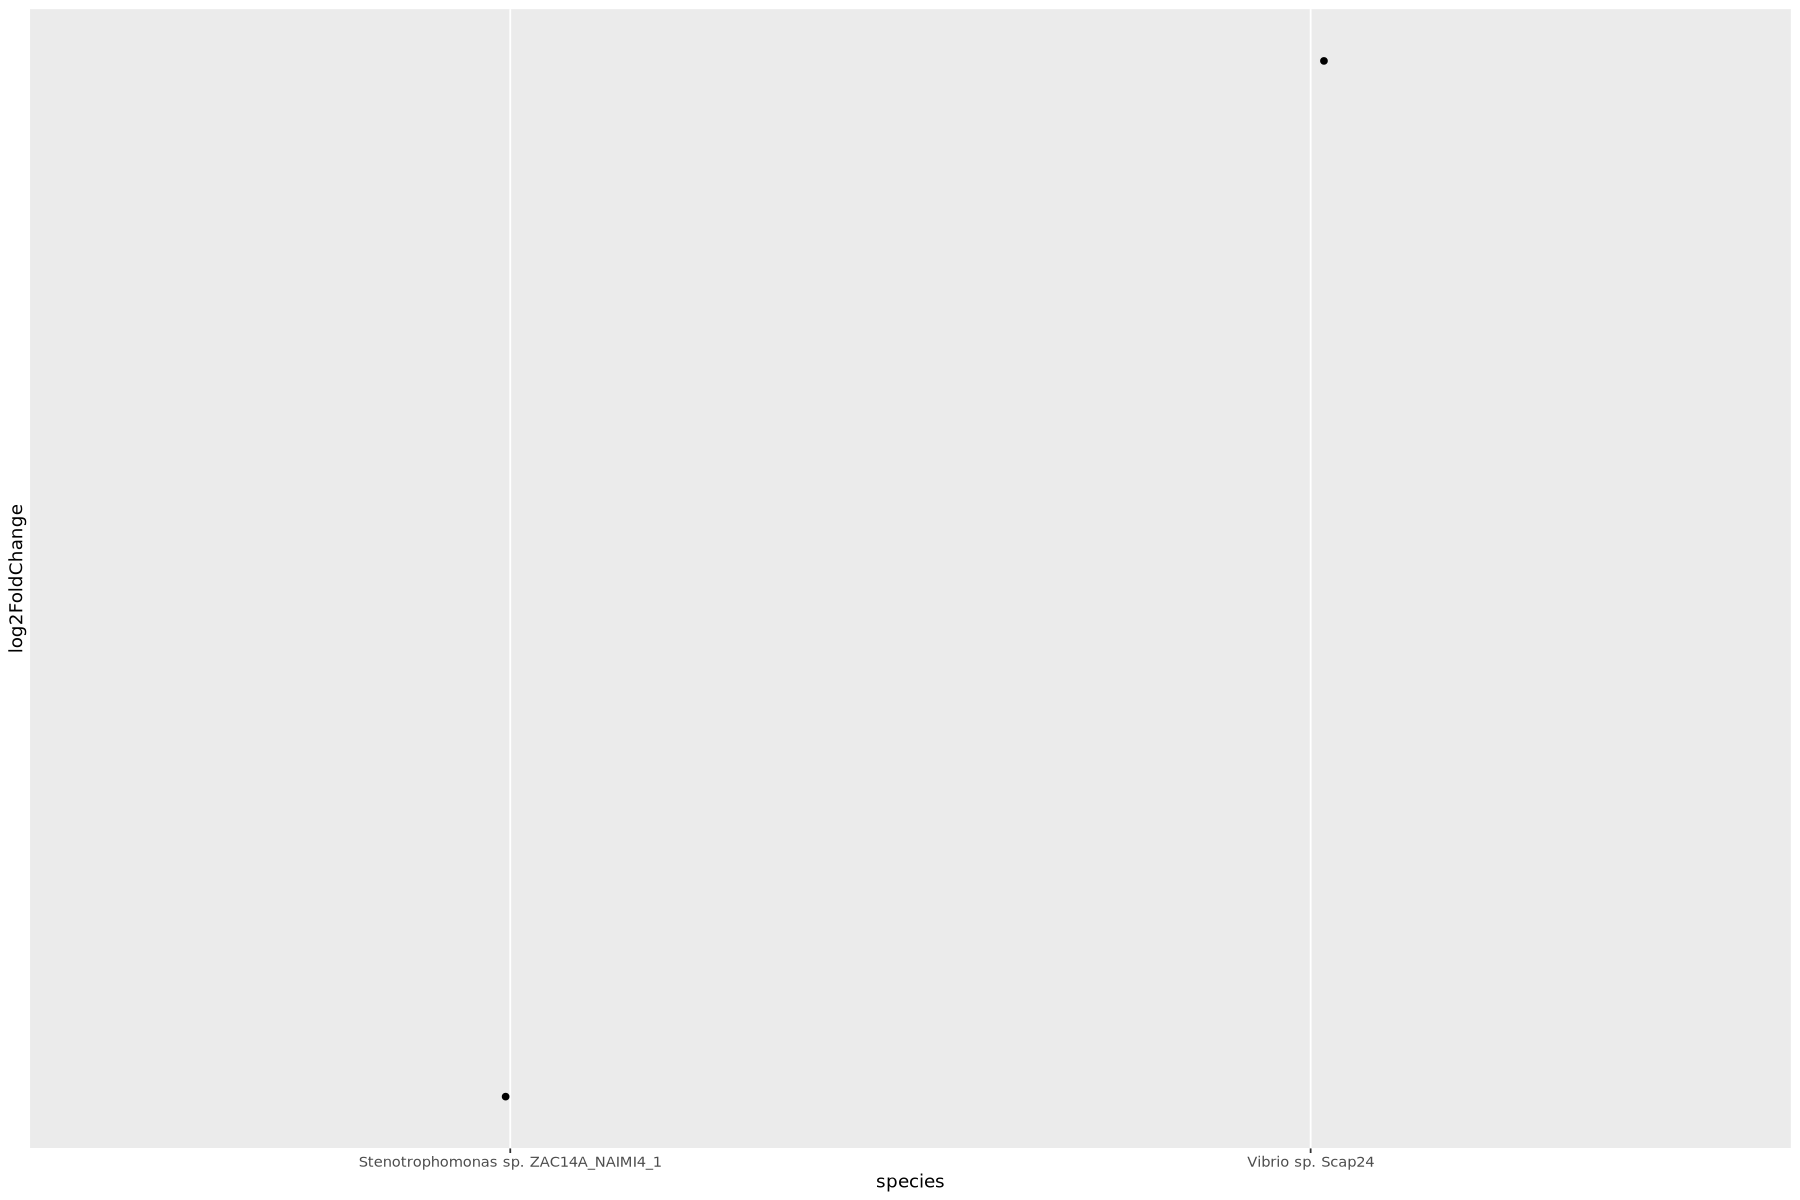

In [261]:
ggplot(sigtab, aes(x=species, y=log2FoldChange)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))